In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import scipy.stats as stats
from textwrap import wrap

In [2]:
!pip install imbalanced-learn

You should consider upgrading via the '/opt/anaconda3/bin/python3 -m pip install --upgrade pip' command.


In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
churn = pd.read_excel('Customer+Churn+Data.xlsx', sheet_name=1)

In [5]:
# drop the id column as it is useless for the model
churn = churn.drop('AccountID', axis=1)

In [6]:
churn.head()

Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1      4        3.0              6.0   Debit Card  Female   
1      1      0        1.0              8.0          UPI    Male   
2      1      0        1.0             30.0   Debit Card    Male   
3      1      0        3.0             15.0   Debit Card    Male   
4      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

## Descriptive Statistics

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11158 non-null  object 
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11148 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            11158 non-null  object 
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  object 
 14  coupon_used_for_paymen

In [8]:
churn.shape

(11260, 18)

### unique values for categorical variables

In [9]:
for column in churn.columns:
    if churn[column].dtype == 'object':
        print(column.upper(),': ',churn[column].nunique())
        print(churn[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
60       2
51       2
31      96
25     114
29     114
#      116
26     122
99     131
27     131
28     137
30     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
5      403
4      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

In [10]:
churn.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [11]:
churn.isnull().sum().sort_values(ascending = False)/churn.index.size

cashback                   0.041829
Day_Since_CC_connect       0.031705
Complain_ly                0.031705
Login_device               0.019627
Marital_Status             0.018828
CC_Agent_Score             0.010302
Account_user_count         0.009947
City_Tier                  0.009947
Payment                    0.009680
Gender                     0.009591
Tenure                     0.009059
rev_per_month              0.009059
CC_Contacted_LY            0.009059
Service_Score              0.008703
account_segment            0.008615
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Churn                      0.000000
dtype: float64

In [12]:
churn = churn.replace({ "#": np.nan, "&": np.nan, "@": np.nan, "+": np.nan, "$": np.nan,"*": np.nan, "&&&&": np.nan})

In [13]:
churn[["City_Tier", "Complain_ly","Churn","Service_Score","CC_Agent_Score","Account_user_count"]] = churn[["City_Tier", "Complain_ly","Churn","Service_Score","CC_Agent_Score","Account_user_count"]].astype(object)

In [14]:
churn[["Tenure", "rev_per_month","coupon_used_for_payment","Day_Since_CC_connect","cashback","rev_growth_yoy"]] = churn[["Tenure","rev_per_month","coupon_used_for_payment","Day_Since_CC_connect","cashback","rev_growth_yoy"]].astype(float)

In [15]:
### Examine missing values
churn_na = churn.isna().sum()
churn_na[churn_na.values >= 0].sort_values(ascending=False)

rev_per_month              791
Login_device               760
cashback                   473
Account_user_count         444
Day_Since_CC_connect       358
Complain_ly                357
Tenure                     218
Marital_Status             212
CC_Agent_Score             116
City_Tier                  112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Service_Score               98
account_segment             97
rev_growth_yoy               3
coupon_used_for_payment      3
Churn                        0
dtype: int64

In [16]:
churn.isnull().sum().sort_values(ascending = False)/churn.index.size

rev_per_month              0.070249
Login_device               0.067496
cashback                   0.042007
Account_user_count         0.039432
Day_Since_CC_connect       0.031794
Complain_ly                0.031705
Tenure                     0.019361
Marital_Status             0.018828
CC_Agent_Score             0.010302
City_Tier                  0.009947
Payment                    0.009680
Gender                     0.009591
CC_Contacted_LY            0.009059
Service_Score              0.008703
account_segment            0.008615
rev_growth_yoy             0.000266
coupon_used_for_payment    0.000266
Churn                      0.000000
dtype: float64

In [17]:
churn['Gender']=np.where(churn['Gender'] =='F', 'Female', churn['Gender'])
churn['Gender']=np.where(churn['Gender'] =='M', 'Male', churn['Gender'])
churn['account_segment']=np.where(churn['account_segment'] =='Regular Plus', 'Regular +', churn['account_segment'])
churn['account_segment']=np.where(churn['account_segment'] =='Super Plus', 'Super +', churn['account_segment'])

In [18]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  object 
 1   Tenure                   11042 non-null  float64
 2   City_Tier                11148 non-null  object 
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11151 non-null  object 
 5   Gender                   11152 non-null  object 
 6   Service_Score            11162 non-null  object 
 7   Account_user_count       10816 non-null  object 
 8   account_segment          11163 non-null  object 
 9   CC_Agent_Score           11144 non-null  object 
 10  Marital_Status           11048 non-null  object 
 11  rev_per_month            10469 non-null  float64
 12  Complain_ly              10903 non-null  object 
 13  rev_growth_yoy           11257 non-null  float64
 14  coupon_used_for_paymen

In [19]:
churn.describe(include='all').T

count unique         top    freq       mean  \
Churn                    11260.0    2.0         0.0  9364.0        NaN   
Tenure                   11042.0    NaN         NaN     NaN  11.025086   
City_Tier                11148.0    3.0         1.0  7263.0        NaN   
CC_Contacted_LY          11158.0    NaN         NaN     NaN  17.867091   
Payment                    11151      5  Debit Card    4587        NaN   
Gender                     11152      2        Male    6704        NaN   
Service_Score            11162.0    6.0         3.0  5490.0        NaN   
Account_user_count       10816.0    6.0         4.0  4569.0        NaN   
account_segment            11163      5   Regular +    4124        NaN   
CC_Agent_Score           11144.0    5.0         3.0  3360.0        NaN   
Marital_Status             11048      3     Married    5860        NaN   
rev_per_month            10469.0    NaN         NaN     NaN   6.362594   
Complain_ly              10903.0    2.0         0.0  7792.0        NaN   
rev_growth_yoy           11257.0    NaN         NaN     NaN  16.193391   
coupon_used_for_payment  11257.0    NaN         NaN     NaN   1.790619   
Day_Since_CC_connect     10902.0    NaN         NaN     NaN   4.633187   
cashback                 10787.0    NaN         NaN     NaN  196.23637   
Login_device               10500      2      Mobile    7482        NaN   

                                std  min     25%     50%     75%     max  
Churn                           NaN  NaN     NaN     NaN     NaN     NaN  
Tenure                    12.879782  0.0     2.0     9.0    16.0    99.0  
City_Tier                       NaN  NaN     NaN     NaN     NaN     NaN  
CC_Contacted_LY            8.853269  4.0    11.0    16.0    23.0   132.0  
Payment                         NaN  NaN     NaN     NaN     NaN     NaN  
Gender                          NaN  NaN     NaN     NaN     NaN     NaN  
Service_Score                   NaN  NaN     NaN     NaN     NaN     NaN  
Account_user_count              NaN  NaN     NaN     NaN     NaN     NaN  
account_segment                 NaN  NaN     NaN     NaN     NaN     NaN  
CC_Agent_Score                  NaN  NaN     NaN     NaN     NaN     NaN  
Marital_Status                  NaN  NaN     NaN     NaN     NaN     NaN  
rev_per_month             11.909686  1.0     3.0     5.0     7.0   140.0  
Complain_ly                     NaN  NaN     NaN     NaN     NaN     NaN  
rev_growth_yoy             3.757721  4.0    13.0    15.0    19.0    28.0  
coupon_used_for_payment    1.969551  0.0     1.0     1.0     2.0    16.0  
Day_Since_CC_connect       3.697637  0.0     2.0     3.0     8.0    47.0  
cashback                 178.660514  0.0  147.21  165.25  200.01  1997.0  
Login_device                    NaN  NaN     NaN     NaN     NaN     NaN

In [20]:
churn.skew()

Churn                      1.772606
Tenure                     3.895707
City_Tier                  0.737107
CC_Contacted_LY            1.422977
Service_Score              0.003891
Account_user_count        -0.393100
CC_Agent_Score            -0.142149
rev_per_month              9.093909
Complain_ly                0.950876
rev_growth_yoy             0.752474
coupon_used_for_payment    2.575199
Day_Since_CC_connect       1.273021
cashback                   8.770766
dtype: float64

**Replacing NULL values in Numerical Columns using Mean**

In [21]:
mean1=churn["Tenure"].mean()
mean2=churn["CC_Contacted_LY"].mean()
mean3=churn["rev_per_month"].mean()
mean4=churn["rev_growth_yoy"].mean()
mean5=churn["coupon_used_for_payment"].mean()
mean6=churn["Day_Since_CC_connect"].mean()
mean7=churn["cashback"].mean()


churn["Tenure"].replace(np.nan,mean1,inplace=True)
churn["CC_Contacted_LY"].replace(np.nan,mean2,inplace=True)
churn["rev_per_month"].replace(np.nan,mean3,inplace=True)
churn["rev_growth_yoy"].replace(np.nan,mean4,inplace=True)
churn["coupon_used_for_payment"].replace(np.nan,mean5,inplace=True)
churn["Day_Since_CC_connect"].replace(np.nan,mean6,inplace=True)
churn["cashback"].replace(np.nan,mean7,inplace=True)

**Replacing NULL values in Categorical Columns using Mode**

In [22]:
mode1=churn["City_Tier"].mode().values[0]
mode2=churn["Payment"].mode().values[0]
mode3=churn["Gender"].mode().values[0]
mode4=churn["Service_Score"].mode().values[0]
mode5=churn["Account_user_count"].mode().values[0]
mode6=churn['account_segment'].mode().values[0]
mode7=churn["CC_Agent_Score"].mode().values[0]
mode8=churn["Marital_Status"].mode().values[0]
mode9=churn["Complain_ly"].mode().values[0]
mode10=churn["Login_device"].mode().values[0]


churn["City_Tier"]=churn["City_Tier"].replace(np.nan,mode1)
churn["Payment"]= churn["Payment"].replace(np.nan,mode2)
churn["Gender"]=churn["Gender"].replace(np.nan,mode3)
churn["Service_Score"]=churn["Service_Score"].replace(np.nan,mode4)
churn["Account_user_count"]=churn["Account_user_count"].replace(np.nan,mode5)
churn["account_segment"]=churn["account_segment"].replace(np.nan,mode6)
churn['CC_Agent_Score']=churn['CC_Agent_Score'].replace(np.nan,mode7)
churn['Marital_Status']=churn['Marital_Status'].replace(np.nan,mode8)
churn['Complain_ly']=churn['Complain_ly'].replace(np.nan,mode9)
churn['Login_device']=churn['Login_device'].replace(np.nan,mode10)

In [23]:
# Check for missing value in any column
churn.isnull().sum()

Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

## Outlier Treatment

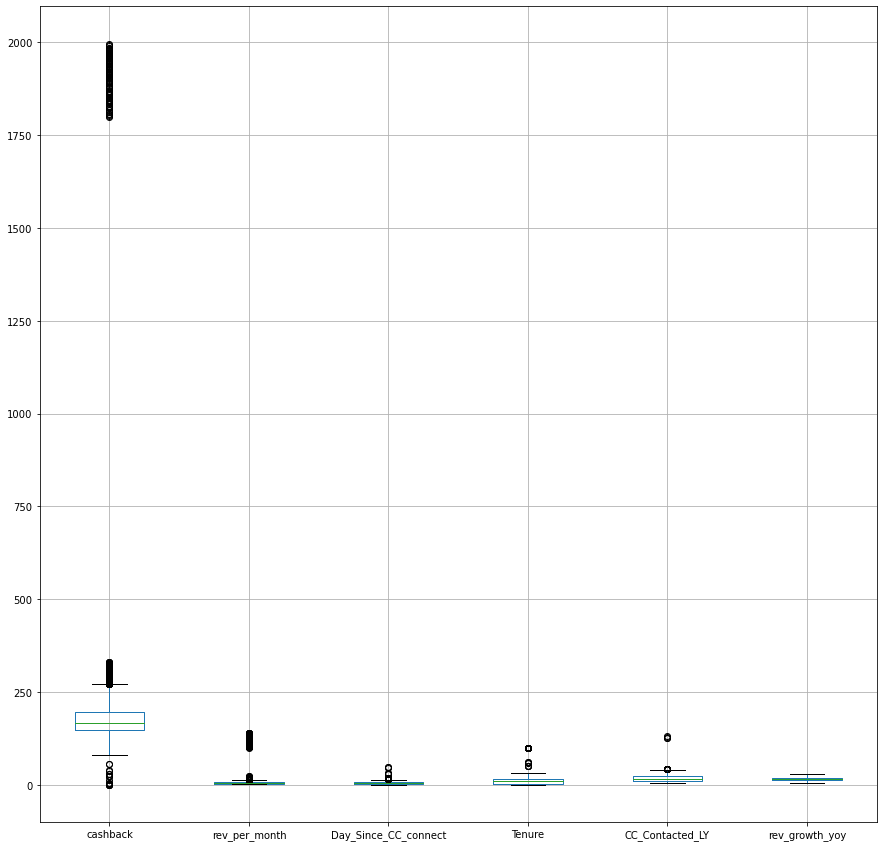

In [24]:
plt.figure(figsize=(15,15))
churn.boxplot(column=['cashback','rev_per_month','Day_Since_CC_connect','Tenure','CC_Contacted_LY','rev_growth_yoy'])
plt.show()

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [26]:
lrcashback,urcashback=remove_outlier(churn['cashback'])
churn['cashback']=np.where(churn['cashback']>urcashback,urcashback,churn['cashback'])
churn['cashback']=np.where(churn['cashback']<lrcashback,lrcashback,churn['cashback'])


lrrev_per_month,urrev_per_month=remove_outlier(churn['rev_per_month'])
churn['rev_per_month']=np.where(churn['rev_per_month']>urrev_per_month,urrev_per_month,churn['rev_per_month'])
churn['rev_per_month']=np.where(churn['rev_per_month']<lrrev_per_month,lrrev_per_month,churn['rev_per_month'])

lrTenure,urTenure=remove_outlier(churn['Tenure'])
churn['Tenure']=np.where(churn['Tenure']>urTenure,urTenure,churn['Tenure'])
churn['Tenure']=np.where(churn['Tenure']<lrTenure,lrTenure,churn['Tenure'])

lrCC_Contacted_LY,urCC_Contacted_LY=remove_outlier(churn['CC_Contacted_LY'])
churn['CC_Contacted_LY']=np.where(churn['CC_Contacted_LY']>urCC_Contacted_LY,urCC_Contacted_LY,churn['CC_Contacted_LY'])
churn['CC_Contacted_LY']=np.where(churn['CC_Contacted_LY']<lrCC_Contacted_LY,lrCC_Contacted_LY,churn['CC_Contacted_LY'])

lrrev_growth_yoy,urrev_growth_yoy=remove_outlier(churn['rev_growth_yoy'])
churn['rev_growth_yoy']=np.where(churn['rev_growth_yoy']>urrev_growth_yoy,urrev_growth_yoy,churn['rev_growth_yoy'])
churn['rev_growth_yoy']=np.where(churn['rev_growth_yoy']<lrrev_growth_yoy,lrrev_growth_yoy,churn['rev_growth_yoy'])

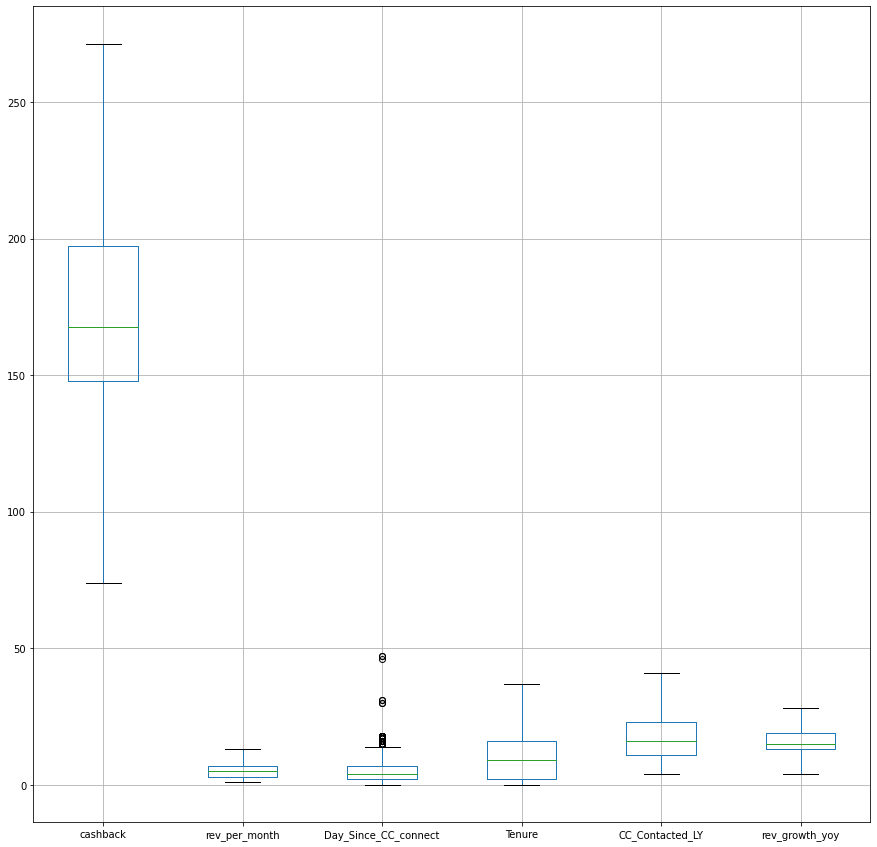

In [27]:
plt.figure(figsize=(15,15))
churn.boxplot(column=['cashback','rev_per_month','Day_Since_CC_connect','Tenure','CC_Contacted_LY','rev_growth_yoy'])
plt.show()

## Data Distribution

### For Target Variables

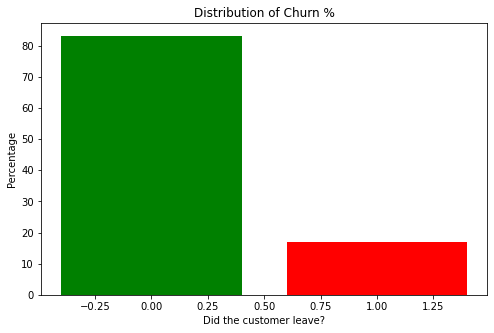

In [28]:
fig, axes = plt.subplots(figsize=(8,5))
data = churn["Churn"].value_counts(normalize=True)
axes.bar(data.index, data*100, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Did the customer leave?')
plt.show()

## For Categorical Values

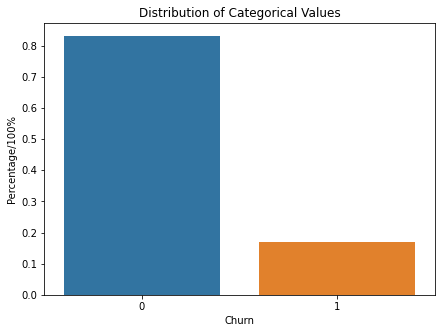

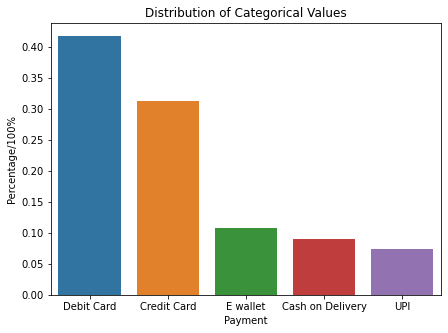

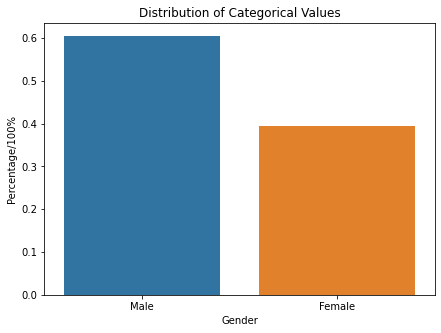

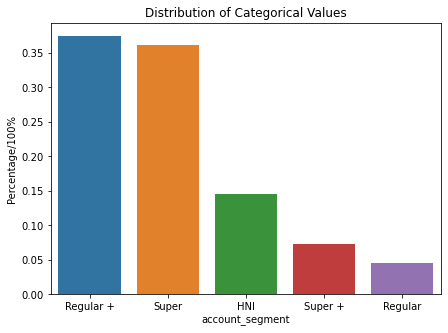

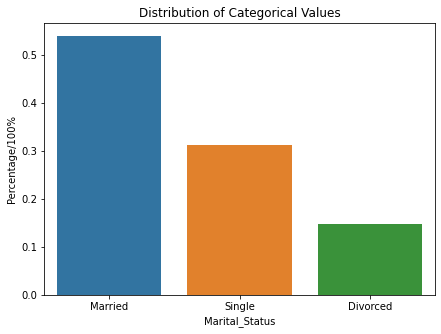

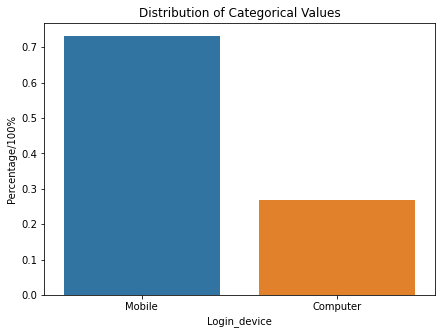

In [29]:
for col in churn.columns:
    if churn[col].dtypes == 'object':
        value_counts = churn[col].value_counts(normalize=True)
        fig, axes = plt.subplots(figsize=(7,5))
        sns.barplot(x = value_counts.index, y = value_counts)
        axes.set_title('Distribution of Categorical Values')
        axes.set_ylabel('Percentage/100%')
        axes.set_xlabel(col)
        plt.show()

<AxesSubplot:xlabel='City_Tier', ylabel='count'>

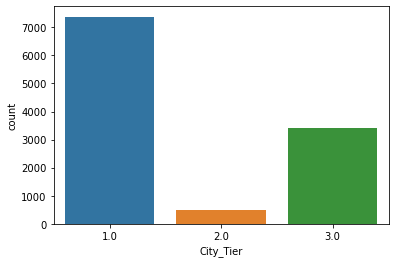

In [30]:
sns.countplot(x="City_Tier", data=churn)

<AxesSubplot:xlabel='Complain_ly', ylabel='count'>

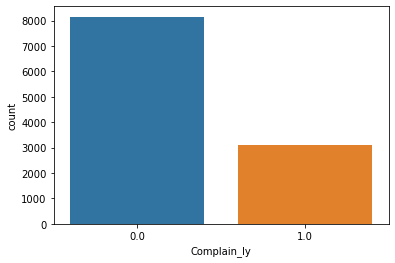

In [31]:
sns.countplot(x="Complain_ly", data=churn)

<AxesSubplot:xlabel='Service_Score', ylabel='count'>

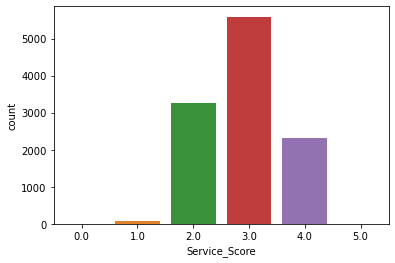

In [32]:
sns.countplot(x="Service_Score", data=churn)

<AxesSubplot:xlabel='Account_user_count', ylabel='count'>

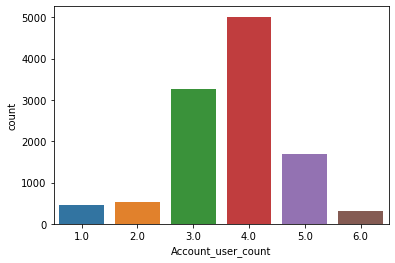

In [33]:
sns.countplot(x="Account_user_count", data=churn)

<AxesSubplot:xlabel='CC_Agent_Score', ylabel='count'>

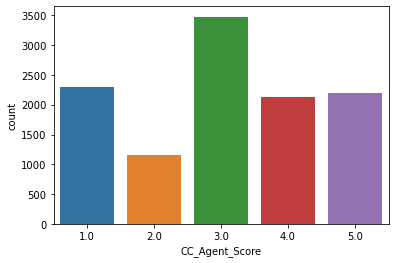

In [34]:
sns.countplot(x="CC_Agent_Score", data=churn)

<AxesSubplot:xlabel='coupon_used_for_payment', ylabel='count'>

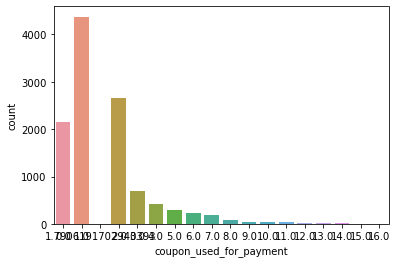

In [35]:
sns.countplot(x="coupon_used_for_payment", data=churn)

## For Continuous Variables

Text(0.5, 1.0, 'cashback Distribution')

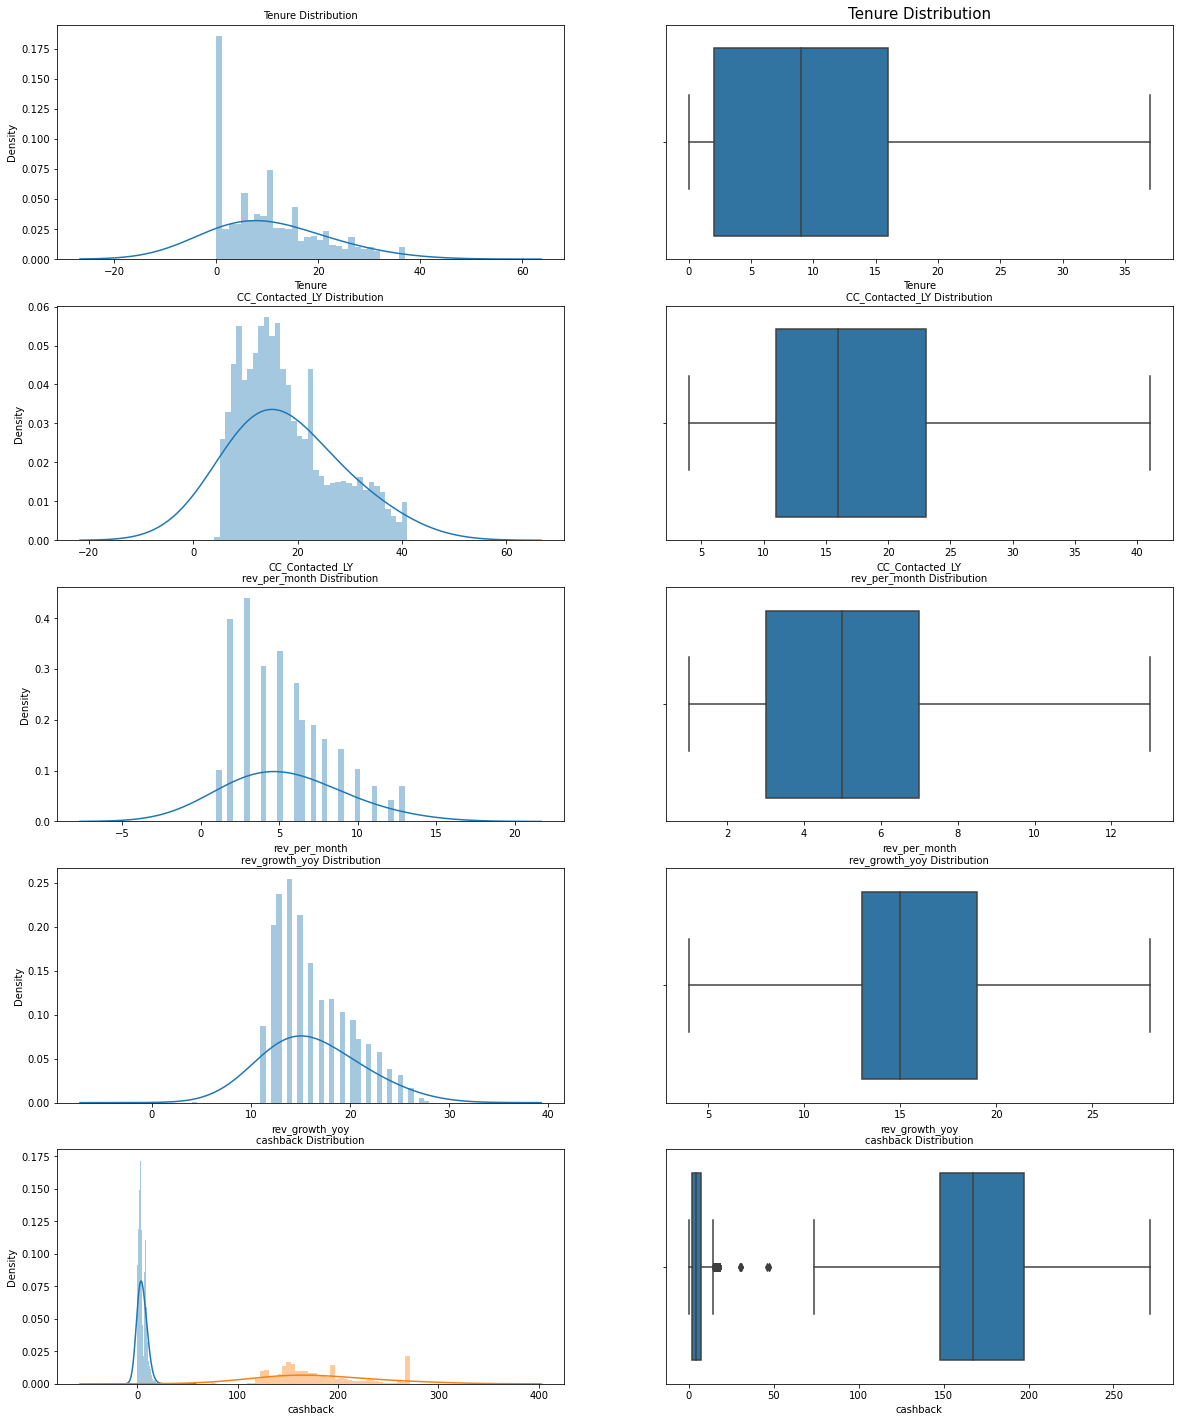

In [36]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(20, 25)

a = sns.distplot(churn['Tenure'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Tenure Distribution",fontsize=10)

a = sns.boxplot(churn['Tenure'] , orient = "v" , ax=axes[0][1])
a.set_title("Tenure Distribution",fontsize=15)

a = sns.distplot(churn['CC_Contacted_LY'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("CC_Contacted_LY Distribution",fontsize=10)

a = sns.boxplot(churn['CC_Contacted_LY'] , orient = "v" , ax=axes[1][1])
a.set_title("CC_Contacted_LY Distribution",fontsize=10)

a = sns.distplot(churn['rev_per_month'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("rev_per_month Distribution",fontsize=10)

a = sns.boxplot(churn['rev_per_month'] , orient = "v" , ax=axes[2][1])
a.set_title("rev_per_month Distribution",fontsize=10)

a = sns.distplot(churn['rev_growth_yoy'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("rev_growth_yoy Distribution",fontsize=10)

a = sns.boxplot(churn['rev_growth_yoy'] , orient = "v" , ax=axes[3][1])
a.set_title("rev_growth_yoy Distribution",fontsize=10)

a = sns.distplot(churn['Day_Since_CC_connect'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("Day_Since_CC_connect Distribution",fontsize=10)

a = sns.boxplot(churn['Day_Since_CC_connect'] , orient = "v" , ax=axes[4][1])
a.set_title("Day_Since_CC_connect Distribution",fontsize=10)

a = sns.distplot(churn['cashback'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("cashback Distribution",fontsize=10)

a = sns.boxplot(churn['cashback'] , orient = "v" , ax=axes[4][1])
a.set_title("cashback Distribution",fontsize=10)

### Data Correlation

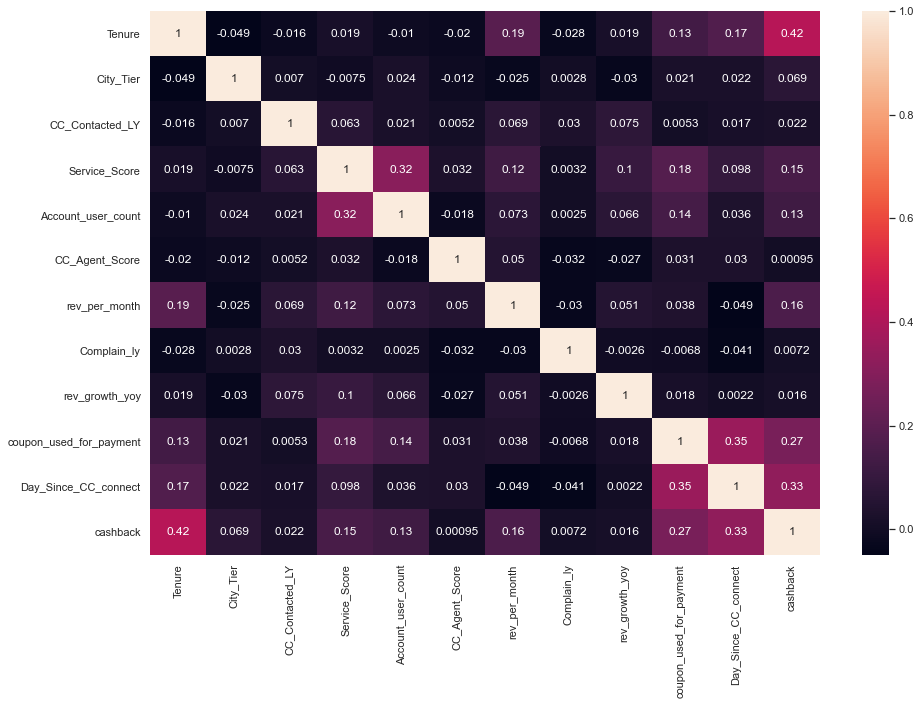

In [37]:
# let's check correlation
sns.set(rc={'figure.figsize':(15,10)})
corr = churn.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [38]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = churn.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
cashback             Tenure                      0.422706
Day_Since_CC_connect coupon_used_for_payment     0.354672
cashback             Day_Since_CC_connect        0.331911
Service_Score        Account_user_count          0.315423

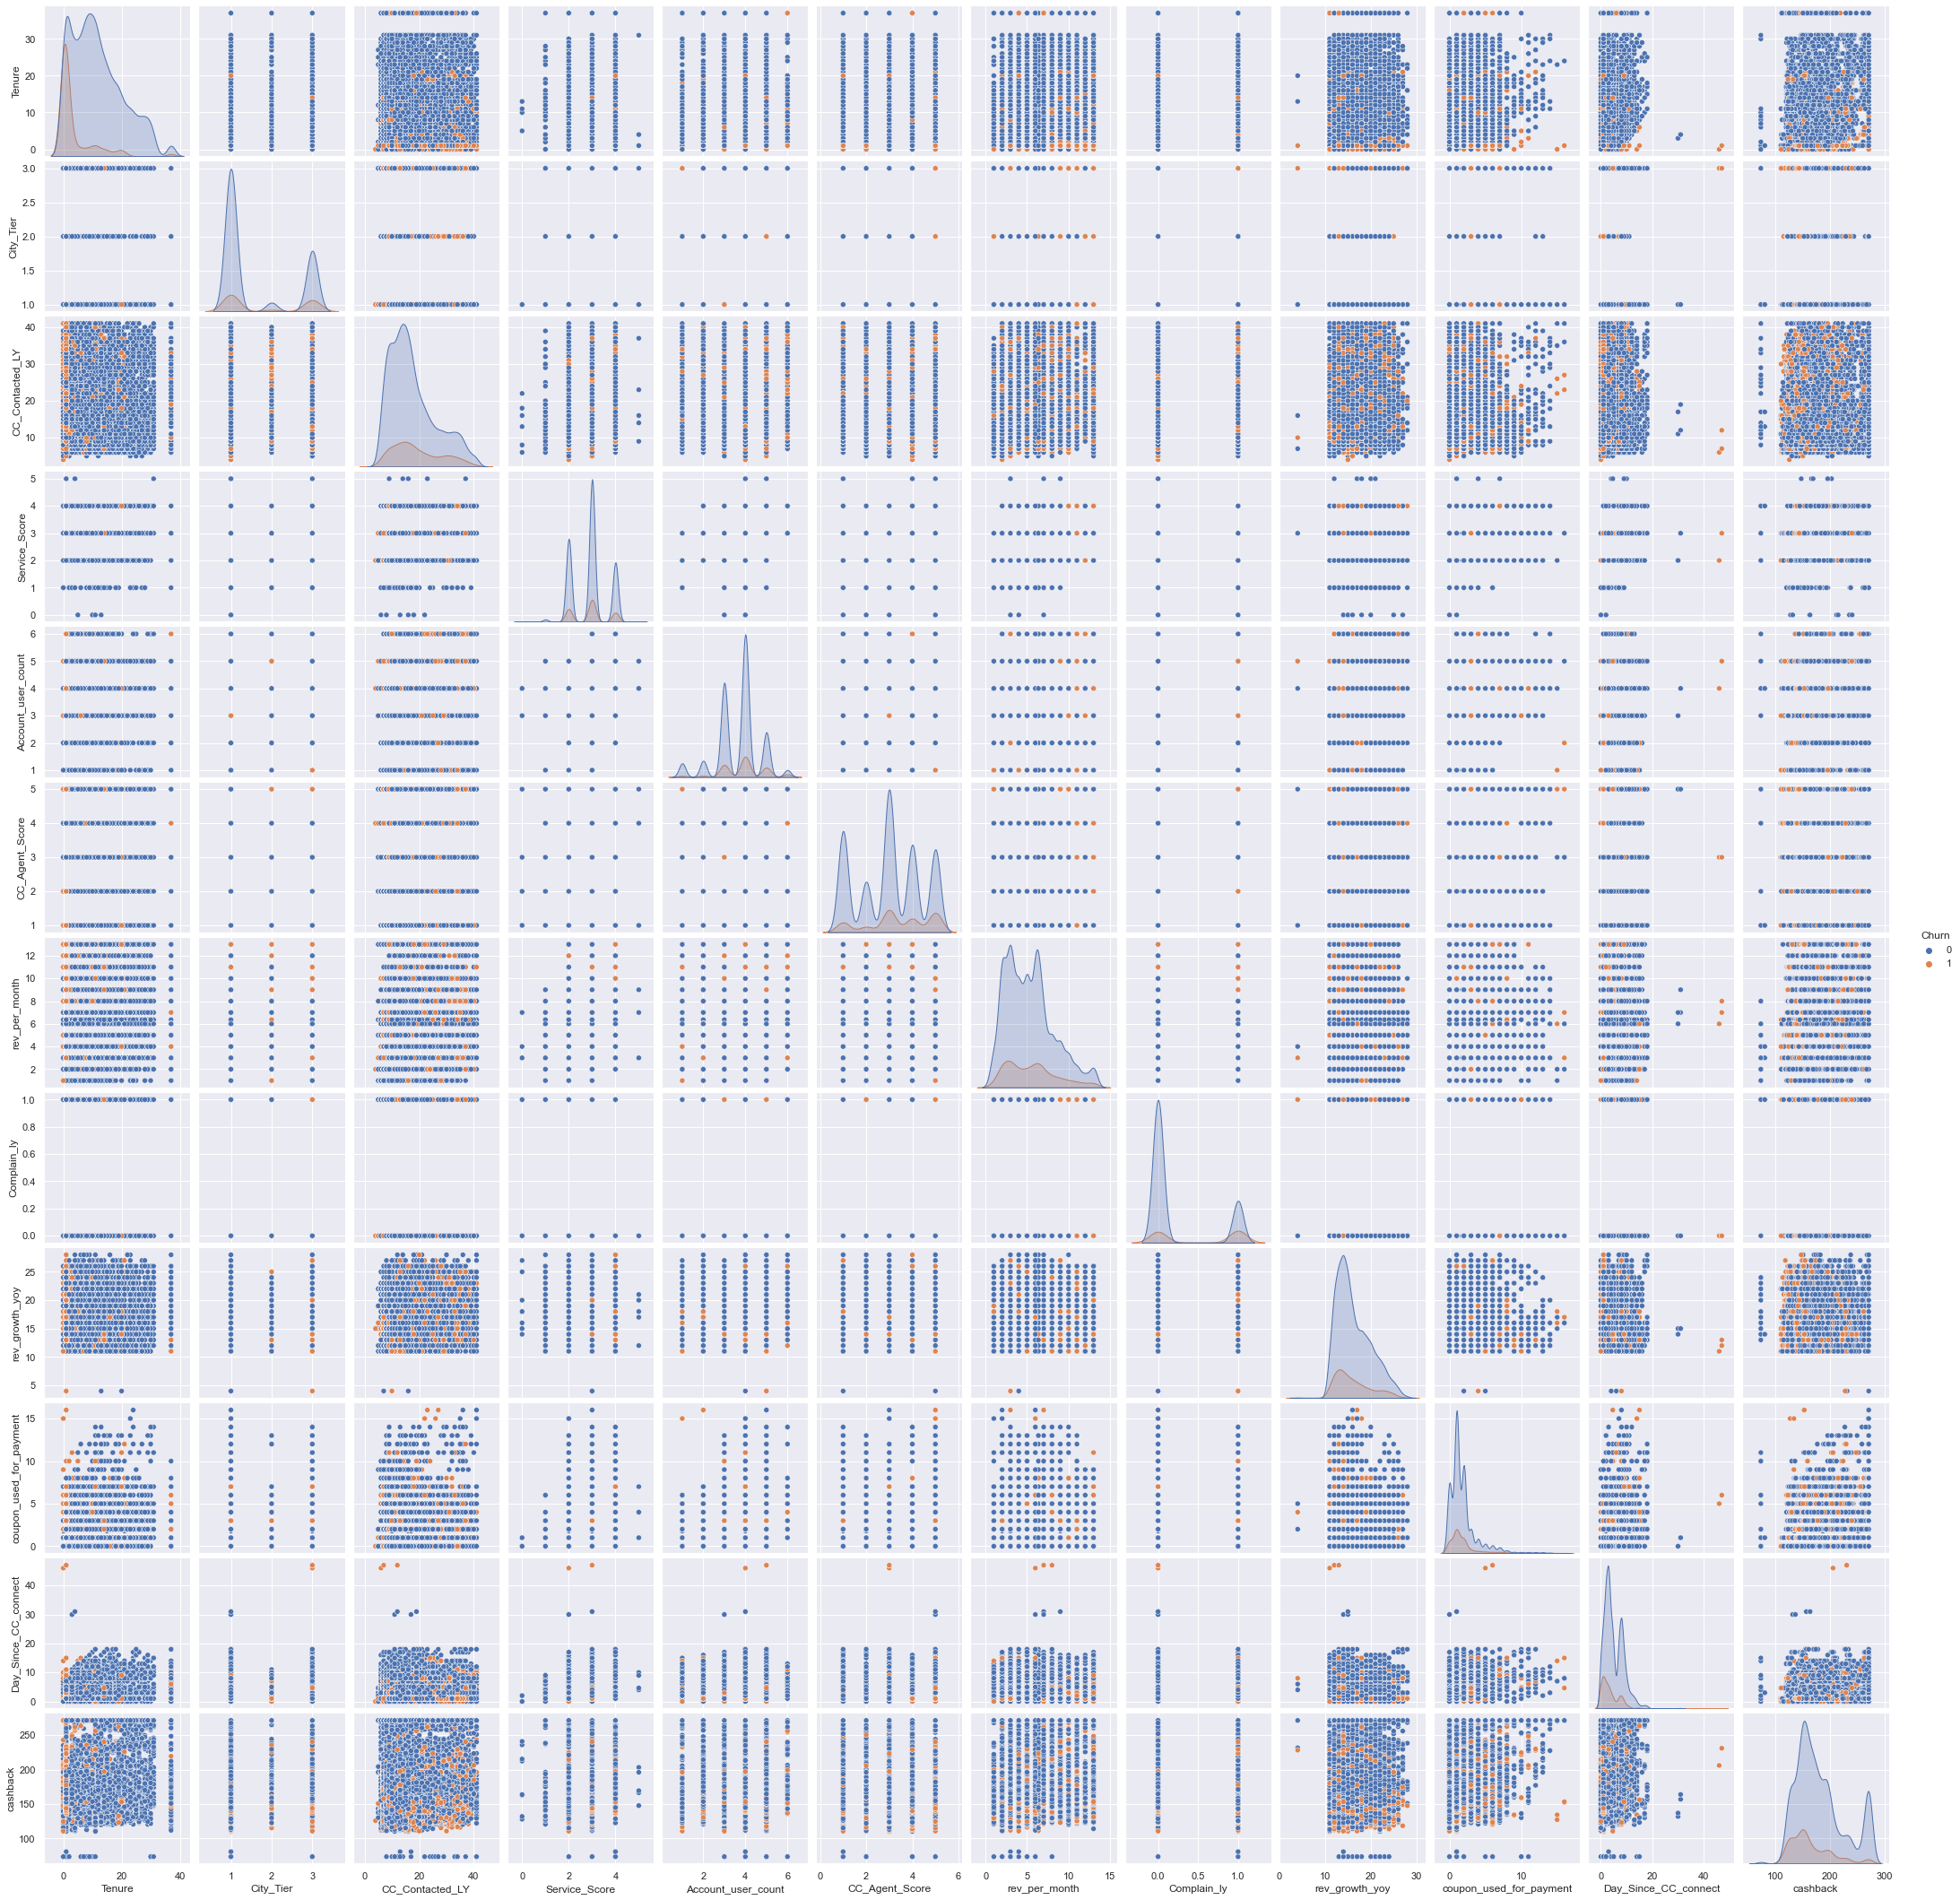

In [39]:
sns.pairplot(churn,hue='Churn')
plt.show()

### the unique values of each column

In [40]:
#This function will search and print for all the unique values in each column.
def print_unique_col_values(dataframe):
       for column in dataframe:
            if dataframe[column].dtypes=='object':
                print(f'{column}: {dataframe[column].unique()}')

In [41]:
print_unique_col_values(churn)

Churn: [1 0]
Payment: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Gender: ['Female' 'Male']
account_segment: ['Super' 'Regular +' 'Regular' 'HNI' 'Super +']
Marital_Status: ['Single' 'Divorced' 'Married']
Login_device: ['Mobile' 'Computer']


#### Check the demographic variables

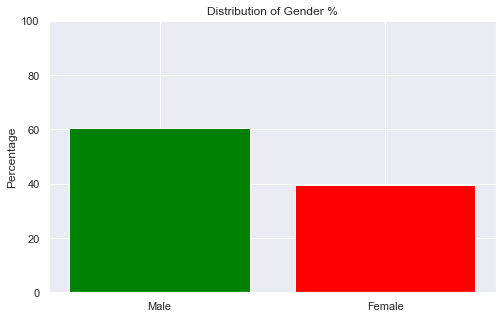

In [42]:
fig, axes1 = plt.subplots(figsize=(8,5))

# Plot distribution of gender data
data = churn["Gender"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green', 'red'])
axes1.set_title('Distribution of Gender %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)
plt.show()

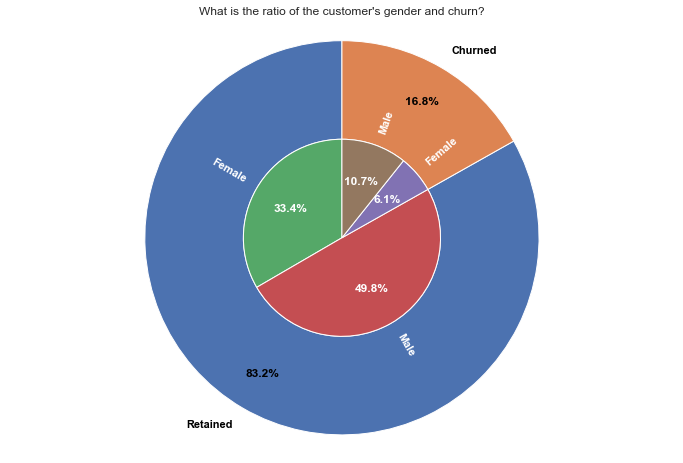

In [43]:
fig, axes2 = plt.subplots(figsize=(12,8))

# Pie chart of churn percentage
width = 0.5

# Percentage of Churned vs Retained
data = churn.Churn.value_counts().sort_index()
axes2.pie(
    data,
    labels=['Retained', 'Churned'],
    autopct='%1.1f%%',
    pctdistance=0.8,
    startangle=90,
    textprops={'color':'black', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1,
)

# Percentage of Gender based on Churn
data = churn.groupby(["Churn", "Gender"]).size().reset_index()
axes2.pie(
    data.iloc[:,2], 
    labels=list(data.Gender),
    autopct='%1.1f%%',
    startangle=90,
    textprops={'color':'white', 'fontweight':'bold'},
    wedgeprops = {'width':width, 'edgecolor':'w'},
    radius=1-width,
    rotatelabels=True,
)

axes2.set_title('What is the ratio of the customer\'s gender and churn?')
#axes2.legend(loc='best', bbox_to_anchor=(1,1))
axes2.axis('equal')

plt.show()

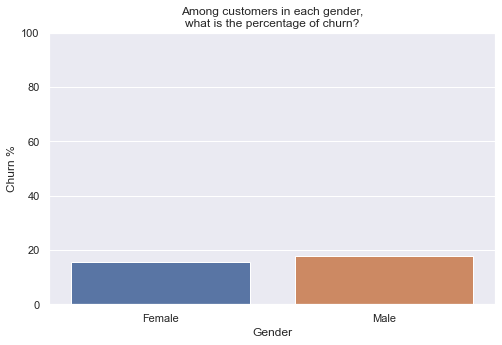

In [44]:
fig, axes3 = plt.subplots(figsize=(8,5))

# Chances of churn based on gender
sns.barplot(x="Gender", y=churn.Churn*100, data=churn, ci=None, ax=axes3)
axes3.set_xlabel('Gender')
axes3.set_ylabel('Churn %')
axes3.set_title('\n'.join(wrap('Among customers in each gender, what is the percentage of churn?', 35)))
axes3.set_ylim(0,100)
plt.show()

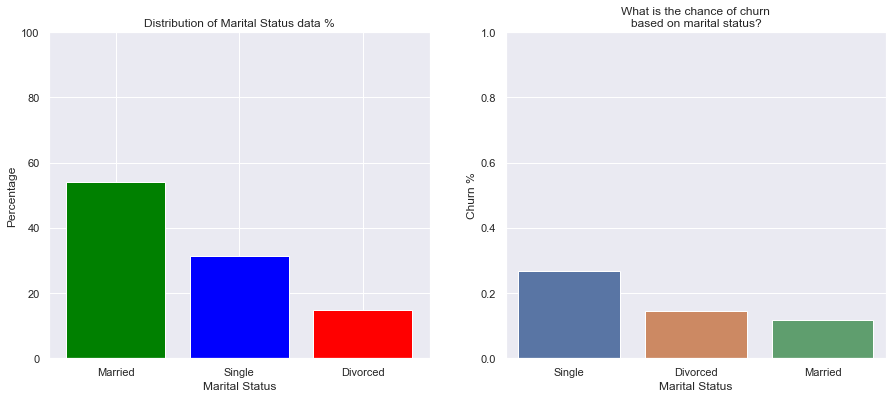

In [45]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of marital status
data = churn["Marital_Status"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','blue', 'red'])
axes1.set_title('Distribution of Marital Status data %')
axes1.set_xlabel('Marital Status')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Marital Status
sns.barplot(x="Marital_Status", y="Churn", data=churn, ci=None, ax=axes2)
axes2.set_xlabel('Marital Status')
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on marital status?', 30)))
axes2.set_ylim(0,1)

plt.show()

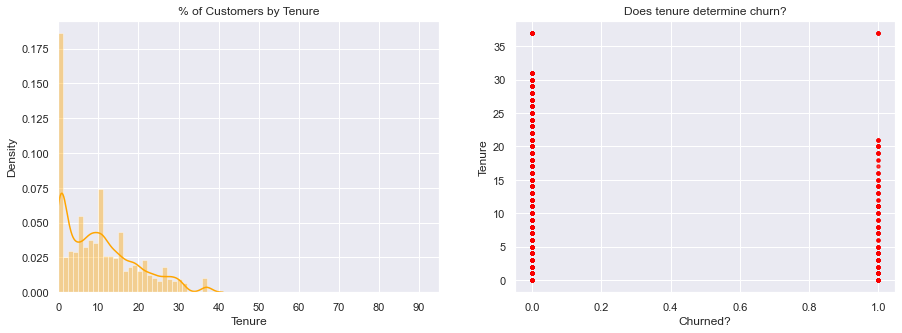

In [46]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,5))

# Plot tenure
sns.distplot(churn.Tenure, color='orange', ax=axes1)
axes1.set_title('% of Customers by Tenure')
axes1.set_xticks(np.arange(0, 100, 10))
axes1.set_xlim(0,95)

# Plot relation between tenure and churn
axes2.scatter(churn.Churn, churn.Tenure, color='red', s=10, alpha=0.2)
axes2.set_xlabel('Churned?')
axes2.set_ylabel('Tenure')
axes2.set_title('Does tenure determine churn?')

plt.show()

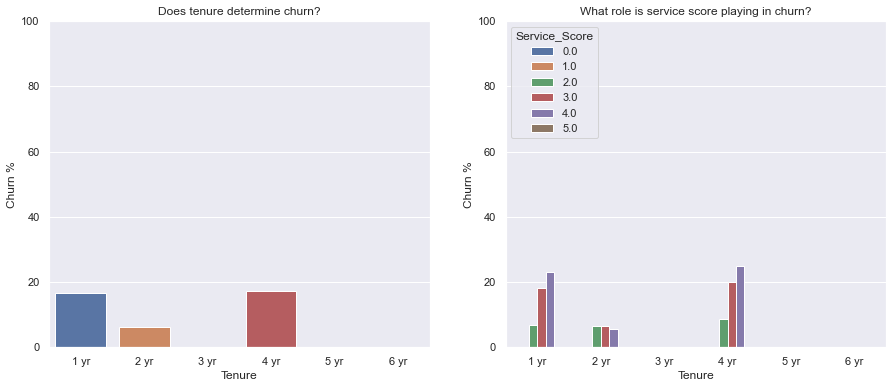

In [47]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
churn['tenureGroup'] = pd.cut(churn["Tenure"], bins, labels=labels)

# Bar plot tenure vs churn
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="tenureGroup", y=churn.Churn*100, data=churn, ci=None, ax=axes1)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Churn %')
axes1.set_ylim(0,100)
axes1.set_title('Does tenure determine churn?')

# Bar plot tenure vs churn vs satisfaction score
sns.barplot(x="tenureGroup", y=churn.Churn*100, hue="Service_Score", data=churn, ci=None, ax=axes2)
axes2.set_xlabel('Tenure')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('What role is service score playing in churn?')


plt.show()

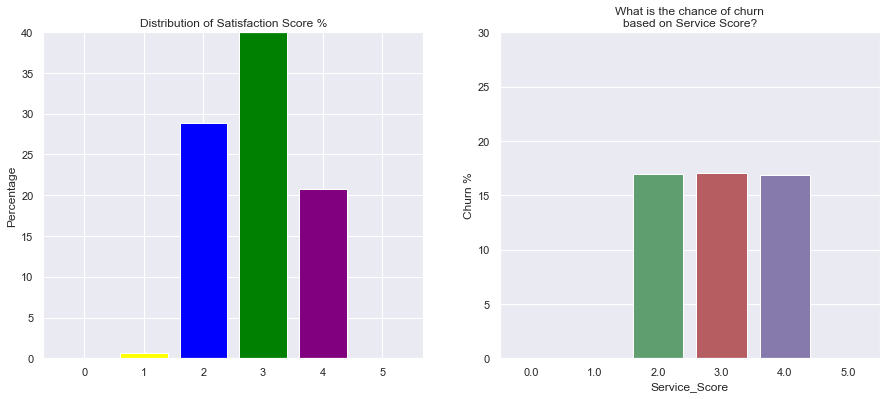

In [48]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Satisfaction Score
data = churn["Service_Score"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','blue','purple','yellow','red'])
axes1.set_title('Distribution of Satisfaction Score %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,40)

# Chances of churn based on Satisfaction Score
sns.barplot(x="Service_Score", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Service Score?', 30)))
axes2.set_ylim(0,30)

plt.show()

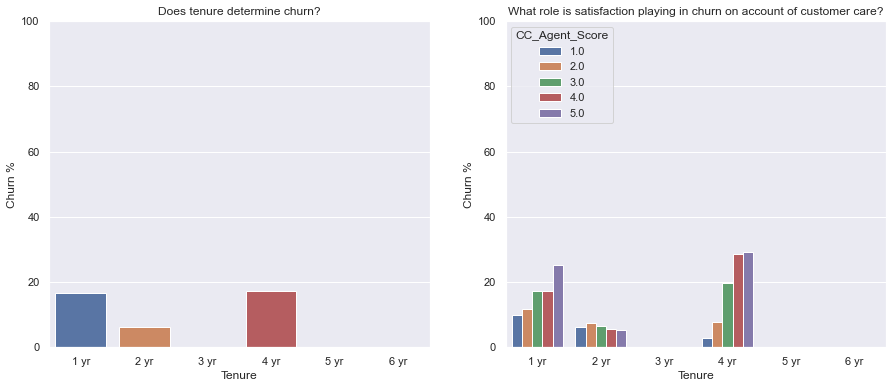

In [49]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
churn['tenureGroup'] = pd.cut(churn["Tenure"], bins, labels=labels)

# Bar plot tenure vs churn
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="tenureGroup", y=churn.Churn*100, data=churn, ci=None, ax=axes1)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Churn %')
axes1.set_ylim(0,100)
axes1.set_title('Does tenure determine churn?')

# Bar plot tenure vs churn vs satisfaction score
sns.barplot(x="tenureGroup", y=churn.Churn*100, hue="CC_Agent_Score", data=churn, ci=None, ax=axes2)
axes2.set_xlabel('Tenure')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('What role is satisfaction playing in churn on account of customer care?')


plt.show()

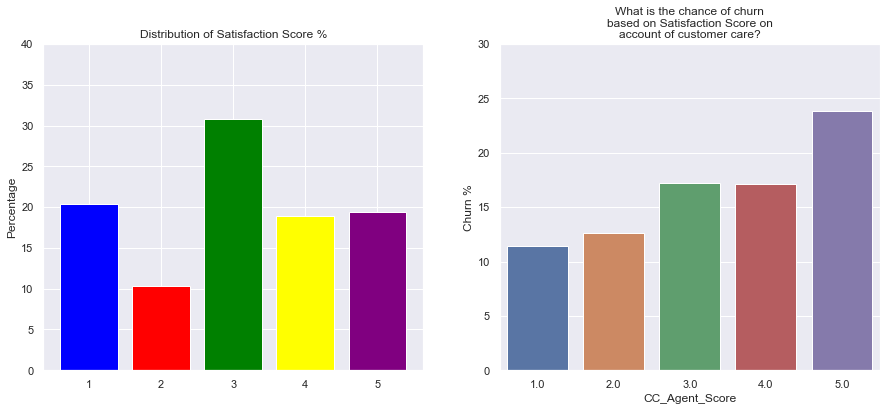

In [50]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Satisfaction Score
data = churn["CC_Agent_Score"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','blue','purple','yellow','red'])
axes1.set_title('Distribution of Satisfaction Score %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,40)

# Chances of churn based on Satisfaction Score
sns.barplot(x="CC_Agent_Score", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Satisfaction Score on account of customer care?', 30)))
axes2.set_ylim(0,30)

plt.show()

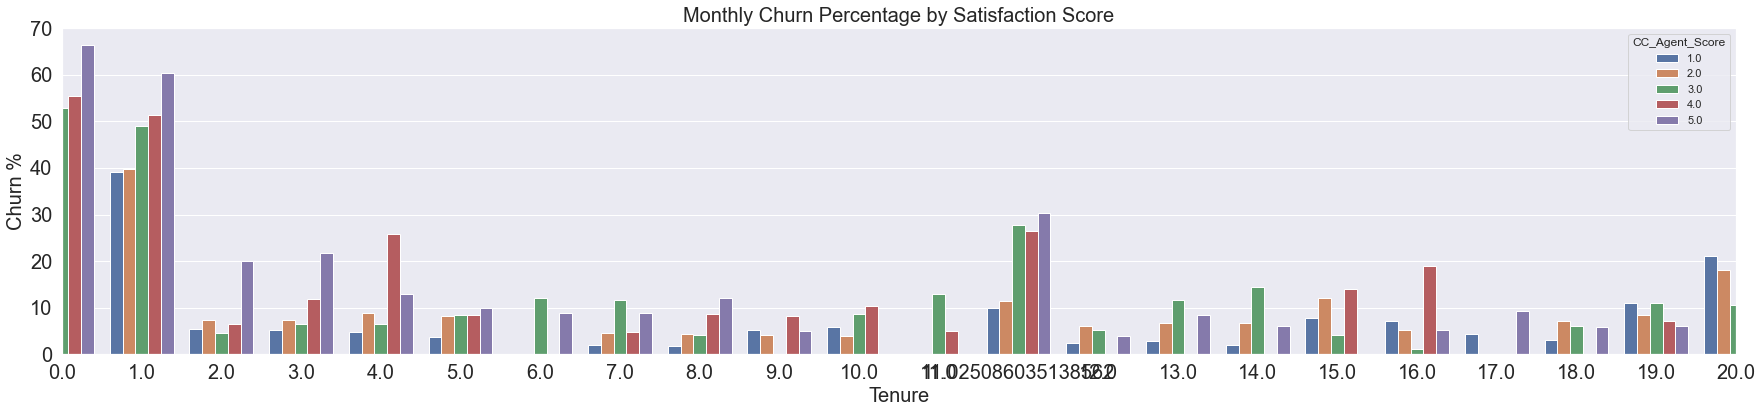

In [51]:
fig, axes2 = plt.subplots(figsize=(30,6))
sns.barplot(x="Tenure", y=churn.Churn*100, hue="CC_Agent_Score", data=churn, ci=None, ax=axes2)
axes2.set_xlabel('Tenure', fontsize = 20)
axes2.set_ylabel('Churn %', fontsize = 20)
axes2.set_ylim(0,70)
axes2.set_xlim(0,21)
axes2.set_title("Monthly Churn Percentage by Satisfaction Score", fontsize = 20)
axes2.xaxis.set_tick_params(labelsize=20)
axes2.yaxis.set_tick_params(labelsize=20)

plt.show()

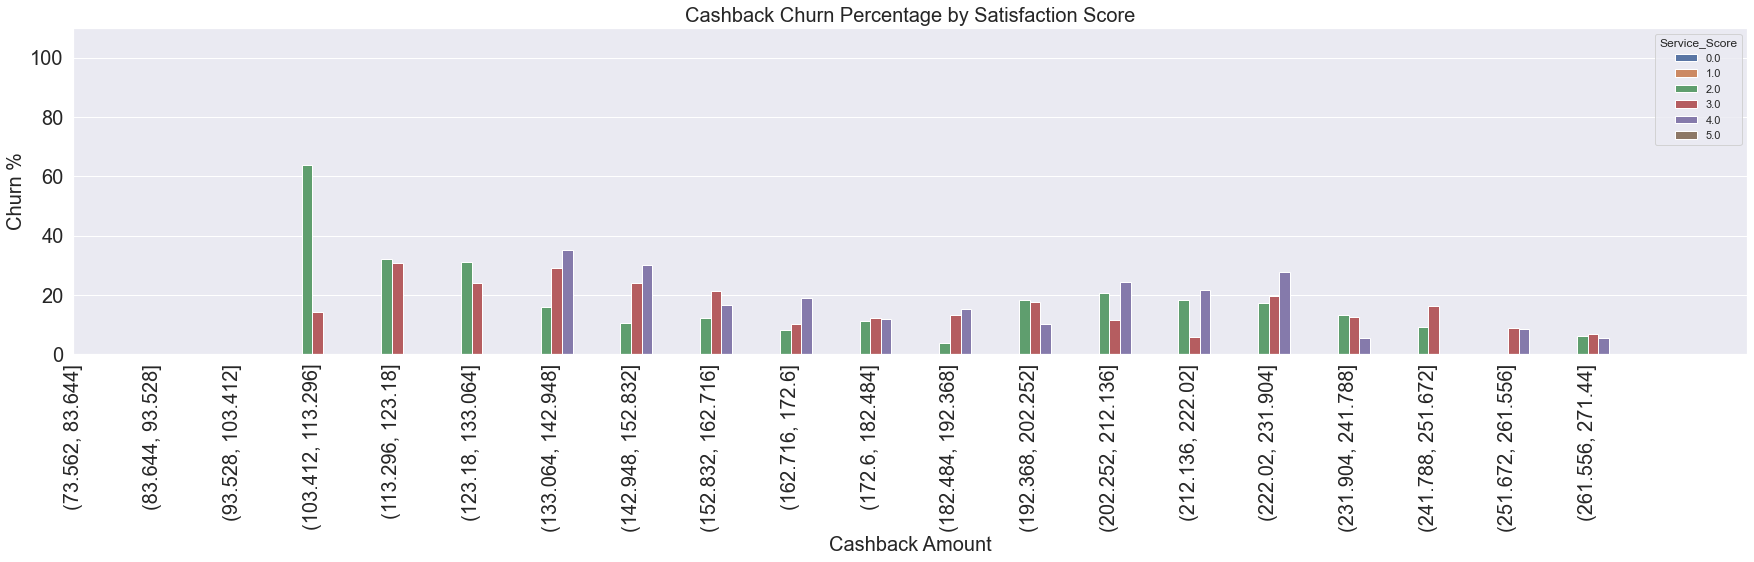

In [52]:
fig, axes2 = plt.subplots(figsize=(30,6))
churn['CashbackAmountCategory'] = pd.cut(churn["cashback"], bins=20)
sns.barplot(x="CashbackAmountCategory", y=churn.Churn*100, hue="Service_Score", data=churn, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_xlabel('Cashback Amount', fontsize = 20)
axes2.set_ylabel('Churn %', fontsize = 20)
axes2.set_ylim(0,110)
axes2.set_xlim(0,21)
axes2.set_title("Cashback Churn Percentage by Satisfaction Score", fontsize = 20)
axes2.xaxis.set_tick_params(labelsize=20)
axes2.yaxis.set_tick_params(labelsize=20)

plt.show()

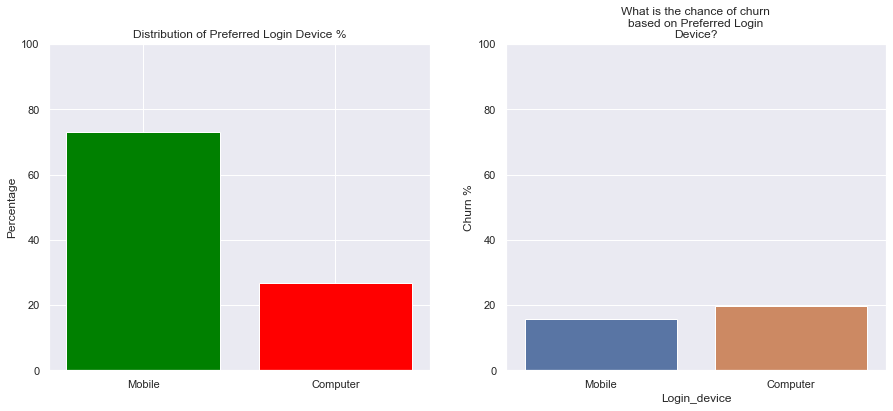

In [53]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Preferred Login Device
data = churn["Login_device"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Preferred Login Device %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Preferred Login Device
sns.barplot(x="Login_device", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Preferred Login Device?', 30)))
axes2.set_ylim(0,100)

plt.show()

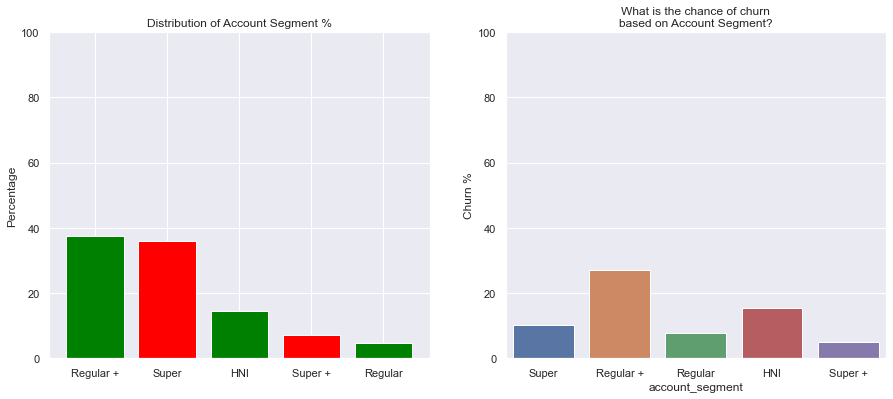

In [54]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Hour Spend On App
data = churn["account_segment"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Account Segment %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Hour Spend On App
sns.barplot(x="account_segment", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Account Segment?', 30)))
axes2.set_ylim(0,100)

plt.show()

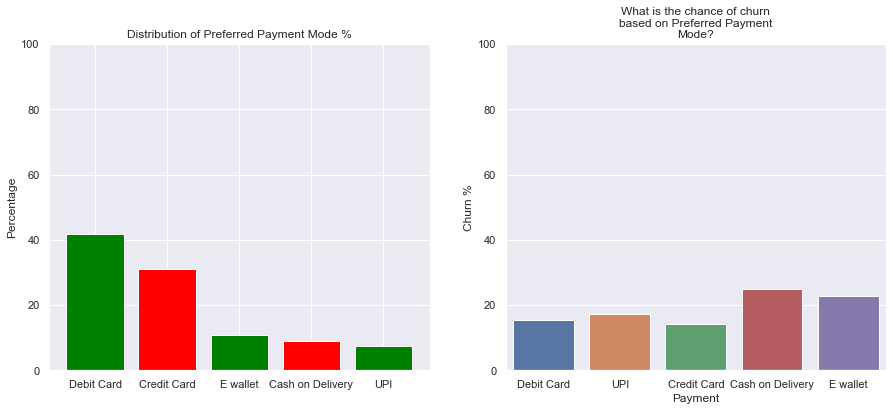

In [55]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Preferred Payment Mode
data = churn["Payment"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Preferred Payment Mode %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Preferred Payment Mode
sns.barplot(x="Payment", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Preferred Payment Mode?', 30)))
axes2.set_ylim(0,100)

plt.show()

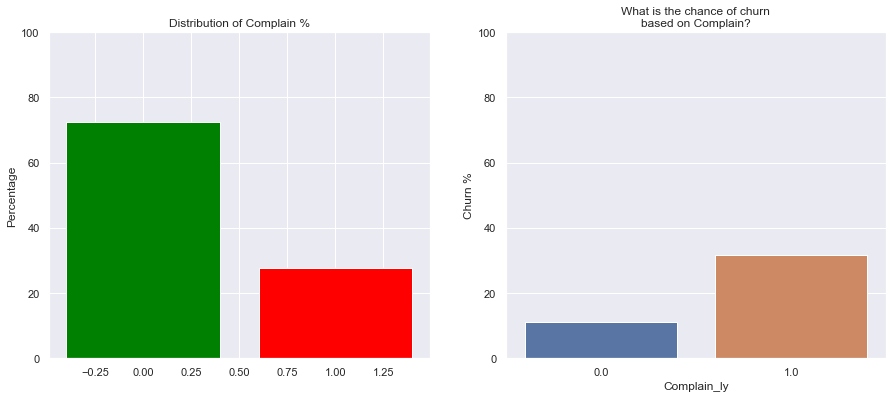

In [56]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Complain
data = churn["Complain_ly"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Complain %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Complain
sns.barplot(x="Complain_ly", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Complain?', 30)))
axes2.set_ylim(0,100)

plt.show()

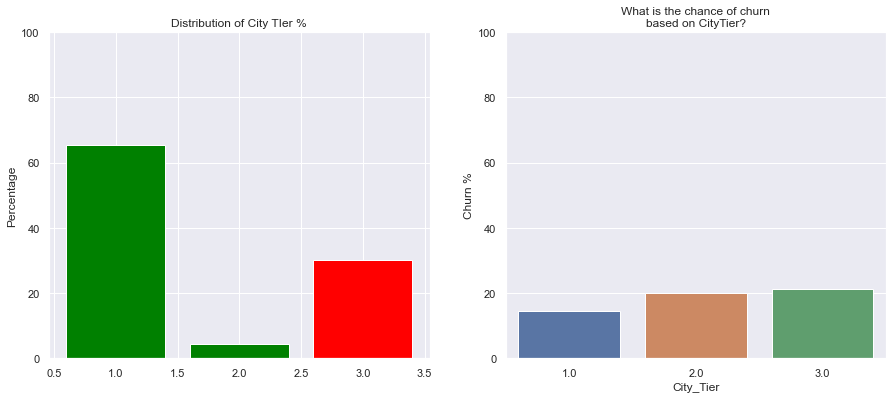

In [57]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of City Tier
data = churn["City_Tier"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of City TIer %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on City Tier
sns.barplot(x="City_Tier", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on CityTier?', 30)))
axes2.set_ylim(0,100)

plt.show()

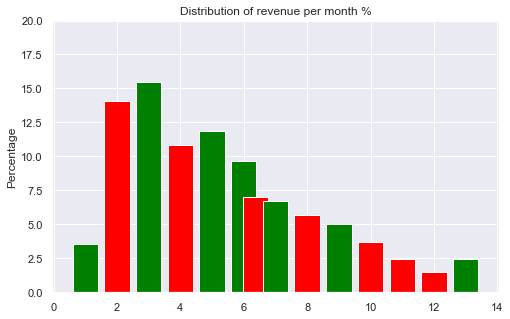

In [58]:
fig, axes1 = plt.subplots(figsize=(8,5))
# Plot distribution of Warehouse To Home
data = churn["rev_per_month"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of revenue per month %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,20)

plt.show()

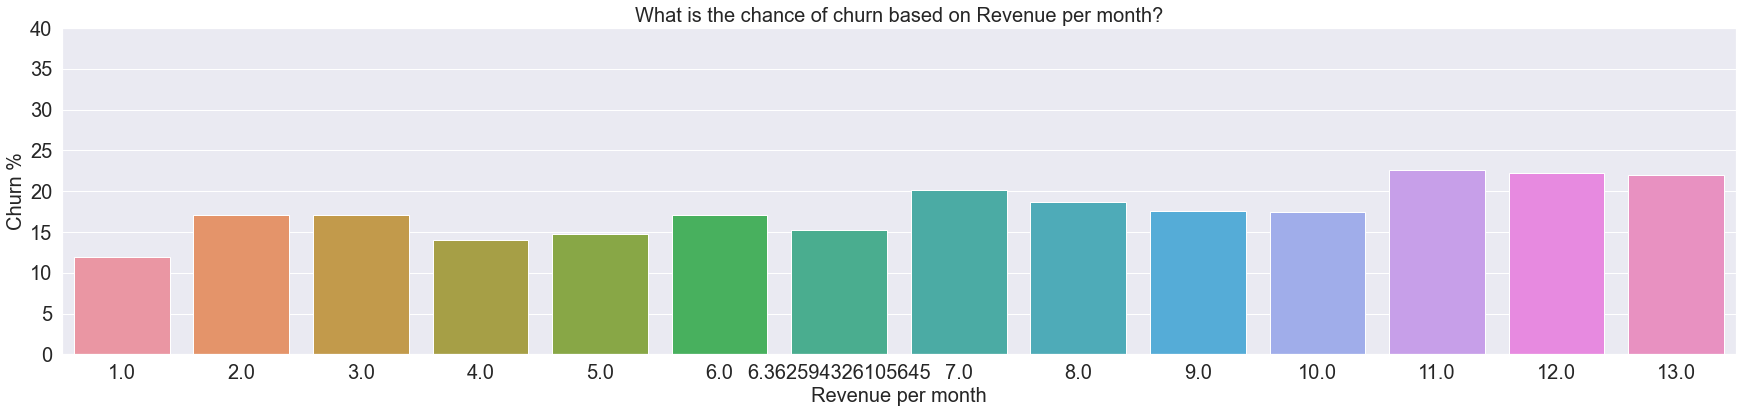

In [59]:
# Chances of churn based on WarehouseToHome
fig, axes2 = plt.subplots(figsize=(30,6))
sns.barplot(x='rev_per_month', y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %', fontsize = 20)
axes2.set_xlabel('Revenue per month', fontsize = 20)
axes2.set_title("What is the chance of churn based on Revenue per month?", fontsize = 20)
axes2.set_ylim(0,40)
axes2.xaxis.set_tick_params(labelsize=20)
axes2.yaxis.set_tick_params(labelsize=20)

plt.show()

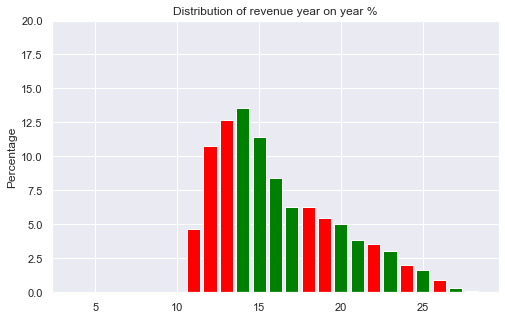

In [60]:
fig, axes1 = plt.subplots(figsize=(8,5))
# Plot distribution of Warehouse To Home
data = churn["rev_growth_yoy"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of revenue year on year %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,20)

plt.show()

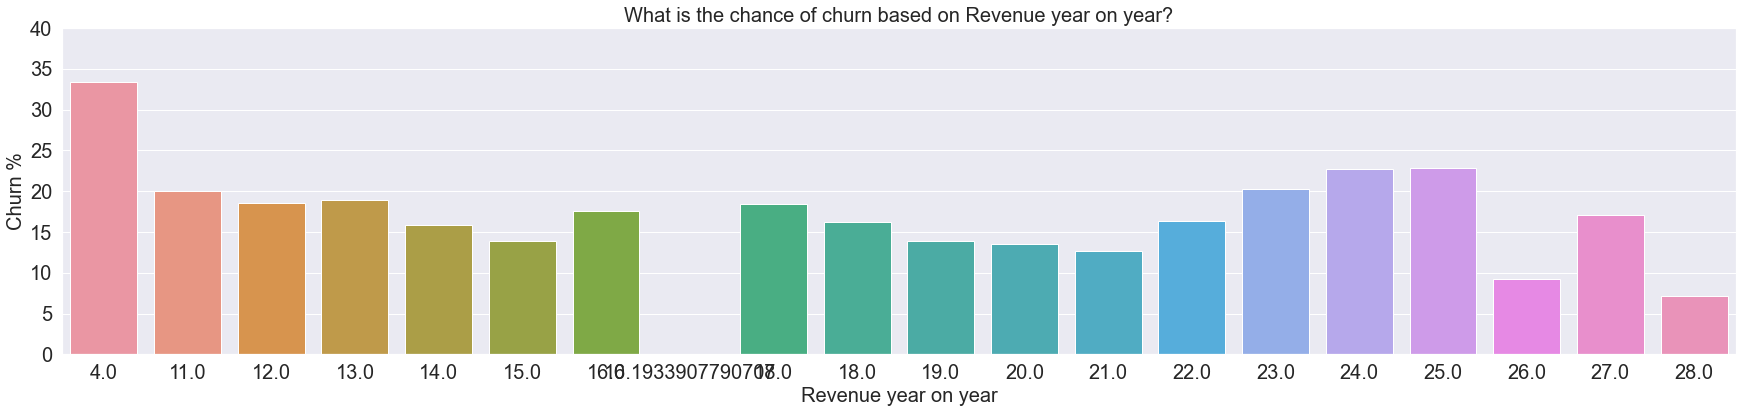

In [61]:
# Chances of churn based on WarehouseToHome
fig, axes2 = plt.subplots(figsize=(30,6))
sns.barplot(x='rev_growth_yoy', y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %', fontsize = 20)
axes2.set_xlabel('Revenue year on year', fontsize = 20)
axes2.set_title("What is the chance of churn based on Revenue year on year?", fontsize = 20)
axes2.set_ylim(0,40)
axes2.xaxis.set_tick_params(labelsize=20)
axes2.yaxis.set_tick_params(labelsize=20)

plt.show()

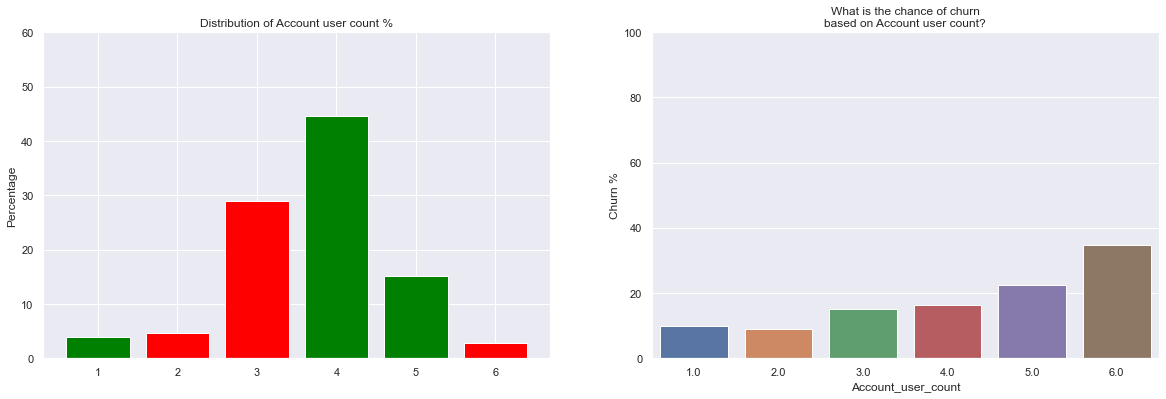

In [62]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(20,6))

# Plot distribution of Number of Device Registered
data = churn["Account_user_count"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Account user count %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,60)

# Chances of churn based on Number of Device Registered
sns.barplot(x="Account_user_count", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Account user count?', 30)))
axes2.set_ylim(0,100)

plt.show()

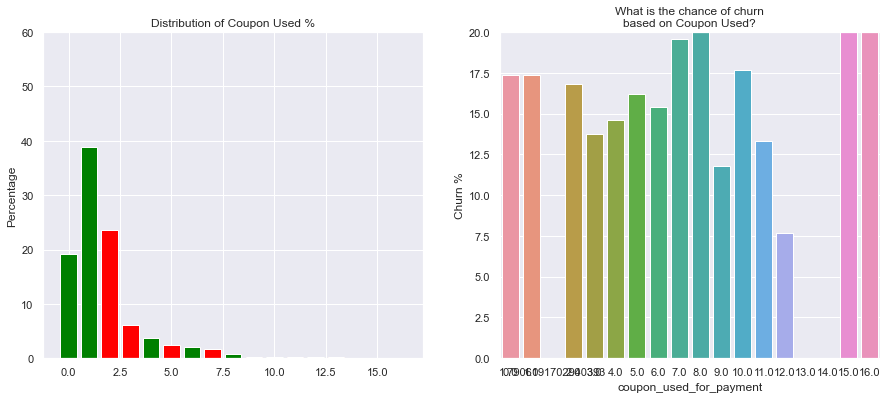

In [63]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Coupon Used
data = churn["coupon_used_for_payment"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Coupon Used %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,60)

# Chances of churn based on Coupon Used
sns.barplot(x="coupon_used_for_payment", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Coupon Used?', 30)))
axes2.set_ylim(0,20)

plt.show()

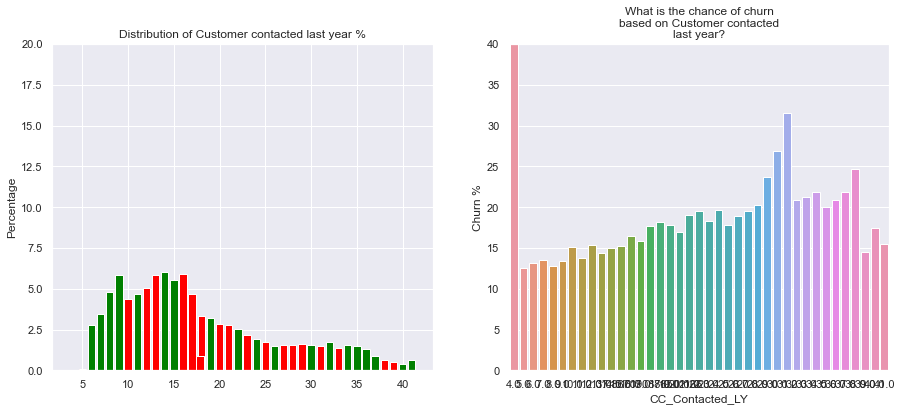

In [64]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Day Since Last Order
data = churn["CC_Contacted_LY"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of Customer contacted last year %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,20)

# Chances of churn based on Day Since Last Order
sns.barplot(x="CC_Contacted_LY", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Customer contacted last year?', 30)))
axes2.set_ylim(0,40)

plt.show()

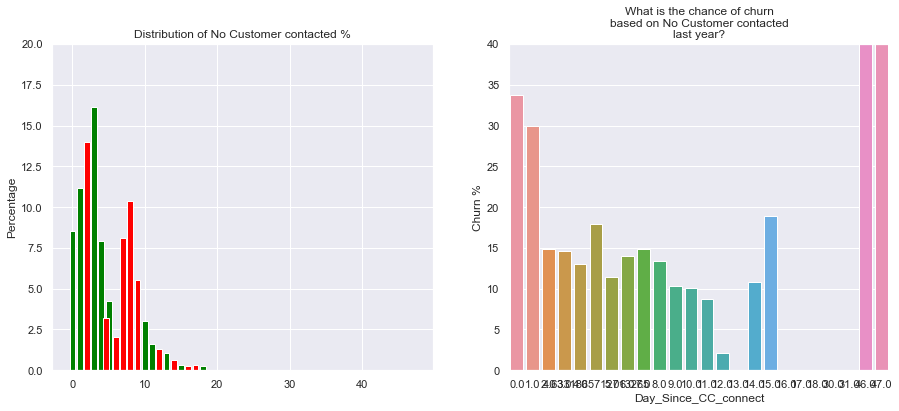

In [65]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Day Since Last Order
data = churn["Day_Since_CC_connect"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=['green','red'])
axes1.set_title('Distribution of No Customer contacted %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,20)

# Chances of churn based on Day Since Last Order
sns.barplot(x="Day_Since_CC_connect", y=churn.Churn*100, data=churn, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on No Customer contacted last year?', 30)))
axes2.set_ylim(0,40)

plt.show()

# Scaling the data

In [66]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [67]:
# Creating an object for the StandardScaler function
X = StandardScaler()

In [68]:
num_col = churn[['Churn','Tenure','City_Tier','Service_Score','CC_Agent_Score','cashback','rev_per_month','Day_Since_CC_connect','CC_Contacted_LY','rev_growth_yoy',]]

In [69]:
num_col.head()

Churn  Tenure  City_Tier  Service_Score  CC_Agent_Score   cashback  \
0     1     4.0        3.0            3.0             2.0  159.93000   
1     1     0.0        1.0            3.0             3.0  120.90000   
2     1     0.0        1.0            2.0             3.0  196.23637   
3     1     0.0        3.0            2.0             5.0  134.07000   
4     1     0.0        1.0            2.0             5.0  129.60000   

   rev_per_month  Day_Since_CC_connect  CC_Contacted_LY  rev_growth_yoy  
0            9.0                   5.0              6.0            11.0  
1            7.0                   0.0              8.0            15.0  
2            6.0                   3.0             30.0            14.0  
3            8.0                   3.0             15.0            23.0  
4            3.0                   3.0             12.0            11.0

In [70]:
scaled_churn = pd.DataFrame(X.fit_transform(num_col))

In [71]:
scaled_churn.head()

0         1         2         3         4         5         6  \
0  2.222345 -0.707817  1.481914  0.133748 -0.776488 -0.427347  1.263227   
1  2.222345 -1.157893 -0.709334  0.133748 -0.047944 -1.321400  0.571707   
2  2.222345 -1.157893 -0.709334 -1.250443 -0.047944  0.404316  0.225947   
3  2.222345 -1.157893  1.481914 -1.250443  1.409143 -1.019717  0.917467   
4  2.222345 -1.157893 -0.709334 -1.250443  1.409143 -1.122110 -0.811333   

          7         8         9  
0  0.100822 -1.381911 -1.382304  
1 -1.273478 -1.148320 -0.317640  
2 -0.448898  1.421172 -0.583806  
3 -0.448898 -0.330755  1.811688  
4 -0.448898 -0.681140 -1.382304

In [72]:
from sklearn.cluster import KMeans 

# Creating Clusters using KMeans

### Forming 2 Clusters with K=2

In [73]:
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=1)

In [74]:
# Fit K means on the scaled_df
k_means.fit(scaled_churn)

KMeans(n_clusters=2, random_state=1)

### Cluster Output for all the observations

In [75]:
# Get the labels
k_means.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=int32)

### Within Cluster Sum of Squares

In [76]:
k_means.inertia_

98961.82370840009

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [77]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(scaled_churn)
k_means.inertia_

112599.99999999977

In [78]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_churn)
k_means.inertia_

88501.18359647373

In [79]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(scaled_churn)
k_means.inertia_

81839.4019658608

In [80]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(scaled_churn)
k_means.inertia_

77517.6149002198

In [81]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(scaled_churn)
k_means.inertia_

74536.37846598153

### Calculating WSS for other values of K - Elbow Method

In [82]:
wss =[] 

In [83]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_churn)
    wss.append(KM.inertia_)

In [84]:
wss

[112599.99999999977,
 98961.82370840007,
 88501.18359647373,
 81839.4019658608,
 77517.6149002198,
 74536.37846598153,
 71736.63600941424,
 69438.9481761492,
 67566.11282995886,
 65586.1674956656]

In [85]:
a=[1,2,3,4,5,6,7,8,9,10]

<AxesSubplot:>

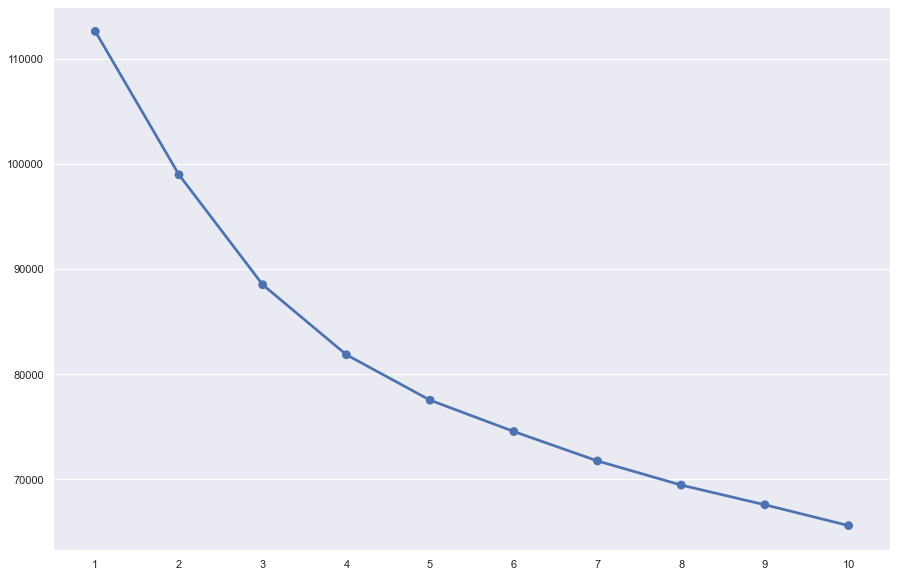

In [86]:
sns.pointplot(a, wss)

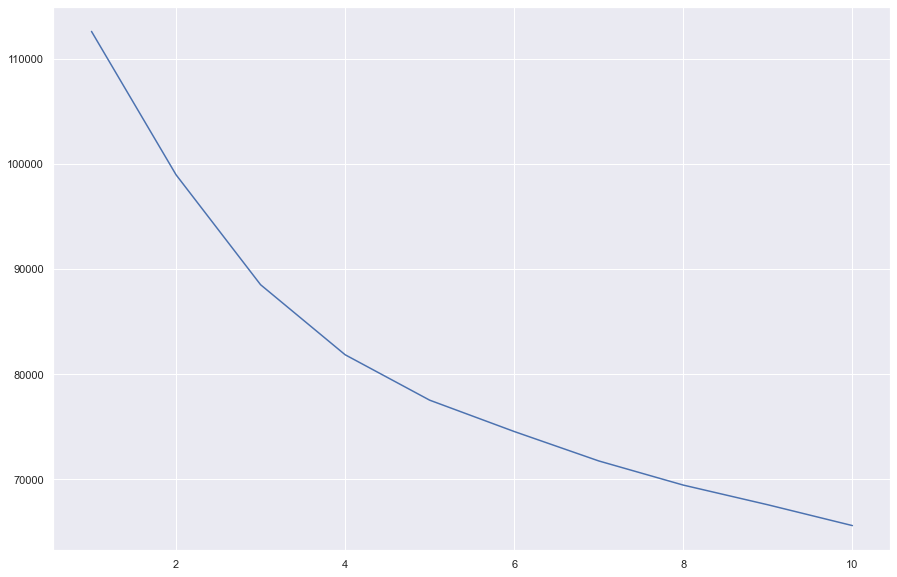

In [87]:
plt.plot(range(1,11), wss)

# KMeans with K=3

In [88]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_churn)
labels = k_means.labels_

### Cluster evaluation for 3 clusters: the silhouette score

In [89]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [90]:
# Calculating silhouette_score
silhouette_score(scaled_churn,labels,random_state=1)

0.141443236195445

In [91]:
scaled_churn["Clus_kmeans3"] = labels
scaled_churn.head()

0         1         2         3         4         5         6  \
0  2.222345 -0.707817  1.481914  0.133748 -0.776488 -0.427347  1.263227   
1  2.222345 -1.157893 -0.709334  0.133748 -0.047944 -1.321400  0.571707   
2  2.222345 -1.157893 -0.709334 -1.250443 -0.047944  0.404316  0.225947   
3  2.222345 -1.157893  1.481914 -1.250443  1.409143 -1.019717  0.917467   
4  2.222345 -1.157893 -0.709334 -1.250443  1.409143 -1.122110 -0.811333   

          7         8         9  Clus_kmeans3  
0  0.100822 -1.381911 -1.382304             1  
1 -1.273478 -1.148320 -0.317640             1  
2 -0.448898  1.421172 -0.583806             1  
3 -0.448898 -0.330755  1.811688             1  
4 -0.448898 -0.681140 -1.382304             1

# Cluster Profiling

In [92]:
scaled_churn.Clus_kmeans3.value_counts().sort_index()

0    3624
1    1839
2    5797
Name: Clus_kmeans3, dtype: int64

In [93]:
clust_profile=scaled_churn
clust_profile=clust_profile.groupby('Clus_kmeans3').mean()
clust_profile['freq']=scaled_churn.Clus_kmeans3.value_counts().sort_index()
clust_profile

0         1         2         3         4         5  \
Clus_kmeans3                                                               
0            -0.407944  0.896023 -0.048452  0.290730  0.084537  0.954519   
1             2.222345 -0.800134  0.186111  0.007296  0.232539 -0.383280   
2            -0.449975 -0.306321 -0.028750 -0.184065 -0.126617 -0.475129   

                     6         7         8         9  freq  
Clus_kmeans3                                                
0             0.416538  0.542456  0.072997  0.115922  3624  
1             0.071427 -0.379061  0.184486 -0.021804  1839  
2            -0.283058 -0.218866 -0.104159 -0.065552  5797

In [94]:
churn.head()

Churn  Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0     1     4.0        3.0              6.0   Debit Card  Female   
1     1     0.0        1.0              8.0          UPI    Male   
2     1     0.0        1.0             30.0   Debit Card    Male   
3     1     0.0        3.0             15.0   Debit Card    Male   
4     1     0.0        1.0             12.0  Credit Card    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0       Regular +             3.0   
2            2.0                 4.0       Regular +             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0       Regular +             5.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0            11.0   
1         Single            7.0          1.0            15.0   
2         Single            6.0          1.0            14.0   
3         Single            8.0          0.0            23.0   
4         Single            3.0          0.0            11.0   

   coupon_used_for_payment  Day_Since_CC_connect   cashback Login_device  \
0                      1.0                   5.0  159.93000       Mobile   
1                      0.0                   0.0  120.90000       Mobile   
2                      0.0                   3.0  196.23637       Mobile   
3                      0.0                   3.0  134.07000       Mobile   
4                      1.0                   3.0  129.60000       Mobile   

  tenureGroup CashbackAmountCategory  
0        1 yr     (152.832, 162.716]  
1         NaN      (113.296, 123.18]  
2         NaN     (192.368, 202.252]  
3         NaN     (133.064, 142.948]  
4         NaN      (123.18, 133.064]

## Label Encoding

In [95]:
churn['Gender']=np.where(churn['Gender'] =='Female', '1', churn['Gender'])
churn['Gender']=np.where(churn['Gender'] =='Male', '0', churn['Gender'])

In [96]:
churn['Payment']=np.where(churn['Payment'] =='Debit Card', '5', churn['Payment'])
churn['Payment']=np.where(churn['Payment'] =='Credit Card', '4', churn['Payment'])
churn['Payment']=np.where(churn['Payment'] =='E wallet', '3', churn['Payment'])
churn['Payment']=np.where(churn['Payment'] =='Cash on Delivery', '2', churn['Payment'])
churn['Payment']=np.where(churn['Payment'] =='UPI', '1', churn['Payment'])

In [97]:
churn['account_segment']=np.where(churn['account_segment'] =='Regular +', '5', churn['account_segment'])
churn['account_segment']=np.where(churn['account_segment'] =='Super', '4', churn['account_segment'])
churn['account_segment']=np.where(churn['account_segment'] =='HNI', '3', churn['account_segment'])
churn['account_segment']=np.where(churn['account_segment'] =='Super +', '2', churn['account_segment'])
churn['account_segment']=np.where(churn['account_segment'] =='Regular', '1', churn['account_segment'])

In [98]:
churn['Marital_Status']=np.where(churn['Marital_Status'] =='Married', '3', churn['Marital_Status'])
churn['Marital_Status']=np.where(churn['Marital_Status'] =='Single', '2', churn['Marital_Status'])
churn['Marital_Status']=np.where(churn['Marital_Status'] =='Divorced', '1', churn['Marital_Status'])

In [99]:
churn['Login_device']=np.where(churn['Login_device'] =='Computer', '1', churn['Login_device'])
churn['Login_device']=np.where(churn['Login_device'] =='Mobile', '2', churn['Login_device'])

In [100]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [101]:
churn['CC_Contacted_LY'] = std_scale.fit_transform(churn[['CC_Contacted_LY']])
churn['rev_per_month'] = std_scale.fit_transform(churn[['rev_per_month']])
churn['rev_growth_yoy'] = std_scale.fit_transform(churn[['rev_growth_yoy']])
churn['Day_Since_CC_connect']= std_scale.fit_transform(churn[['Day_Since_CC_connect']])
churn['cashback'] = std_scale.fit_transform(churn[['cashback']])

In [102]:
churn.head()

Churn  Tenure  City_Tier  CC_Contacted_LY Payment Gender  Service_Score  \
0     1     4.0        3.0        -1.381911       5      1            3.0   
1     1     0.0        1.0        -1.148320       1      0            3.0   
2     1     0.0        1.0         1.421172       5      0            2.0   
3     1     0.0        3.0        -0.330755       5      0            2.0   
4     1     0.0        1.0        -0.681140       4      0            2.0   

   Account_user_count account_segment  CC_Agent_Score Marital_Status  \
0                 3.0               4             2.0              2   
1                 4.0               5             3.0              2   
2                 4.0               5             3.0              2   
3                 4.0               4             5.0              2   
4                 3.0               5             5.0              2   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0       1.263227          1.0       -1.382304                      1.0   
1       0.571707          1.0       -0.317640                      0.0   
2       0.225947          1.0       -0.583806                      0.0   
3       0.917467          0.0        1.811688                      0.0   
4      -0.811333          0.0       -1.382304                      1.0   

   Day_Since_CC_connect  cashback Login_device tenureGroup  \
0              0.100822 -0.427347            2        1 yr   
1             -1.273478 -1.321400            2         NaN   
2             -0.448898  0.404316            2         NaN   
3             -0.448898 -1.019717            2         NaN   
4             -0.448898 -1.122110            2         NaN   

  CashbackAmountCategory  
0     (152.832, 162.716]  
1      (113.296, 123.18]  
2     (192.368, 202.252]  
3     (133.064, 142.948]  
4      (123.18, 133.064]

In [103]:
churn.drop(['tenureGroup','CashbackAmountCategory'], axis=1, inplace=True)

In [104]:
churn.head()

Churn  Tenure  City_Tier  CC_Contacted_LY Payment Gender  Service_Score  \
0     1     4.0        3.0        -1.381911       5      1            3.0   
1     1     0.0        1.0        -1.148320       1      0            3.0   
2     1     0.0        1.0         1.421172       5      0            2.0   
3     1     0.0        3.0        -0.330755       5      0            2.0   
4     1     0.0        1.0        -0.681140       4      0            2.0   

   Account_user_count account_segment  CC_Agent_Score Marital_Status  \
0                 3.0               4             2.0              2   
1                 4.0               5             3.0              2   
2                 4.0               5             3.0              2   
3                 4.0               4             5.0              2   
4                 3.0               5             5.0              2   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0       1.263227          1.0       -1.382304                      1.0   
1       0.571707          1.0       -0.317640                      0.0   
2       0.225947          1.0       -0.583806                      0.0   
3       0.917467          0.0        1.811688                      0.0   
4      -0.811333          0.0       -1.382304                      1.0   

   Day_Since_CC_connect  cashback Login_device  
0              0.100822 -0.427347            2  
1             -1.273478 -1.321400            2  
2             -0.448898  0.404316            2  
3             -0.448898 -1.019717            2  
4             -0.448898 -1.122110            2

In [105]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  object 
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  float64
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [106]:
df = churn.copy()

In [107]:
data = pd.get_dummies(df, columns=['Churn','Payment','Gender','account_segment','Marital_Status','Login_device'], drop_first = True)

In [108]:
data.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Churn_1', 'Payment_2', 'Payment_3', 'Payment_4',
       'Payment_5', 'Gender_1', 'account_segment_2', 'account_segment_3',
       'account_segment_4', 'account_segment_5', 'Marital_Status_2',
       'Marital_Status_3', 'Login_device_2'],
      dtype='object')

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Tenure                   11260 non-null  float64
 1   City_Tier                11260 non-null  float64
 2   CC_Contacted_LY          11260 non-null  float64
 3   Service_Score            11260 non-null  float64
 4   Account_user_count       11260 non-null  float64
 5   CC_Agent_Score           11260 non-null  float64
 6   rev_per_month            11260 non-null  float64
 7   Complain_ly              11260 non-null  float64
 8   rev_growth_yoy           11260 non-null  float64
 9   coupon_used_for_payment  11260 non-null  float64
 10  Day_Since_CC_connect     11260 non-null  float64
 11  cashback                 11260 non-null  float64
 12  Churn_1                  11260 non-null  uint8  
 13  Payment_2                11260 non-null  uint8  
 14  Payment_3             

In [110]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [111]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1 on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1 on test set : ",metrics.f1_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

## Model Evaluation

In [112]:
x = data.drop(['Churn_1'] ,axis = 1)
y = data['Churn_1']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=1)

In [114]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (7882, 24)
Number of rows and columns of the training set for the dependent variable: (7882,)
Number of rows and columns of the test set for the independent variables: (3378, 24)
Number of rows and columns of the test set for the dependent variable: (3378,)


In [115]:
from imblearn.over_sampling import SMOTE

In [116]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [117]:
## Let's check the shape after SMOTE
X_train_res.shape

(13112, 24)

## Logistic Regression with Smote

In [118]:
lr_sm=LogisticRegression()
lr_sm.fit(X_train_res,y_train_res)

LogisticRegression()

In [119]:
#Using above defined function to get accuracy, recall and precision on train and test set
lr_sm_score=get_metrics_score(lr_sm)

Accuracy on training set :  0.8136259832529815
Accuracy on test set :  0.8072824156305506
Recall on training set :  0.7911010558069381
Recall on test set :  0.7614035087719299
Precision on training set :  0.4680946006247211
Precision on test set :  0.45732349841938885
F1 on training set :  0.5881693299691617
F1 on test set :  0.5714285714285714


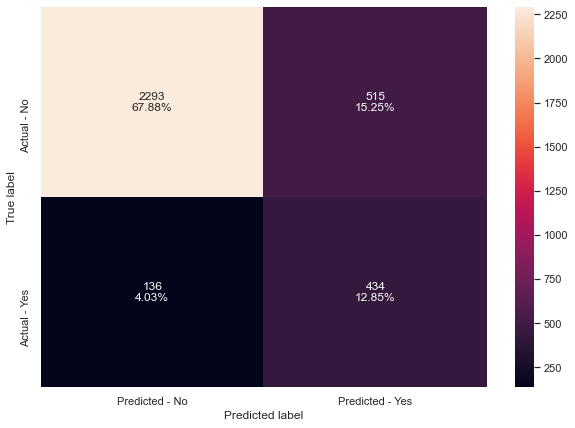

In [120]:
make_confusion_matrix(lr_sm,y_test)

<Figure size 72x144 with 0 Axes>

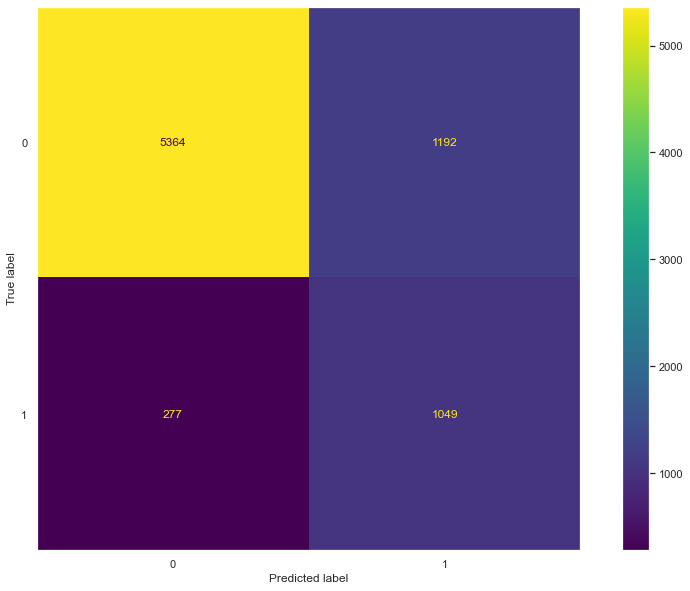

In [121]:
## Confusion matrix on the test data
plt.figure(figsize=(1,2))
plot_confusion_matrix(lr_sm,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data and testing data

AUC: 0.875


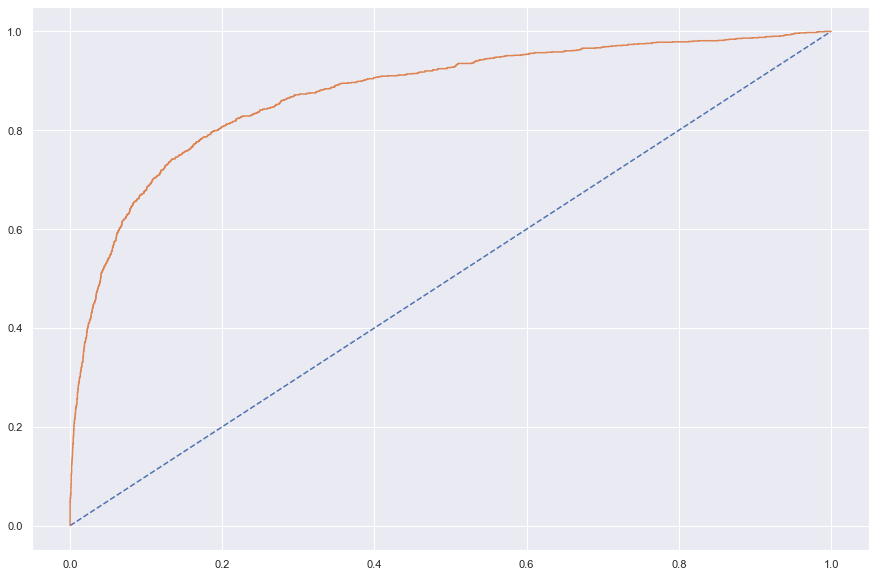

In [122]:
# predict probabilities
probs = lr_sm.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.864


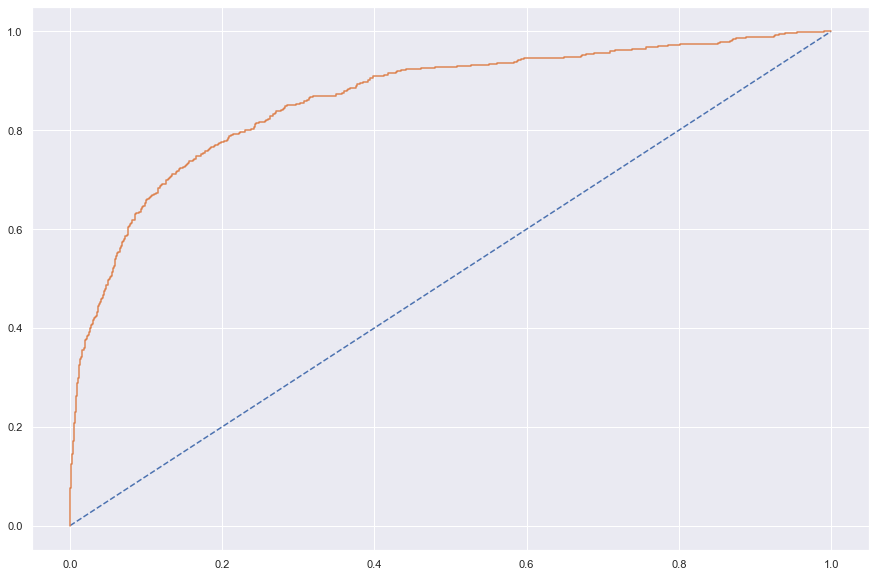

In [123]:
# predict probabilities
probs = lr_sm.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Apply Logistic Regression

In [124]:
# Fit the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

## Score for Logistic Regression

In [125]:
#Using above defined function to get accuracy, recall and precision on train and test set
lr_score=get_metrics_score(lr_model)

Accuracy on training set :  0.8930474498858157
Accuracy on test set :  0.8872113676731794
Recall on training set :  0.5090497737556561
Recall on test set :  0.4842105263157895
Precision on training set :  0.7785467128027682
Precision on test set :  0.7603305785123967
F1 on training set :  0.615595075239398
F1 on test set :  0.5916398713826366


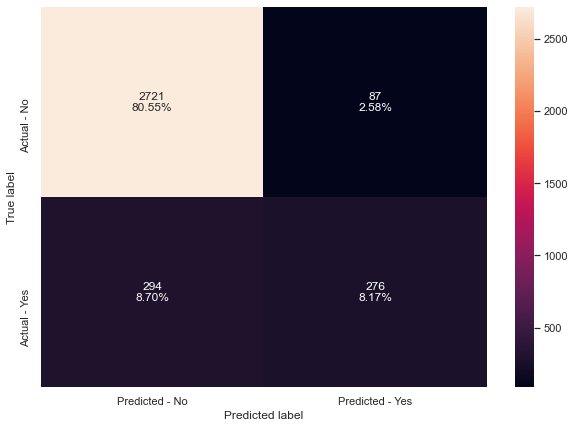

In [126]:
make_confusion_matrix(lr_model,y_test)

<Figure size 72x144 with 0 Axes>

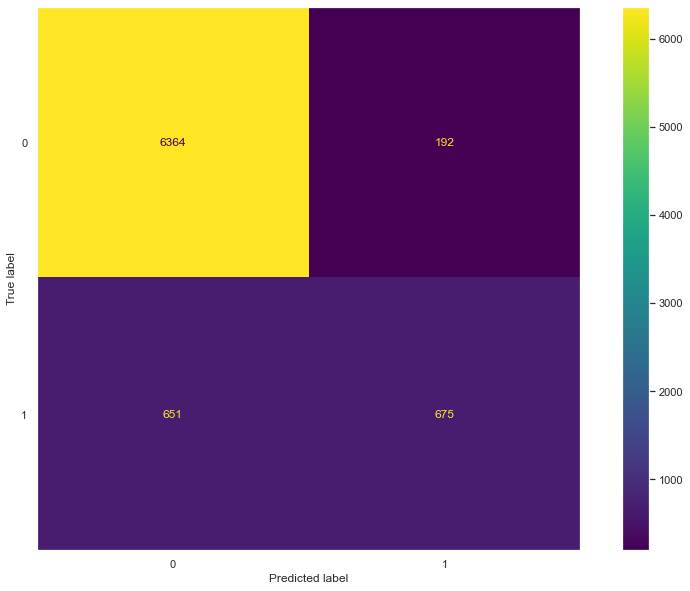

In [127]:
## Confusion matrix on the test data
plt.figure(figsize=(1,2))
plot_confusion_matrix(lr_model,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data and testing data

AUC: 0.883


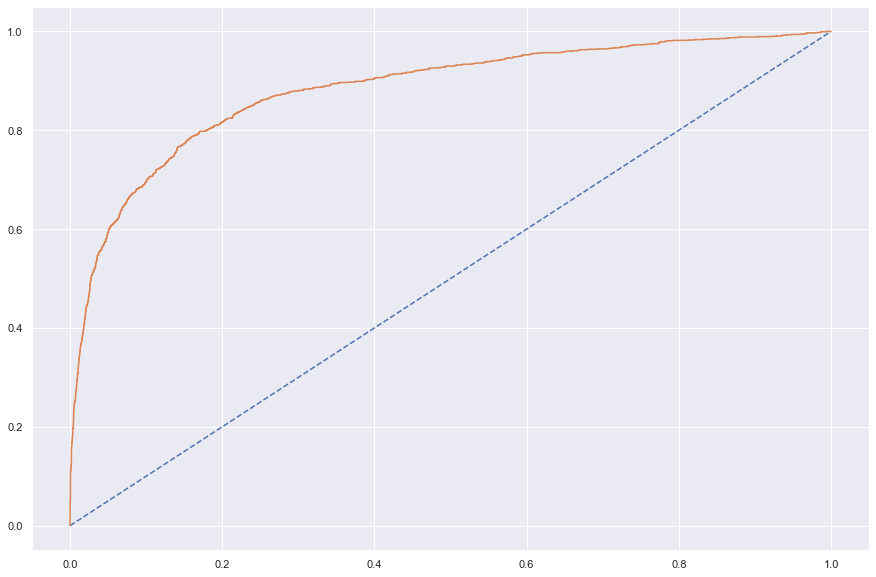

In [128]:
# predict probabilities
probs = lr_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.873


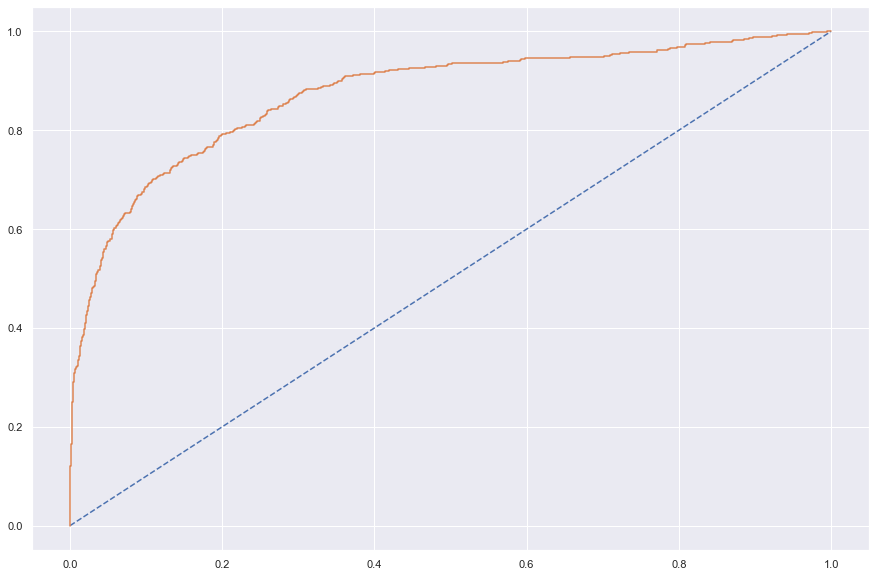

In [129]:
# predict probabilities
probs = lr_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## LDA model

In [130]:
#Build LDA Model
lda_model = LinearDiscriminantAnalysis()
lda_model=lda_model.fit(X_train,y_train)

## Scoring our Linear Discriminant Analysis

In [131]:
#Using above defined function to get accuracy, recall and precision on train and test set
lda_score=get_metrics_score(lda_model)

Accuracy on training set :  0.8859426541486932
Accuracy on test set :  0.8821788040260509
Recall on training set :  0.4698340874811463
Recall on test set :  0.45614035087719296
Precision on training set :  0.7606837606837606
Precision on test set :  0.7471264367816092
F1 on training set :  0.5808857808857808
F1 on test set :  0.5664488017429193


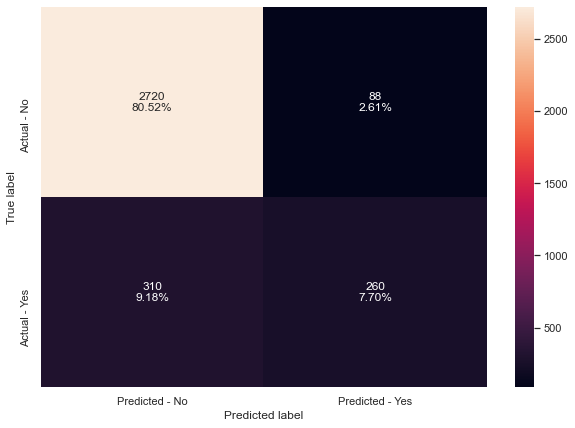

In [132]:
make_confusion_matrix(lda_model,y_test)

<Figure size 72x144 with 0 Axes>

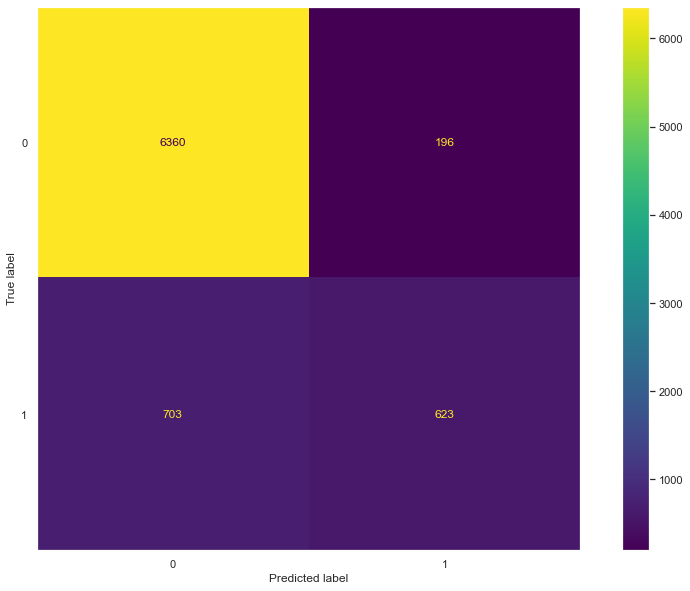

In [133]:
## Confusion matrix on the test data
plt.figure(figsize=(1,2))
plot_confusion_matrix(lda_model,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data and testing data

AUC: 0.875


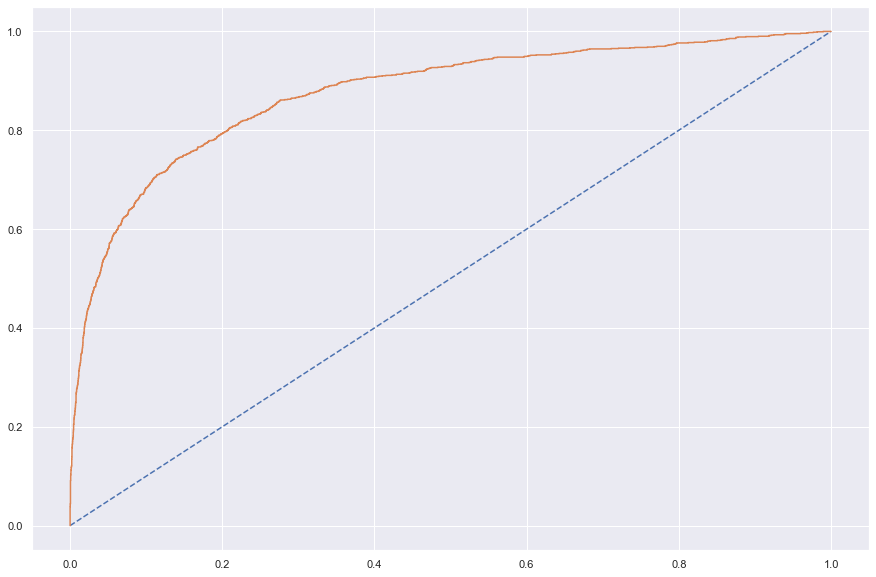

In [134]:
# predict probabilities
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.862


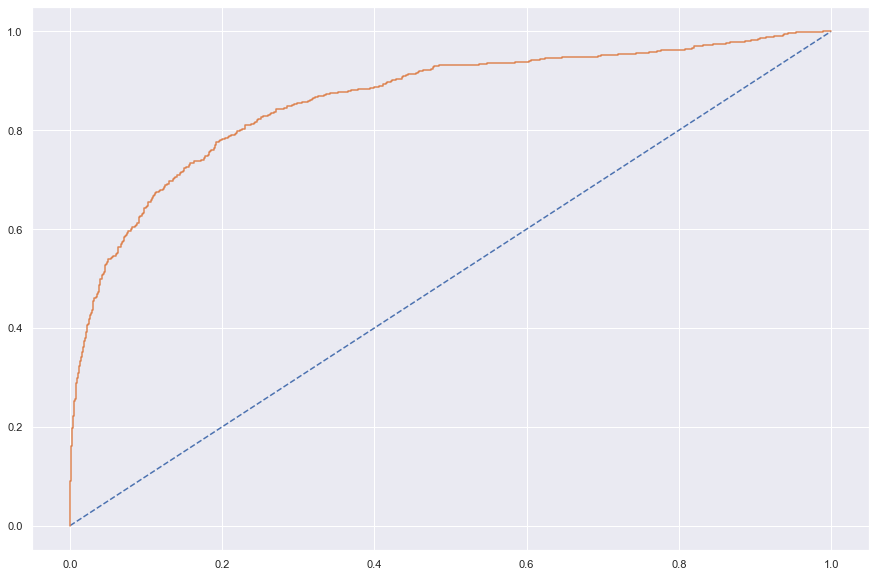

In [135]:
# predict probabilities
probs = lda_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Applying GridSearchCV for Logistic Regression

In [136]:
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [137]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [138]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [139]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [140]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='none')


In [141]:
best_model_lr = grid_search.best_estimator_

In [142]:
best_model_lr

LogisticRegression(max_iter=100000, n_jobs=2, penalty='none')

In [143]:
#Using above defined function to get accuracy, recall and precision on train and test set
best_model_lr_score=get_metrics_score(best_model_lr)

Accuracy on training set :  0.8929205785333671
Accuracy on test set :  0.8872113676731794
Recall on training set :  0.5105580693815988
Recall on test set :  0.48596491228070177
Precision on training set :  0.7763761467889908
Precision on test set :  0.7589041095890411
F1 on training set :  0.616014558689718
F1 on test set :  0.5925133689839572


### Confusion Matrix for the training data

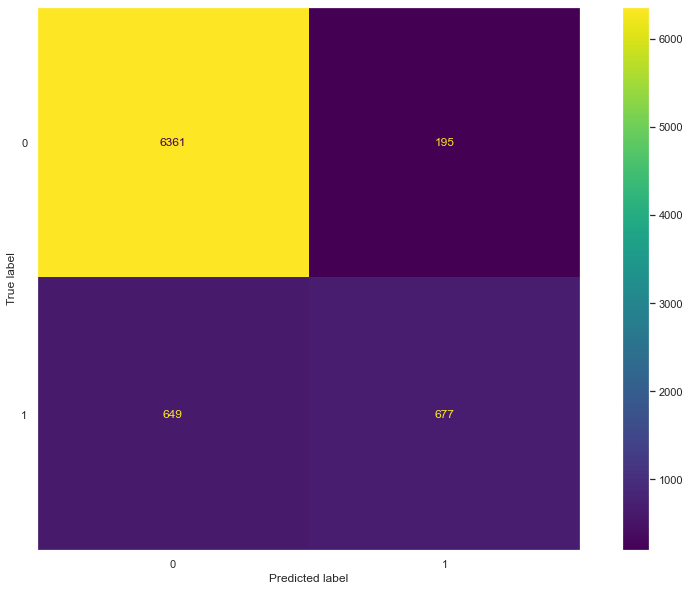

In [144]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_lr,X_train,y_train)
plt.grid(False)

### Confusion Matrix for the test data

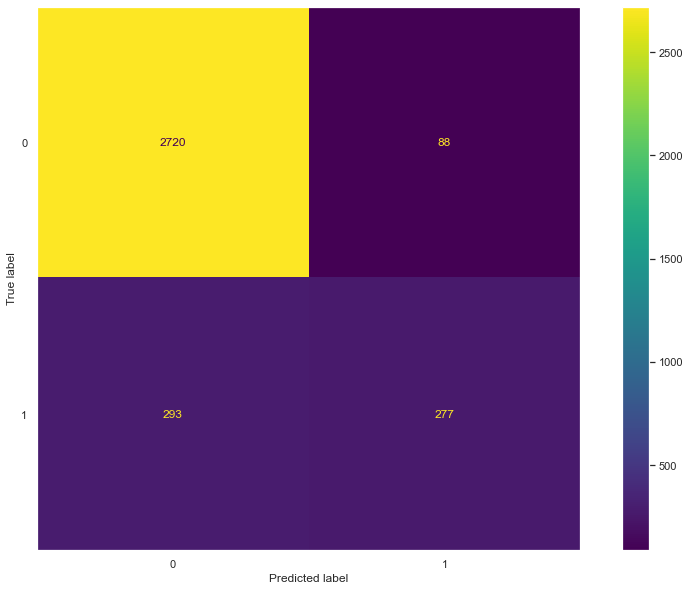

In [145]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model_lr,X_test,y_test)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.883


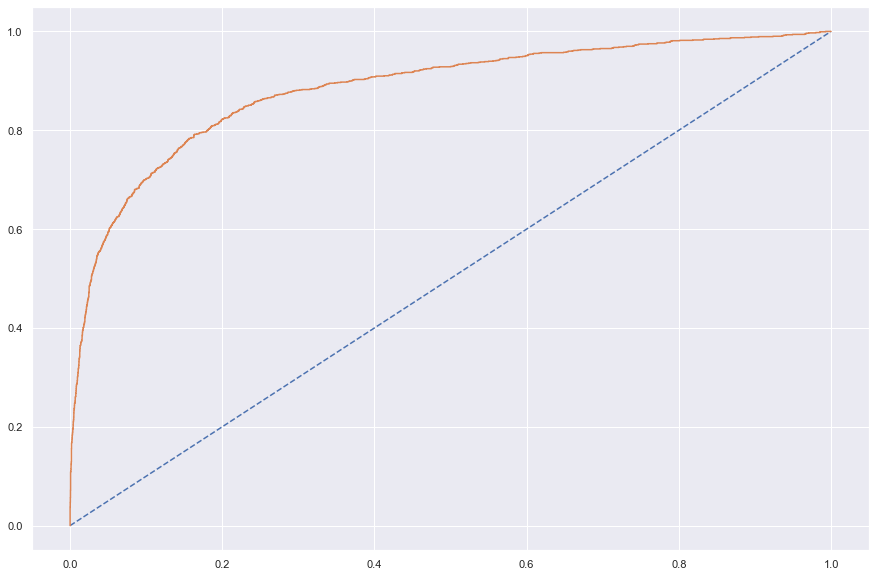

In [146]:
# predict probabilities
probs = best_model_lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.873


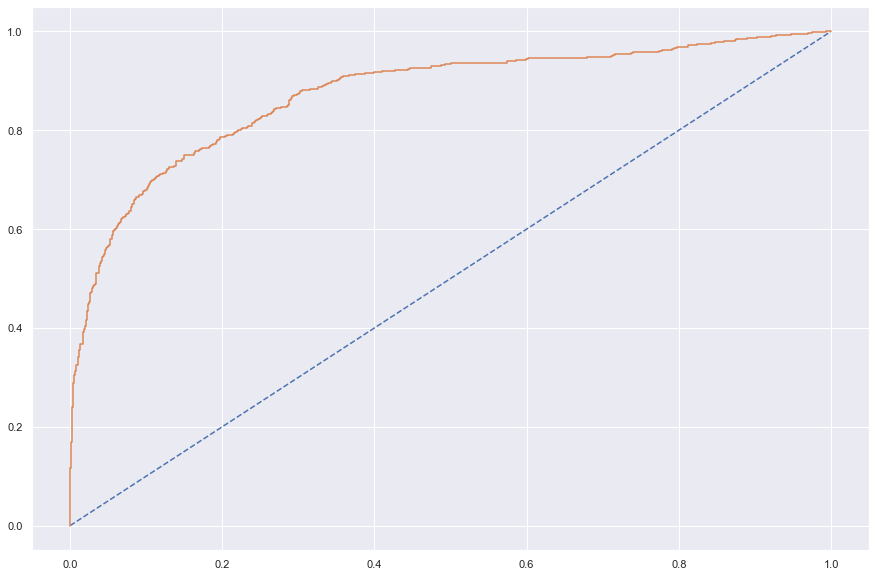

In [147]:
# predict probabilities
probs = best_model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## LDA MODEL

### Applying GridSearchCV for LDA

In [148]:
LDA = LinearDiscriminantAnalysis()

## Search grid for optimal parameters
lda_param_grid = {"solver" : ["svd"],
              "tol" : [0.0001,0.0002,0.0003]}


gsLDA = GridSearchCV(LDA, param_grid = lda_param_grid, cv=10,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsLDA.fit(X_train,y_train)

print(gsLDA.best_params_)
print(gsLDA.best_score_)
print(gsLDA.best_params_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
{'solver': 'svd', 'tol': 0.0001}
0.8844194926431325
{'solver': 'svd', 'tol': 0.0001}


In [149]:
best_lda = gsLDA.best_estimator_
best_lda

LinearDiscriminantAnalysis()

In [150]:
#Using above defined function to get accuracy, recall and precision on train and test set
best_lda_score=get_metrics_score(best_lda)

Accuracy on training set :  0.8859426541486932
Accuracy on test set :  0.8821788040260509
Recall on training set :  0.4698340874811463
Recall on test set :  0.45614035087719296
Precision on training set :  0.7606837606837606
Precision on test set :  0.7471264367816092
F1 on training set :  0.5808857808857808
F1 on test set :  0.5664488017429193


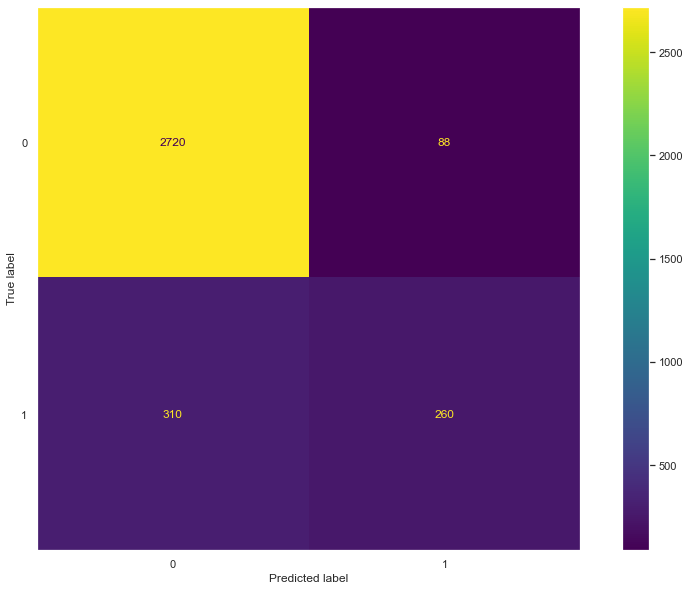

In [151]:
## Confusion matrix on the test data

plot_confusion_matrix(best_lda,X_test,y_test)
plt.grid(False)

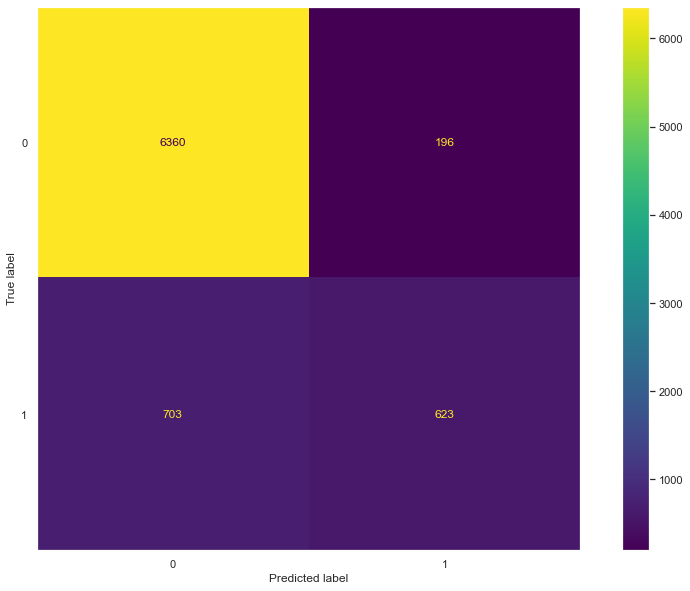

In [152]:
## Confusion matrix on the test data

plot_confusion_matrix(best_lda,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.875


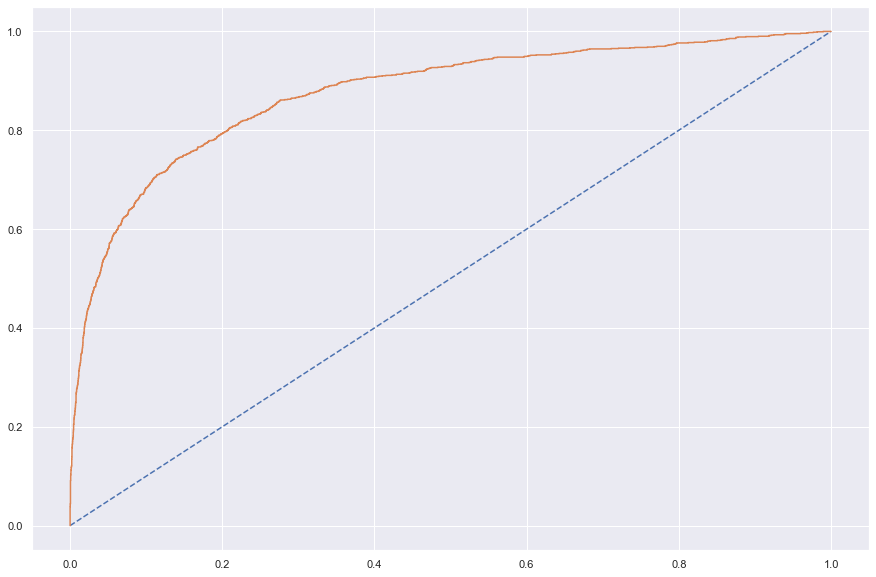

In [153]:
# predict probabilities
probs = best_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.862


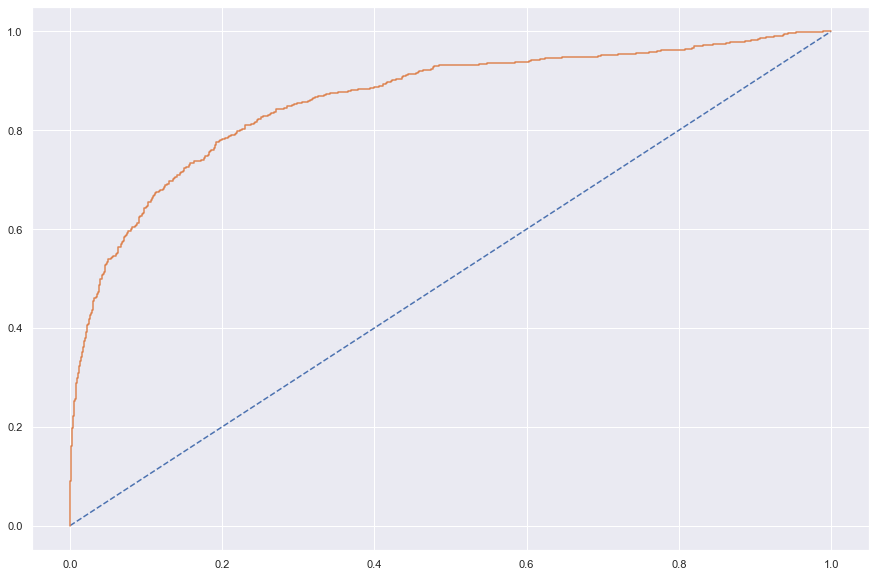

In [154]:
# predict probabilities
probs = best_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [155]:
data_features = ['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Churn_1', 'Payment_2', 'Payment_3', 'Payment_4',
       'Payment_5', 'Gender_1', 'account_segment_2', 'account_segment_3',
       'account_segment_4', 'account_segment_5', 'Marital_Status_2',
       'Marital_Status_3', 'Login_device_2']

In [156]:
coef_dict = {}
for coef, feat in zip(best_lda.coef_[0,:],data_features):
    coef_dict[feat] = coef

In [157]:
coef_dict

{'Tenure': -0.12460958788987196,
 'City_Tier': 0.3474620264170837,
 'CC_Contacted_LY': 0.24385975318670486,
 'Service_Score': -0.07398000129431243,
 'Account_user_count': 0.32830155755099827,
 'CC_Agent_Score': 0.28026967557471594,
 'rev_per_month': 0.40036599994455696,
 'Complain_ly': 1.9931864237070127,
 'rev_growth_yoy': -0.018911474638469674,
 'coupon_used_for_payment': 0.08213185731521248,
 'Day_Since_CC_connect': -0.2476548627512002,
 'cashback': -0.2985642547017972,
 'Churn_1': 0.9790306779504511,
 'Payment_2': 0.6811009546525216,
 'Payment_3': -0.0985448676680153,
 'Payment_4': 0.11841062619318715,
 'Payment_5': -0.24917406397825007,
 'Gender_1': -0.6886432492863055,
 'account_segment_2': -1.127701127419583,
 'account_segment_3': -2.1660056362292965,
 'account_segment_4': -0.9330659098042144,
 'account_segment_5': 0.9408759010606401,
 'Marital_Status_2': -0.21280577328088415,
 'Marital_Status_3': -0.44039296343514106}

### AdaBoost Classifier

In [158]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [159]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [160]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8950773915249937
Accuracy on test set :  0.896388395500296
Recall on training set :  0.5897435897435898
Recall on test set :  0.5842105263157895
Precision on training set :  0.7342723004694836
Precision on test set :  0.7466367713004485
F1 on training set :  0.6541196152237558
F1 on test set :  0.6555118110236221


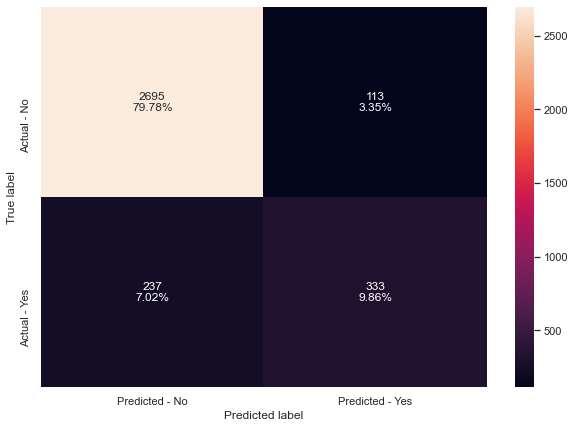

In [161]:
make_confusion_matrix(abc,y_test)

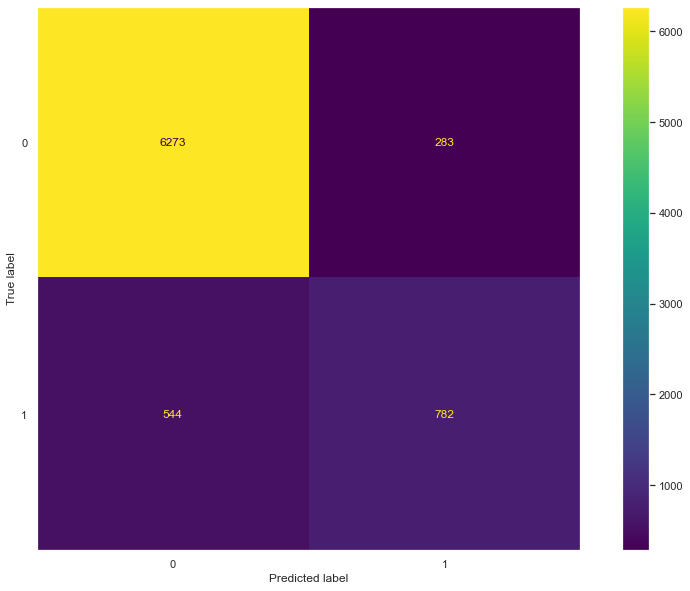

In [162]:
## Confusion matrix on the training data
plot_confusion_matrix(abc,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.917


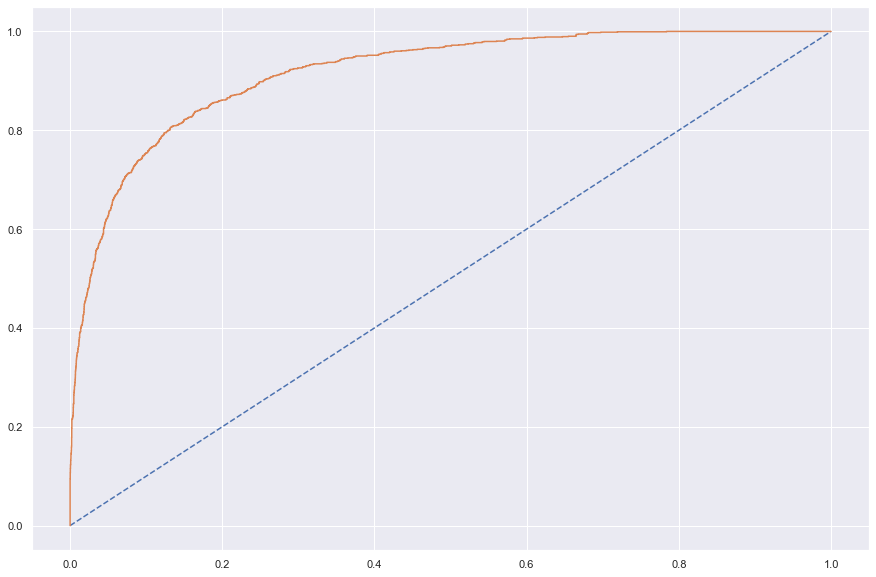

In [163]:
# predict probabilities
probs = abc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.908


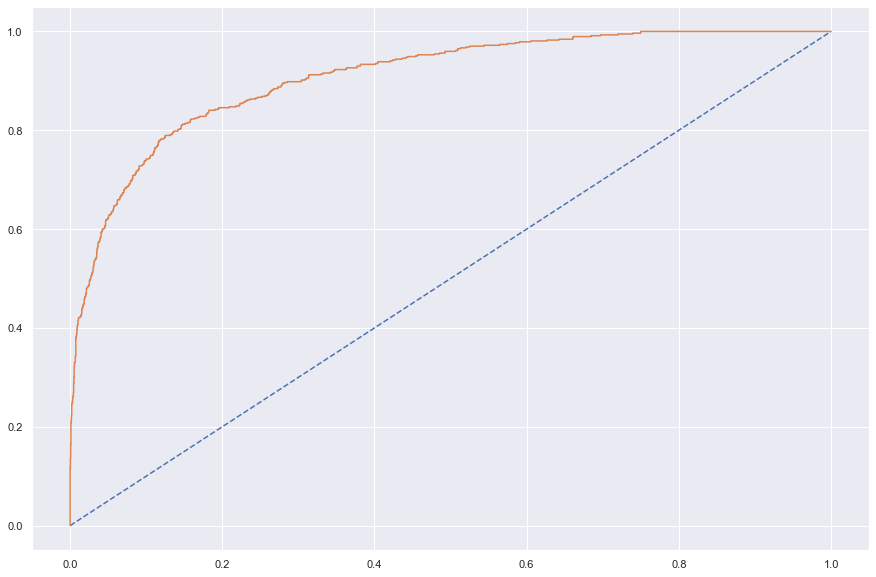

In [164]:
# predict probabilities
probs = abc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

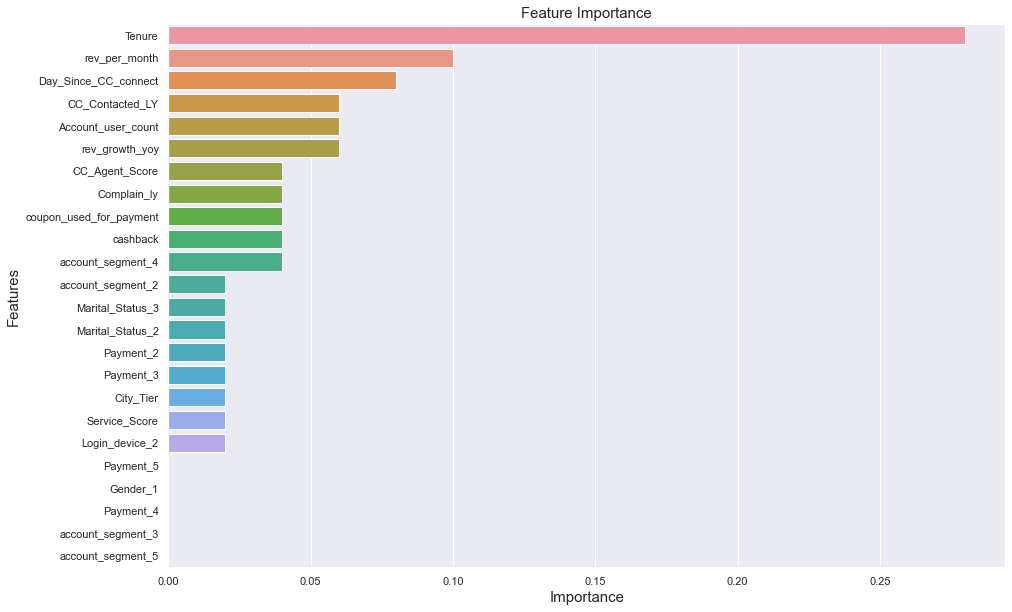

In [165]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': abc.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

### Gradient Boosting Classifier

In [166]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [167]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.9222278609489977
Accuracy on test set :  0.9141503848431024
Recall on training set :  0.6500754147812972
Recall on test set :  0.6140350877192983
Precision on training set :  0.8526211671612265
Precision on test set :  0.8333333333333334
F1 on training set :  0.7376979032948224
F1 on test set :  0.7070707070707071


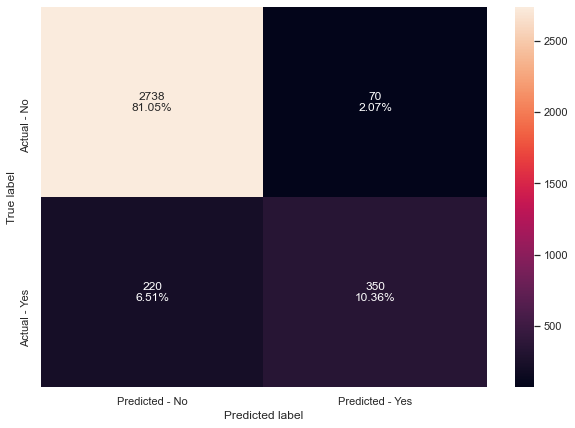

In [168]:
make_confusion_matrix(gbc,y_test)

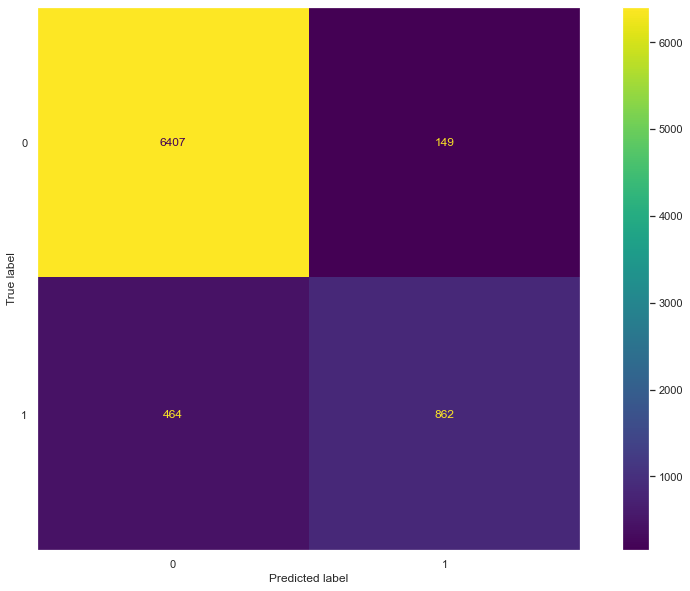

In [169]:
## Confusion matrix on the training data
plot_confusion_matrix(gbc,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.950


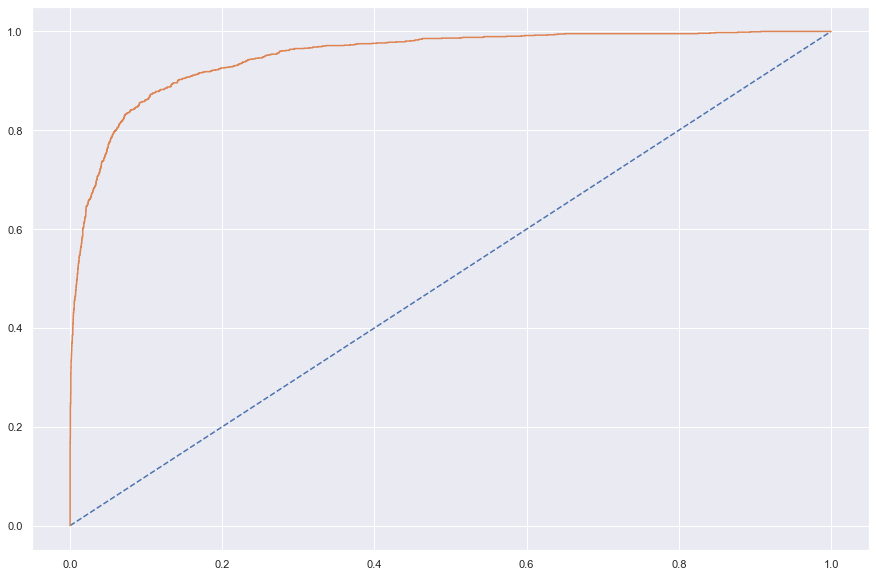

In [170]:
# predict probabilities
probs = gbc.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.930


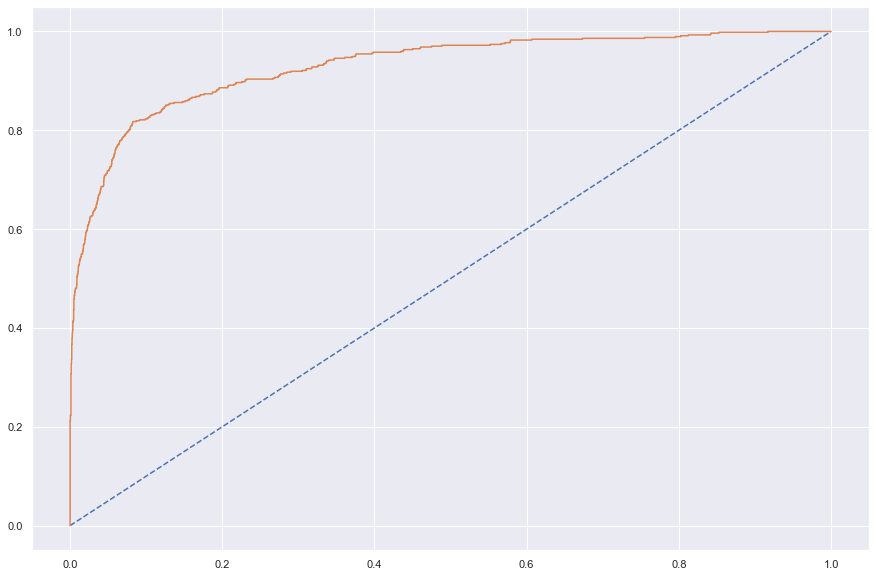

In [171]:
# predict probabilities
probs = gbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

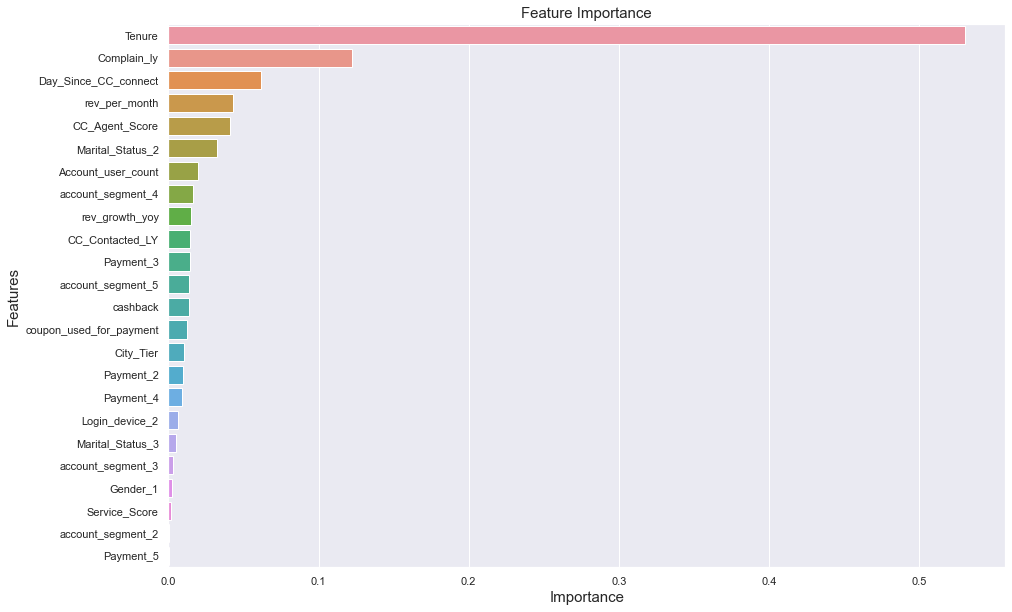

In [172]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': gbc.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

### XGBoost Classifier

In [173]:
from xgboost import XGBClassifier

In [174]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [175]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9994925145902055
Accuracy on test set :  0.9659561870929544
Recall on training set :  0.9969834087481146
Recall on test set :  0.8298245614035088
Precision on training set :  1.0
Precision on test set :  0.9633401221995926
F1 on training set :  0.9984894259818731
F1 on test set :  0.8916116870876531


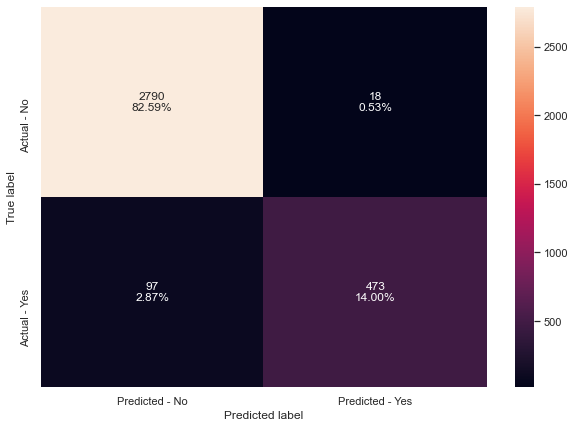

In [176]:
make_confusion_matrix(xgb,y_test)

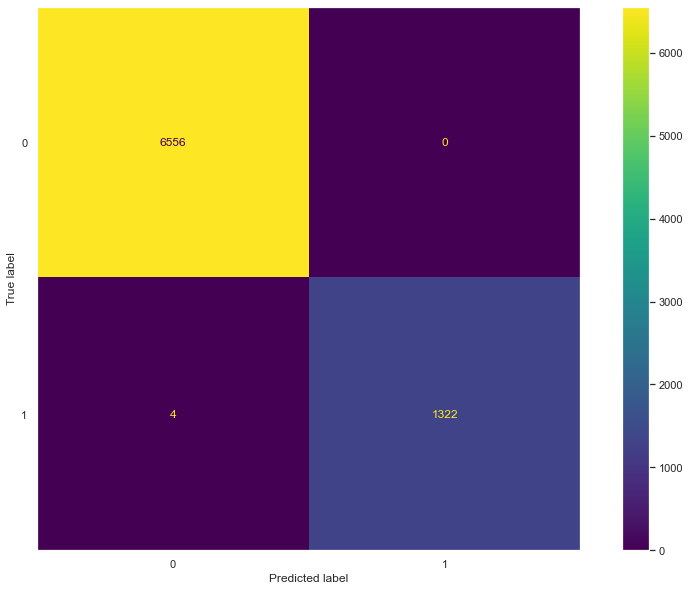

In [177]:
## Confusion matrix on the training data
plot_confusion_matrix(xgb,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


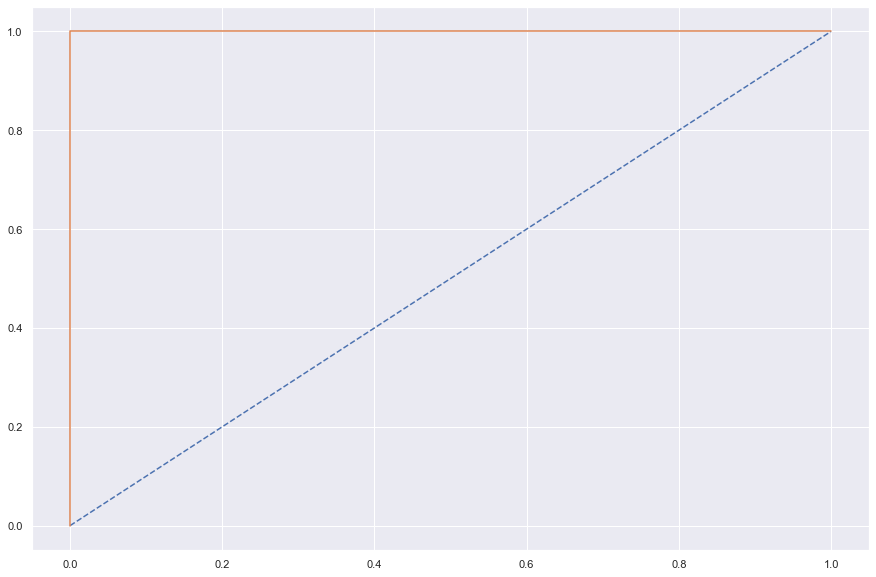

In [178]:
# predict probabilities
probs = xgb.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.992


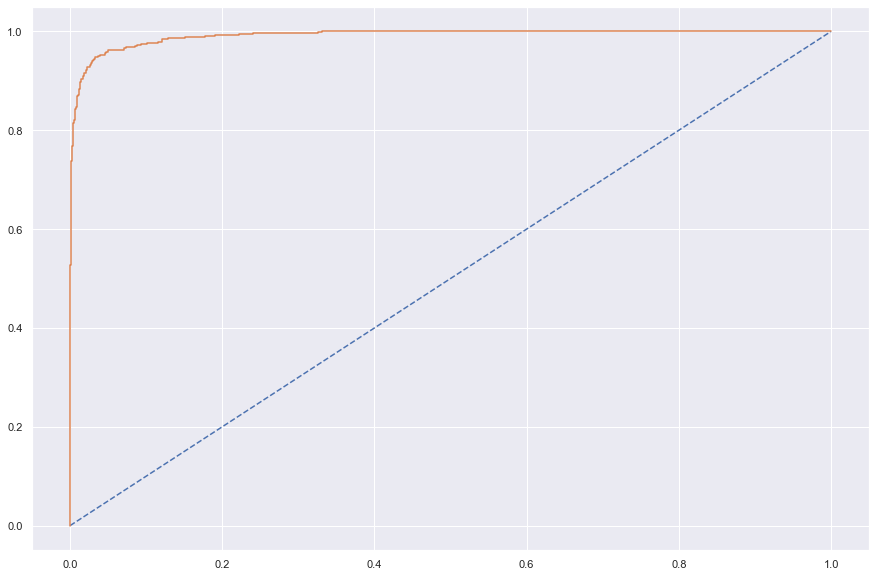

In [179]:
# predict probabilities
probs = xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

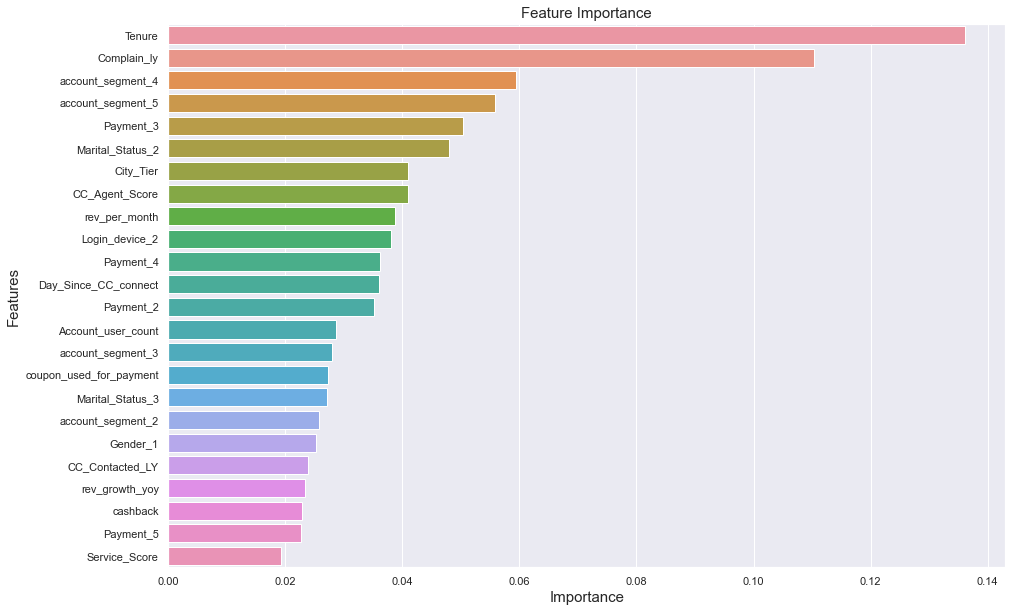

In [181]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

## Hyperparameter Tuning

### XGBoost Classifier

In [182]:
xgb_tuned = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb_tuned.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

In [183]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9745411486086442
Recall on training set :  1.0
Recall on test set :  0.8824561403508772
Precision on training set :  1.0
Precision on test set :  0.9636015325670498
F1 on training set :  1.0
F1 on test set :  0.9212454212454213


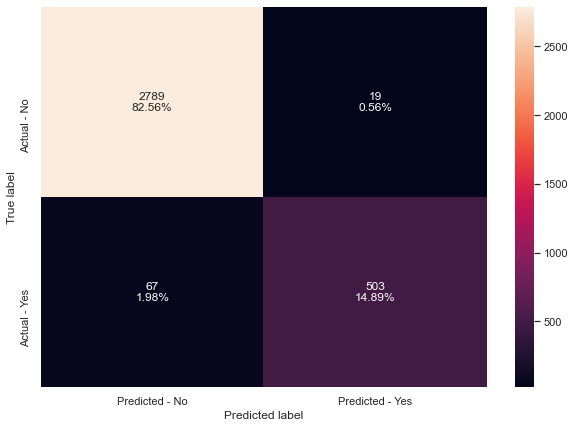

In [184]:
make_confusion_matrix(xgb_tuned,y_test)

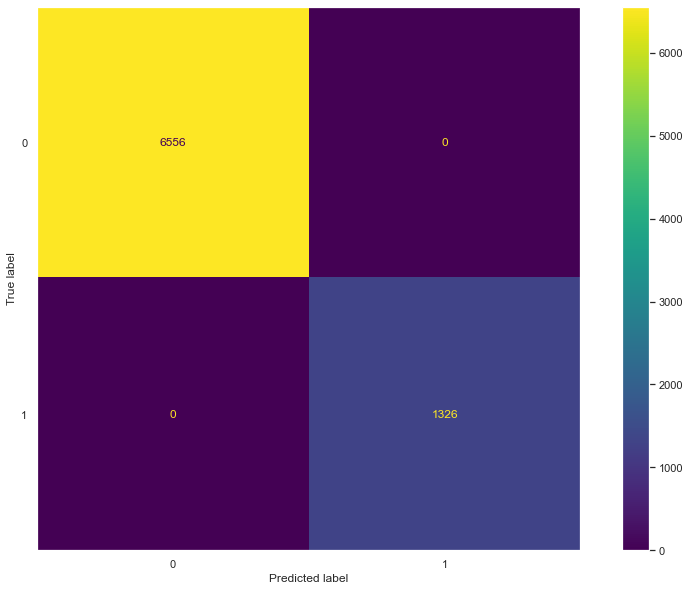

In [185]:
## Confusion matrix on the training data
plot_confusion_matrix(xgb_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


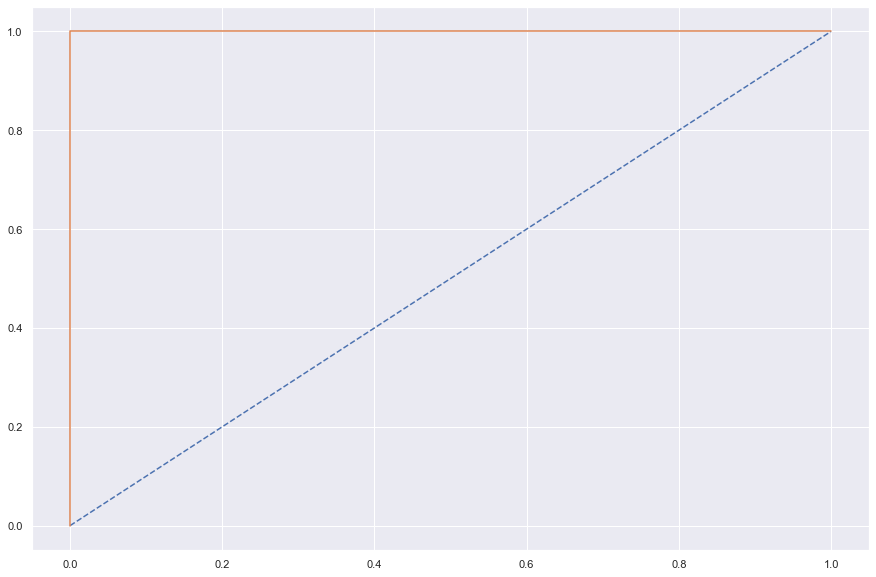

In [186]:
# predict probabilities
probs = xgb_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.994


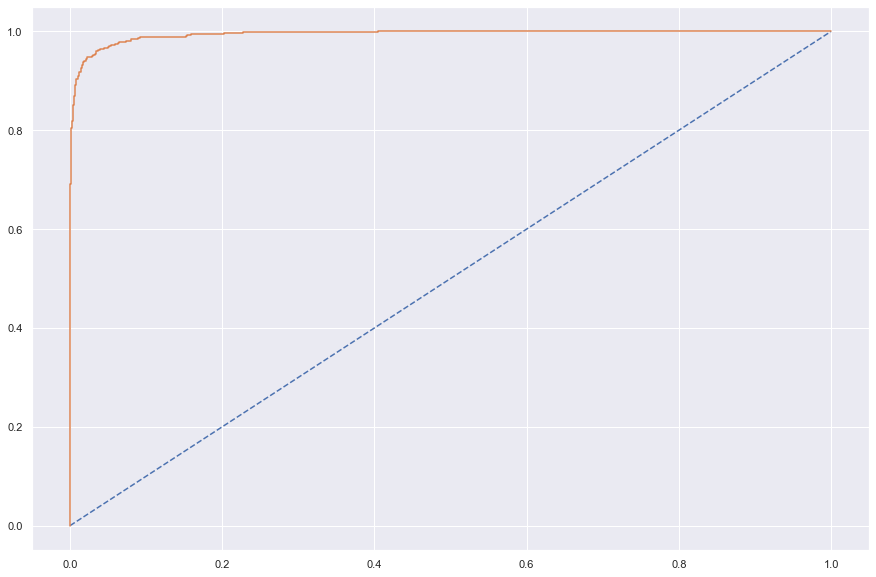

In [187]:
# predict probabilities
probs = xgb_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Hyperparameter Tuning

### AdaBoost Classifier

- An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
- Some important hyperparamters are:
    - base_estimator: The base estimator from which the boosted ensemble is built. By default the base estimator is a decision tree with max_depth=1
    - n_estimators: The maximum number of estimators at which boosting is terminated. Default value is 50.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

In [188]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=10),DecisionTreeClassifier(max_depth=20),DecisionTreeClassifier(max_depth=30)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [189]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9769094138543517
Recall on training set :  1.0
Recall on test set :  0.875438596491228
Precision on training set :  1.0
Precision on test set :  0.9861660079051383
F1 on training set :  1.0
F1 on test set :  0.9275092936802973


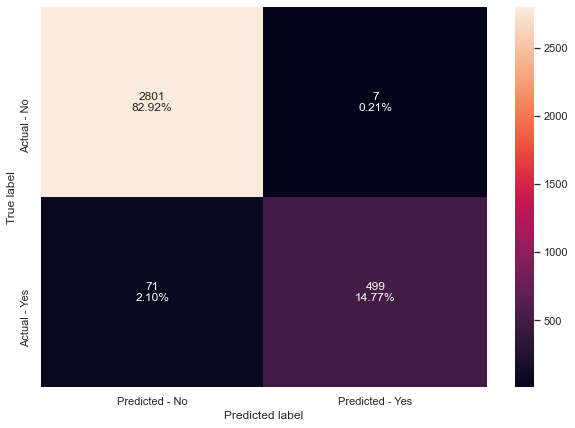

In [190]:
make_confusion_matrix(abc_tuned,y_test)

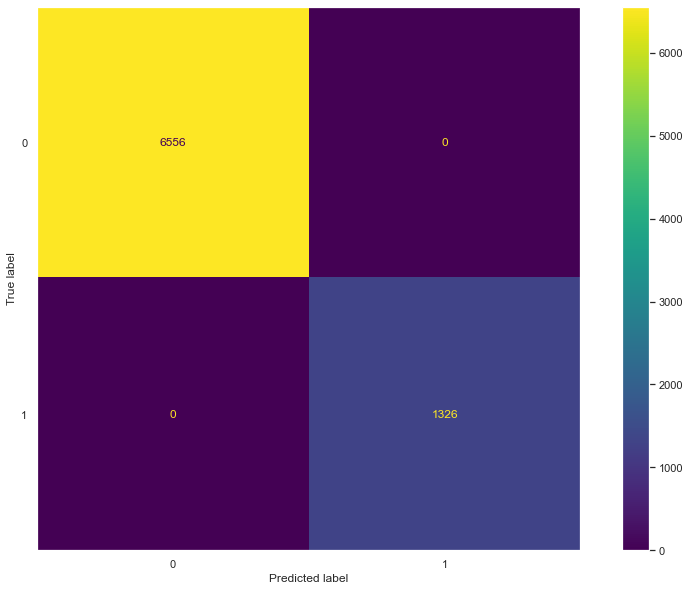

In [191]:
## Confusion matrix on the training data
plot_confusion_matrix(abc_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


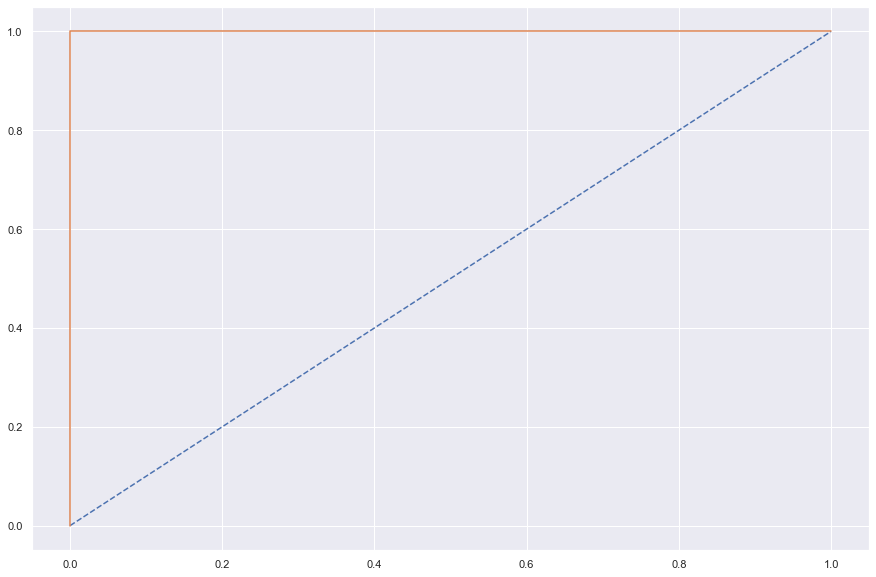

In [192]:
# predict probabilities
probs = abc_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.993


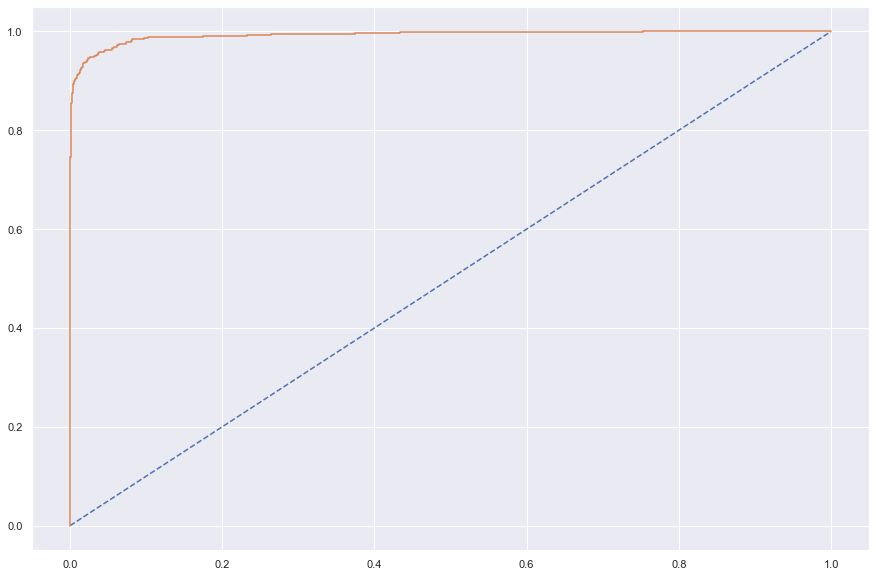

In [193]:
# predict probabilities
probs = abc_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Gradient Boosting Classifier

- Most of the hyperparameters available are same as random forest classifier.
- init: An estimator object that is used to compute the initial predictions. If ‘zero’, the initial raw predictions are set to zero. By default, a DummyEstimator predicting the classes priors is used.
- There is no class_weights parameter in gradient boosting.

**Let's try using AdaBoost classifier as the estimator for initial predictions**

In [194]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [195]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.9186754630804365
Accuracy on test set :  0.9120781527531083
Recall on training set :  0.6319758672699849
Recall on test set :  0.5947368421052631
Precision on training set :  0.8456104944500504
Precision on test set :  0.837037037037037
F1 on training set :  0.7233491583944756
F1 on test set :  0.6953846153846154


**As compared to the model with default parameters:**

- Test accuracy and test recall have increased slightly.
- As we are getting better results, we will use init = AdaBoostClassifier() to tune the gradient boosting model.

In [196]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,max_features=11, min_samples_leaf=6,min_samples_split=15, n_estimators=201,random_state=0)
# Grid of parameters to choose from
## add from article
param_grid = {
 'loss': ['deviance'],
 'learning_rate': [0.1, 0.5, 1],
 'n_estimators': [201],
 'criterion': ['mse'],
 'min_samples_split': [15],
 'min_samples_leaf': [6],
 'max_depth':[9],
 'max_features':[11]
}
#
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned,param_grid,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=11, min_samples_leaf=6,
                           min_samples_split=15, n_estimators=201,
                           random_state=0)

In [197]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  1.0
Accuracy on test set :  0.9840142095914742
Recall on training set :  1.0
Recall on test set :  0.9157894736842105
Precision on training set :  1.0
Precision on test set :  0.9886363636363636
F1 on training set :  1.0
F1 on test set :  0.9508196721311476


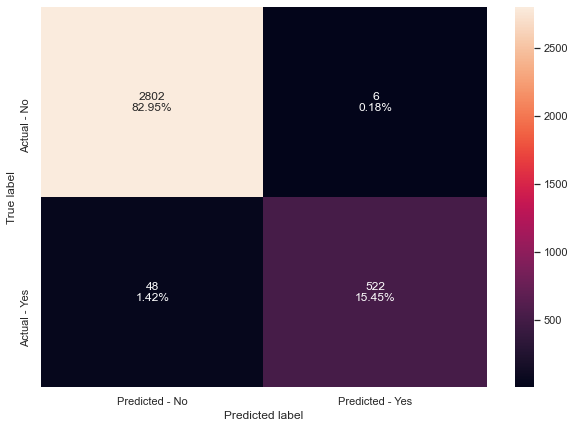

In [198]:
make_confusion_matrix(gbc_tuned,y_test)

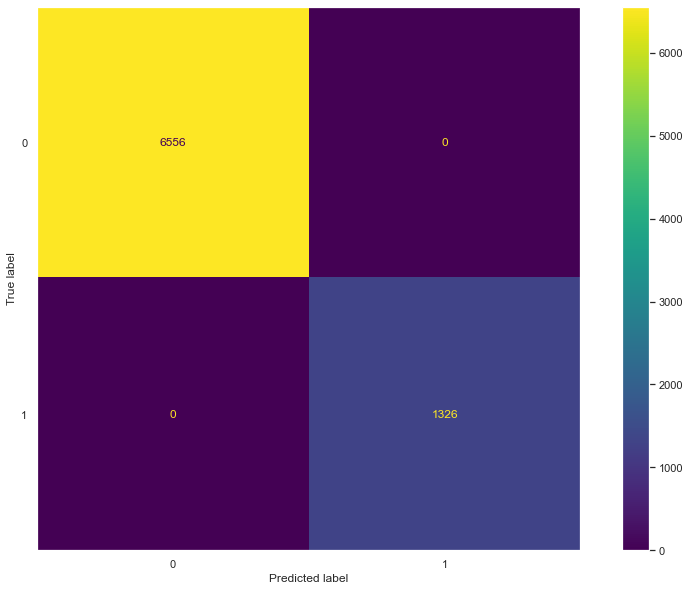

In [199]:
## Confusion matrix on the training data
plot_confusion_matrix(gbc_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


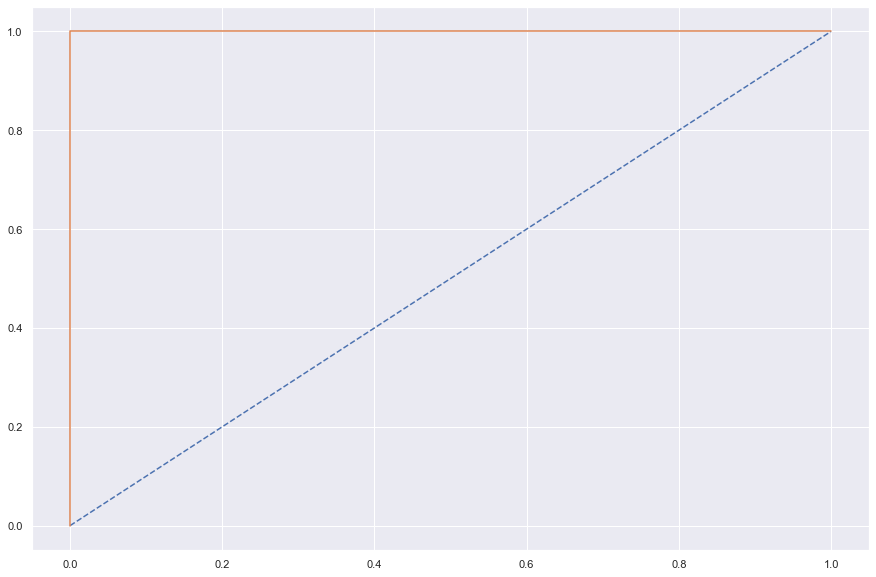

In [200]:
# predict probabilities
probs = gbc_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.997


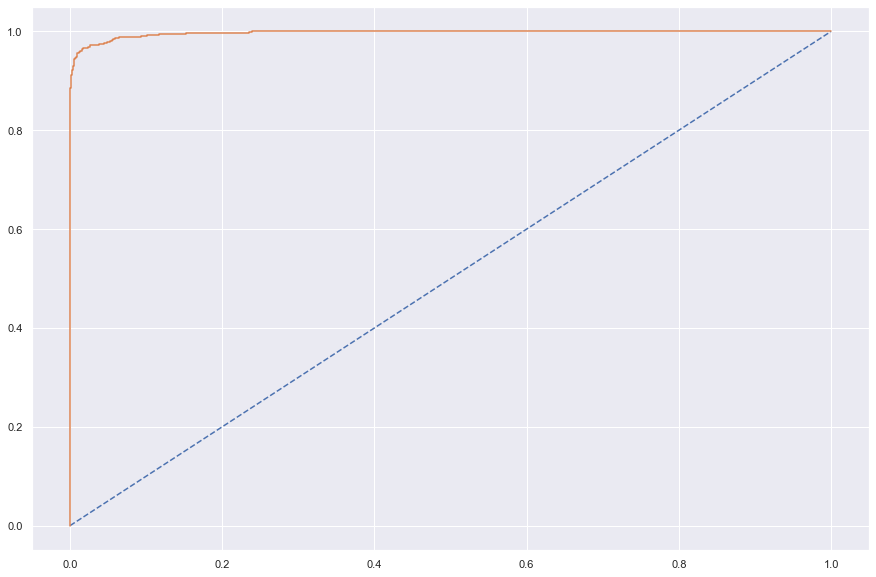

In [201]:
# predict probabilities
probs = gbc_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

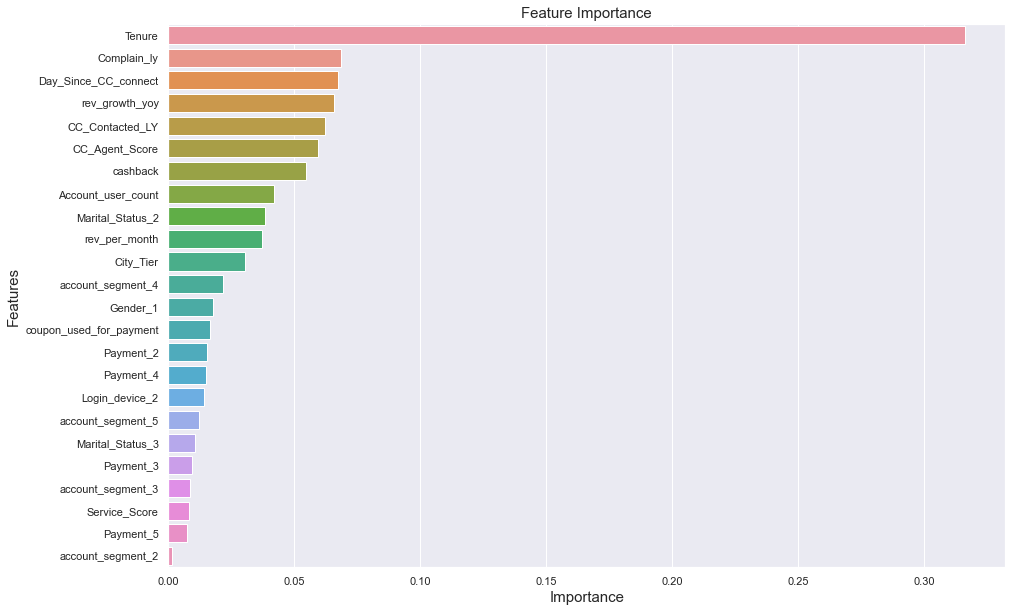

In [202]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': gbc_tuned.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

## Random Forest Model

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
rf =  RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [205]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_score=get_metrics_score(rf)

Accuracy on training set :  1.0
Accuracy on test set :  0.9748371817643576
Recall on training set :  1.0
Recall on test set :  0.8614035087719298
Precision on training set :  1.0
Precision on test set :  0.9879275653923542
F1 on training set :  1.0
F1 on test set :  0.9203373945641987


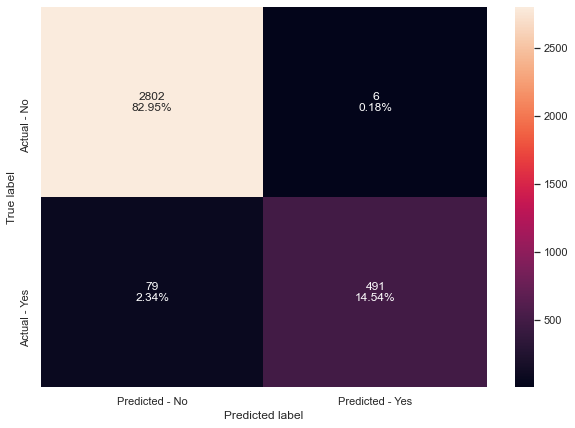

In [206]:
make_confusion_matrix(rf,y_test)

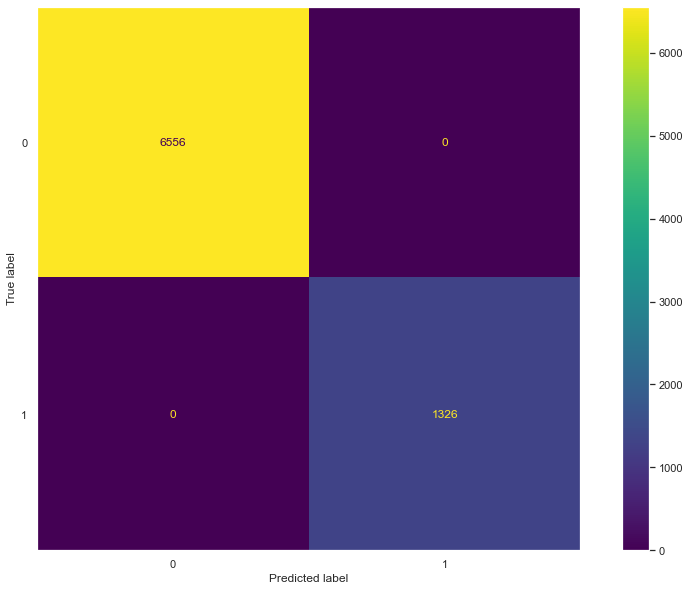

In [207]:
## Confusion matrix on the training data
plot_confusion_matrix(rf,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 1.000


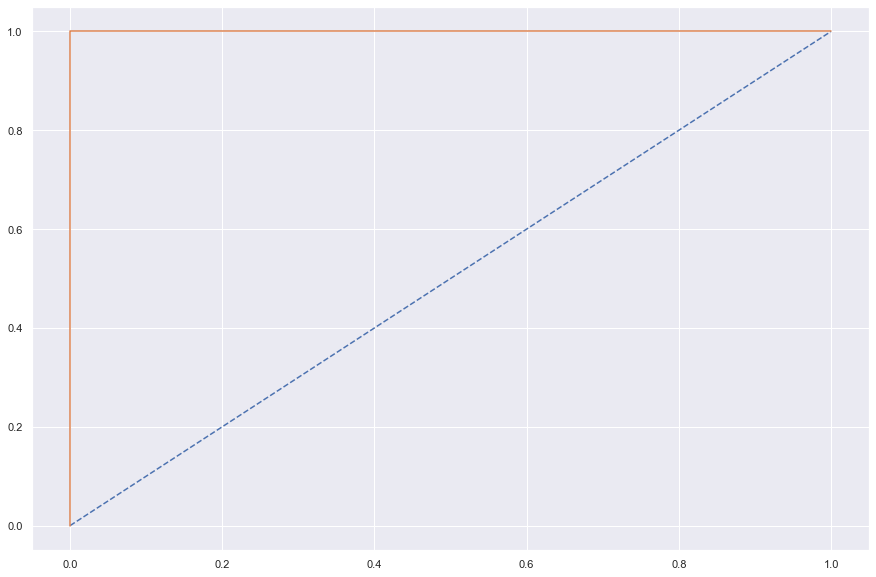

In [208]:
# predict probabilities
probs = rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.994


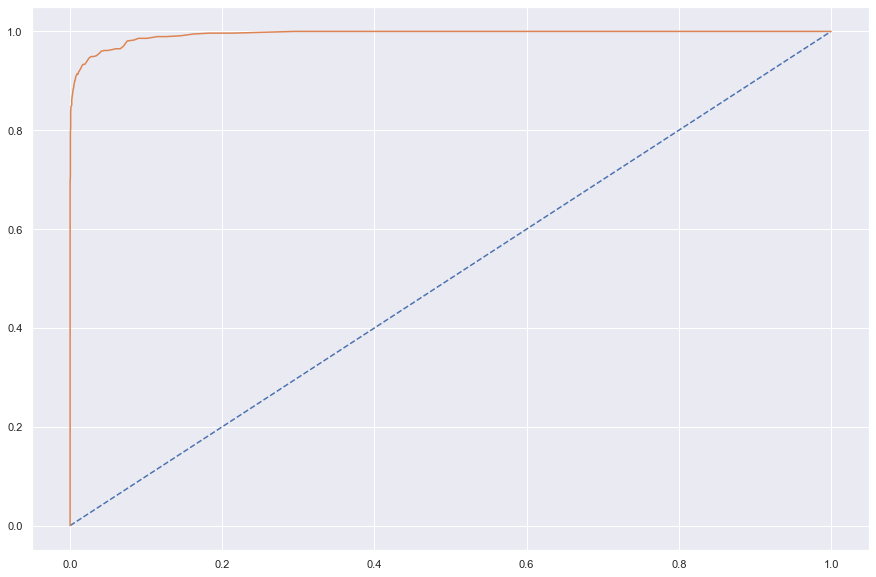

In [209]:
# predict probabilities
probs = rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

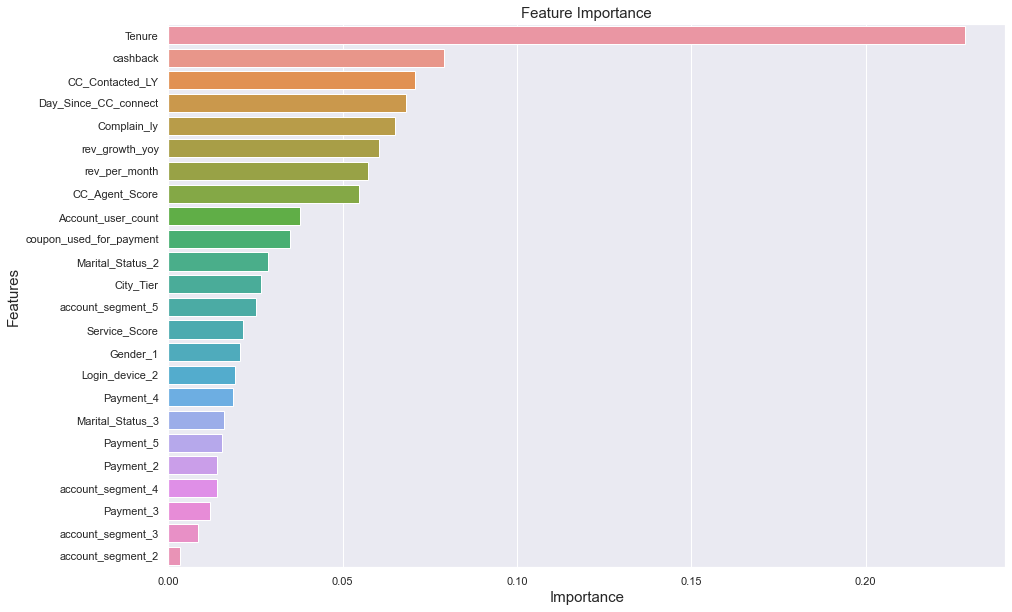

In [210]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

### Random Forest - Tuned

In [211]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 5,
                         n_jobs = -1)
    gscv.fit(X_train , y_train)
    result = gscv.best_params_
    return result

In [212]:
rf_gs = RandomForestClassifier(random_state = 1)
rf_params = {
  'n_estimators':[200,300],
 'criterion': ( 'gini','entropy'),
 'max_depth': [2, 3 ,4],
 'min_samples_split': [2, 9],
 'max_features': ("sqrt", "log2") }
r3 = gridsearch(rf_gs , rf_params)
print(f'Best parameters for Random Forest :{r3}')

Best parameters for Random Forest :{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 9, 'n_estimators': 300}


In [213]:
rf_tuned  = RandomForestClassifier(max_depth=9, random_state=1 , criterion= 'gini' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 300)

In [214]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=300,
                       random_state=1)

In [215]:
#Using above defined function to get accuracy, recall and precision on train and test set
rf_tuned_score=get_metrics_score(rf_tuned)

Accuracy on training set :  0.9549606698807409
Accuracy on test set :  0.9354647720544701
Recall on training set :  0.7435897435897436
Recall on test set :  0.6403508771929824
Precision on training set :  0.985014985014985
Precision on test set :  0.9656084656084656
F1 on training set :  0.8474430597335625
F1 on test set :  0.770042194092827


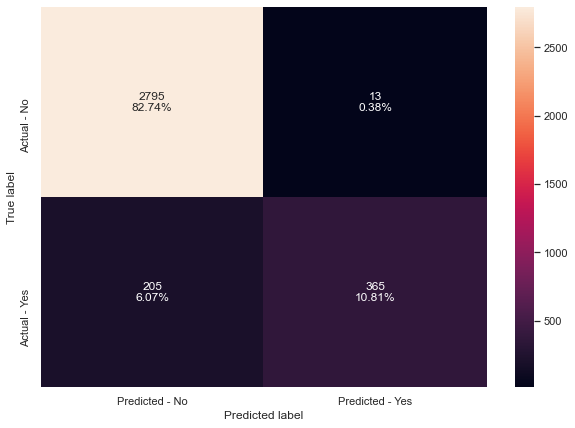

In [216]:
make_confusion_matrix(rf_tuned,y_test)

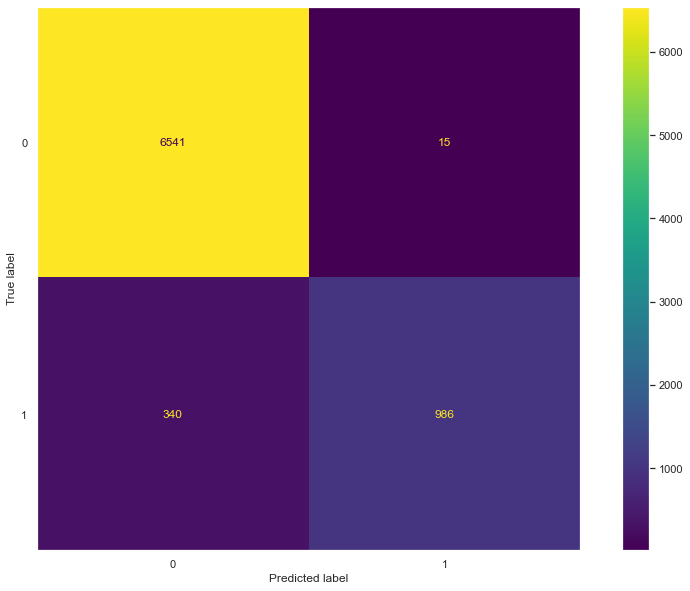

In [218]:
## Confusion matrix on the training data
plot_confusion_matrix(rf_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.989


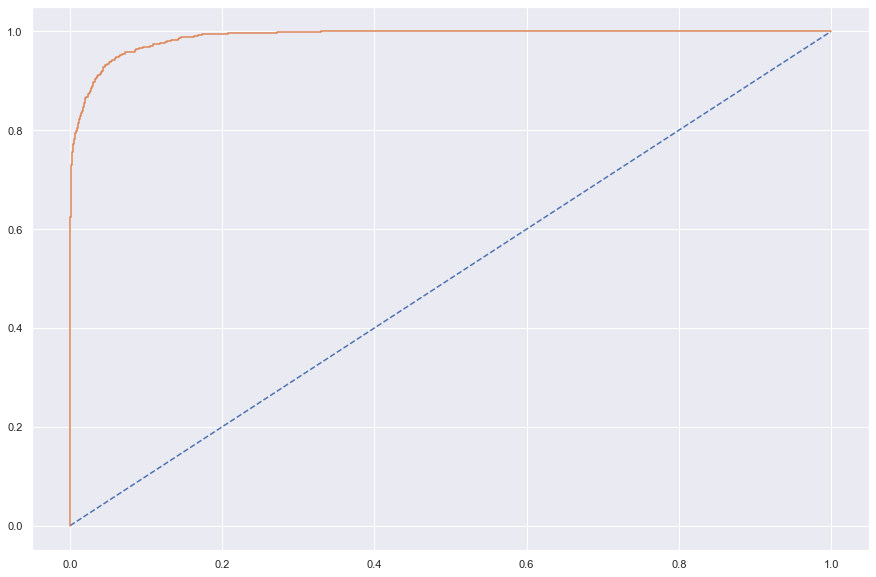

In [219]:
# predict probabilities
probs = rf_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.969


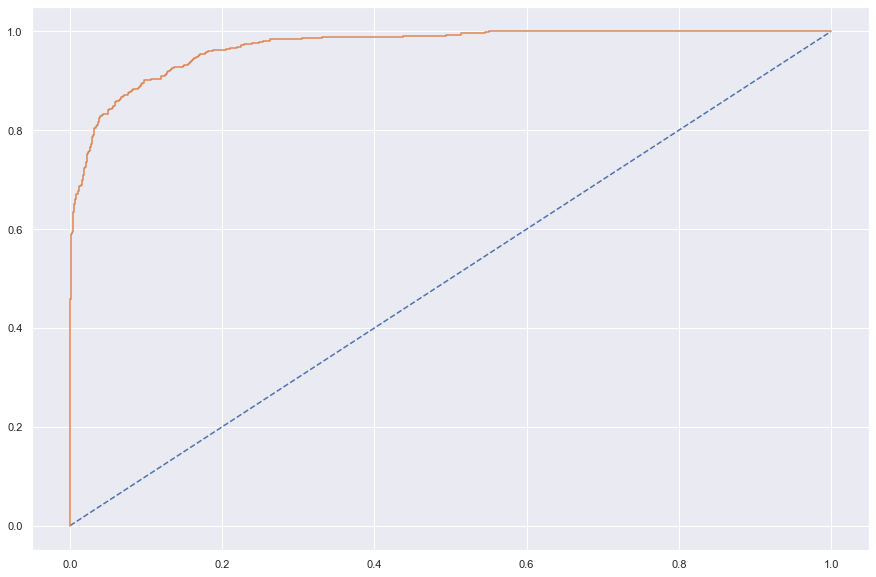

In [220]:
# predict probabilities
probs = rf_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## ANN Model

In [221]:
from sklearn.neural_network import MLPClassifier

In [270]:
ann = MLPClassifier()

In [271]:
# Fit the model on the training data
ann.fit(X_train, y_train)

MLPClassifier()

In [272]:
#Using above defined function to get accuracy, recall and precision on train and test set
ann_score=get_metrics_score(ann)

Accuracy on training set :  0.9760213143872114
Accuracy on test set :  0.9532267613972765
Recall on training set :  0.8883861236802413
Recall on test set :  0.7842105263157895
Precision on training set :  0.9663658736669402
Precision on test set :  0.9273858921161826
F1 on training set :  0.9257367387033398
F1 on test set :  0.849809885931559


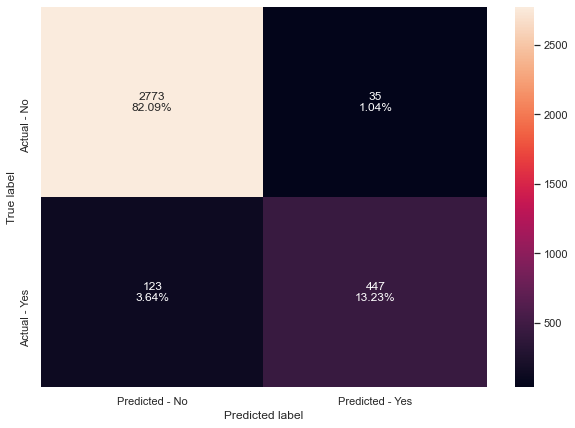

In [273]:
make_confusion_matrix(ann,y_test)

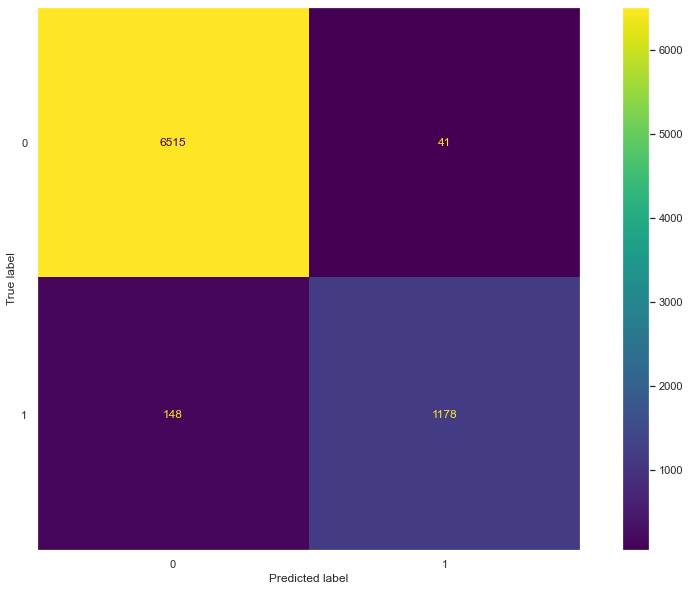

In [274]:
## Confusion matrix on the training data
plot_confusion_matrix(ann,X_train,y_train)
plt.grid(False)

AUC: 0.994


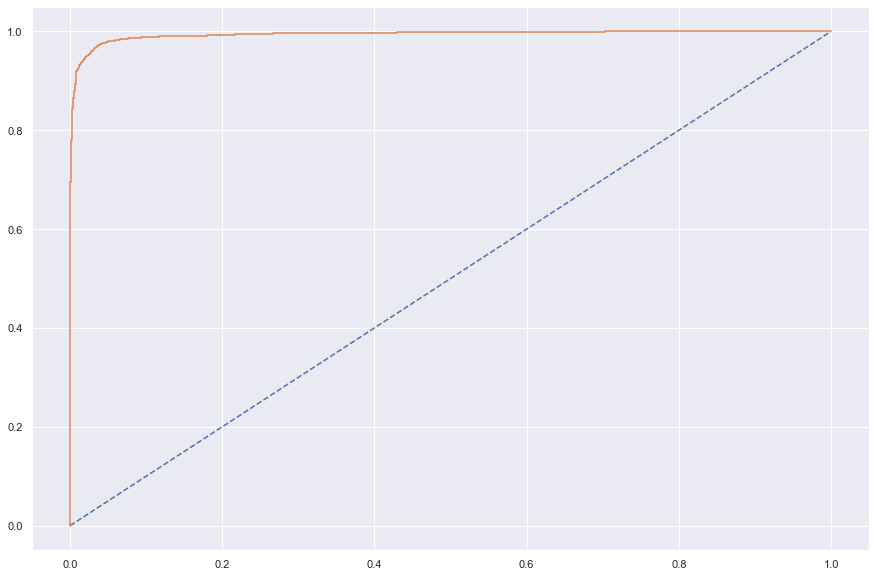

In [275]:
# predict probabilities
probs = ann.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.977


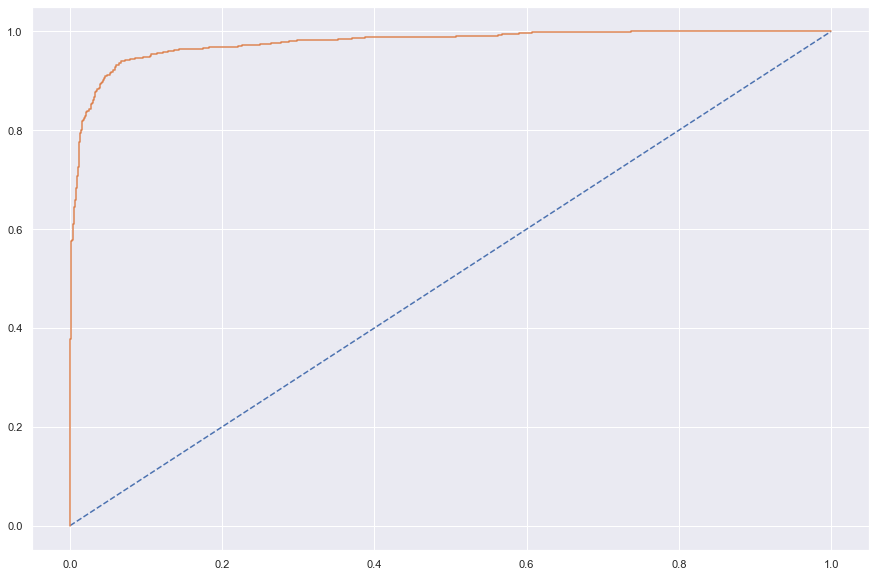

In [276]:
# predict probabilities
probs = ann.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## ANN Tuned

In [279]:
ann_tuned = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.01)

In [280]:
# Fit the model on the training data
ann_tuned.fit(X_train, y_train)

Iteration 1, loss = 0.42644895
Iteration 2, loss = 0.38076127
Iteration 3, loss = 0.37186105
Iteration 4, loss = 0.36527379
Iteration 5, loss = 0.35975402
Iteration 6, loss = 0.35492804
Iteration 7, loss = 0.35042167
Iteration 8, loss = 0.34606683
Iteration 9, loss = 0.34245290
Iteration 10, loss = 0.33910983
Iteration 11, loss = 0.33566928
Iteration 12, loss = 0.33294501
Iteration 13, loss = 0.32987042
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=21,
              solver='sgd', tol=0.01, verbose=True)

In [281]:
#Using above defined function to get accuracy, recall and precision on train and test set
ann_tuned_score=get_metrics_score(ann)

Accuracy on training set :  0.9760213143872114
Accuracy on test set :  0.9532267613972765
Recall on training set :  0.8883861236802413
Recall on test set :  0.7842105263157895
Precision on training set :  0.9663658736669402
Precision on test set :  0.9273858921161826
F1 on training set :  0.9257367387033398
F1 on test set :  0.849809885931559


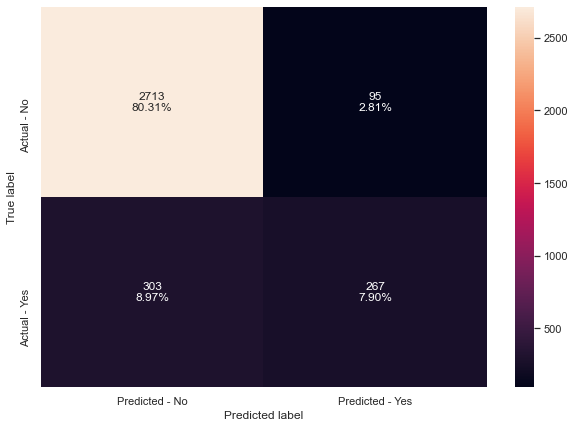

In [282]:
make_confusion_matrix(ann_tuned,y_test)

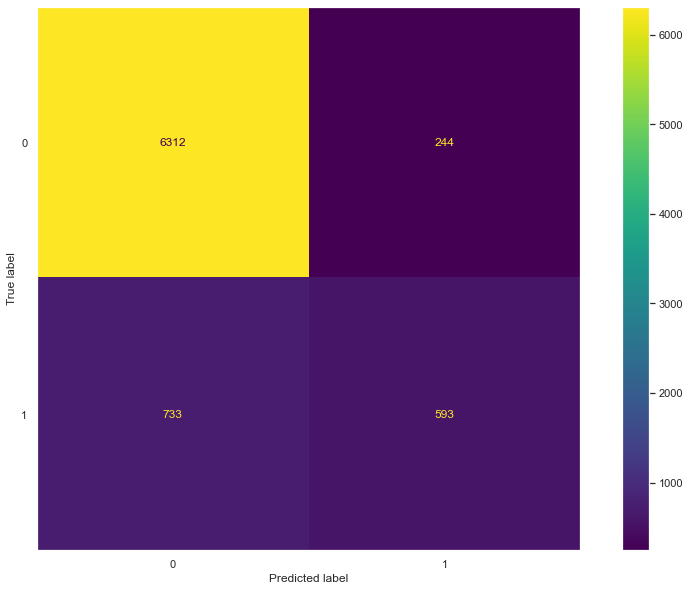

In [283]:
## Confusion matrix on the training data
plot_confusion_matrix(ann_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.842


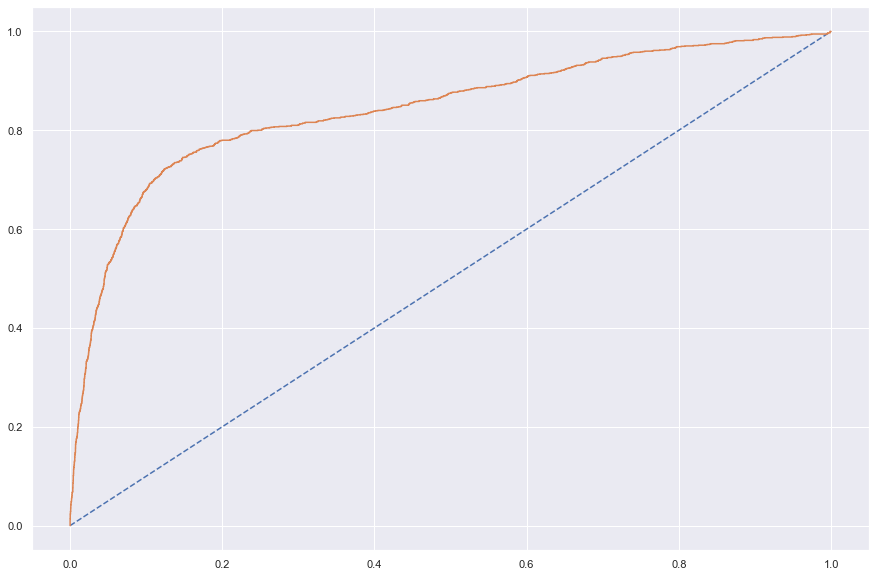

In [284]:
# predict probabilities
probs = ann_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.837


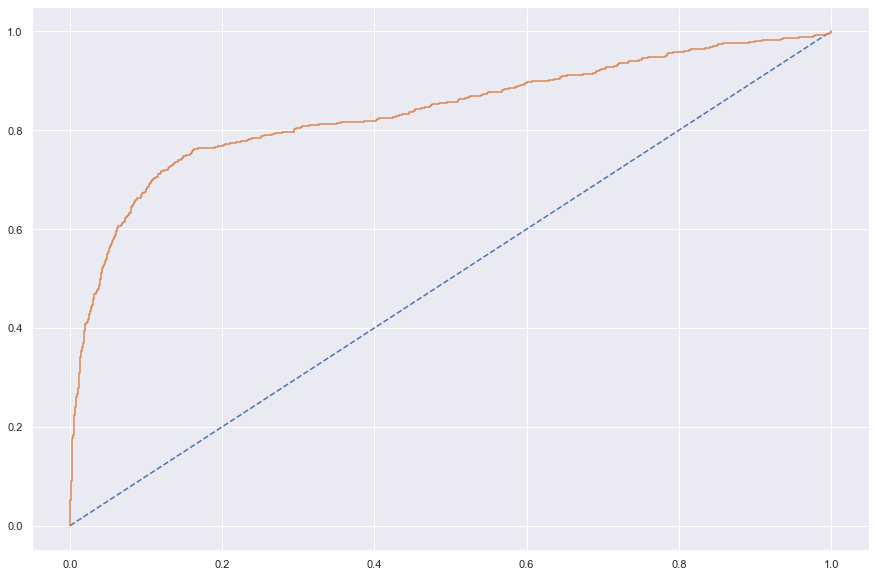

In [285]:
# predict probabilities
probs = ann_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## KNN Model

In [229]:
from sklearn.neighbors import KNeighborsClassifier

In [230]:
knn = KNeighborsClassifier()

In [231]:
# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [232]:
#Using above defined function to get accuracy, recall and precision on train and test set
knn_score=get_metrics_score(knn)

Accuracy on training set :  0.9790662268459782
Accuracy on test set :  0.9576672587329781
Recall on training set :  0.9049773755656109
Recall on test set :  0.8052631578947368
Precision on training set :  0.9685230024213075
Precision on test set :  0.9348268839103869
F1 on training set :  0.935672514619883
F1 on test set :  0.8652214891611687


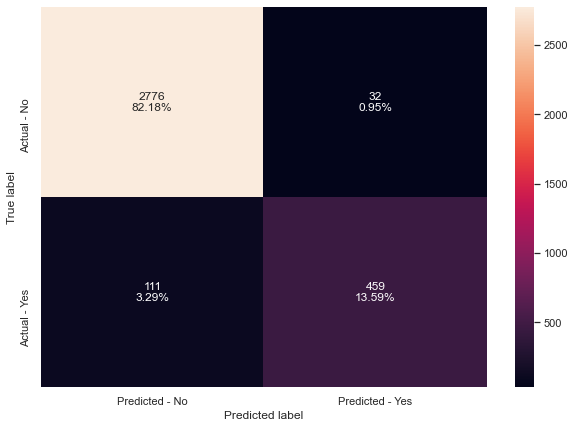

In [233]:
make_confusion_matrix(knn,y_test)

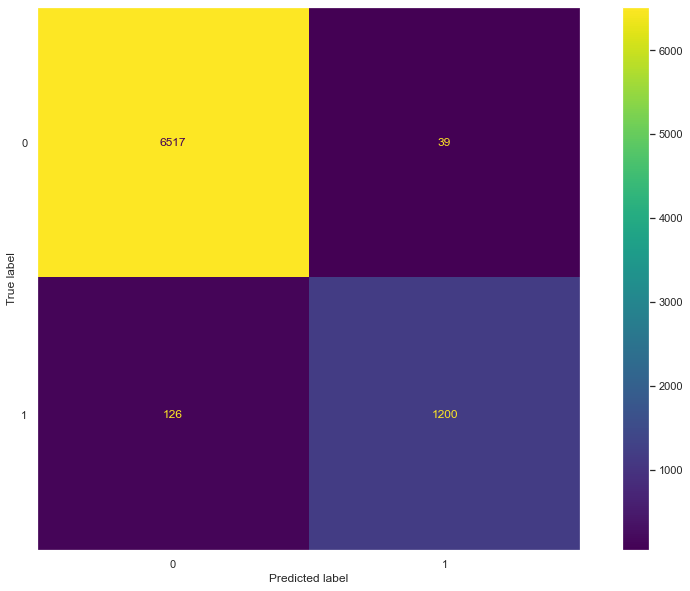

In [234]:
## Confusion matrix on the training data
plot_confusion_matrix(knn,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.996


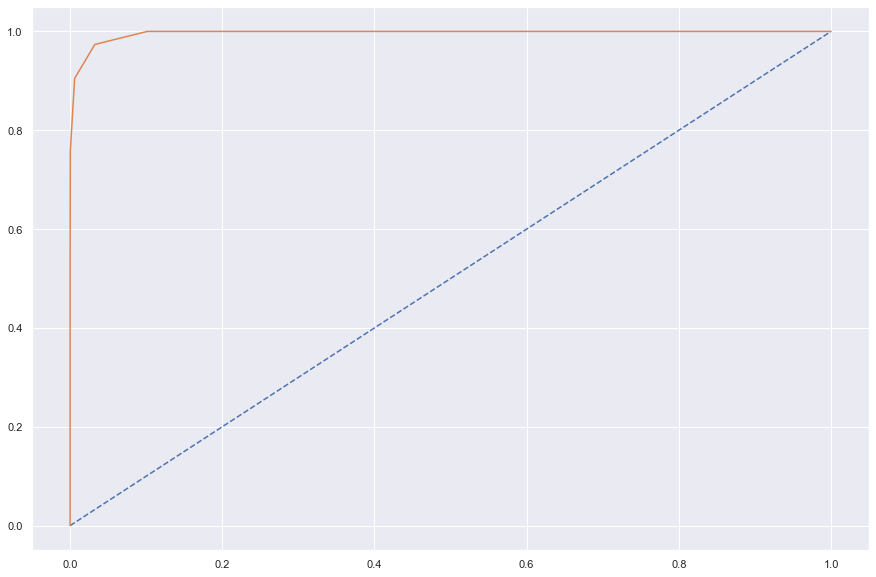

In [235]:
# predict probabilities
probs = knn.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.981


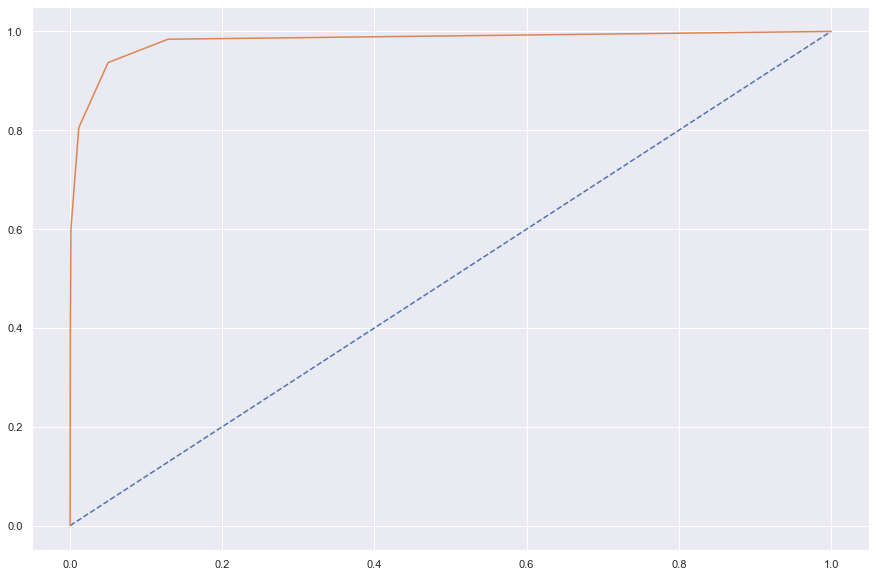

In [236]:
# predict probabilities
probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## KNN - Tuned

In [237]:
knn_gs = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
r2 = gridsearch(knn_gs , knn_params)
print(f'Best parameters for KNN: {r2}')

Best parameters for KNN: {'n_neighbors': 3}


In [238]:
knn_tuned = KNeighborsClassifier(n_neighbors= 3)

In [239]:
# Fit the model on the training data
knn_tuned.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [240]:
#Using above defined function to get accuracy, recall and precision on train and test set
knn_tuned_score=get_metrics_score(knn_tuned)

Accuracy on training set :  0.9902309058614565
Accuracy on test set :  0.9730609828300769
Recall on training set :  0.9555052790346908
Recall on test set :  0.8912280701754386
Precision on training set :  0.9859922178988327
Precision on test set :  0.9459962756052142
F1 on training set :  0.9705093833780161
F1 on test set :  0.9177958446251129


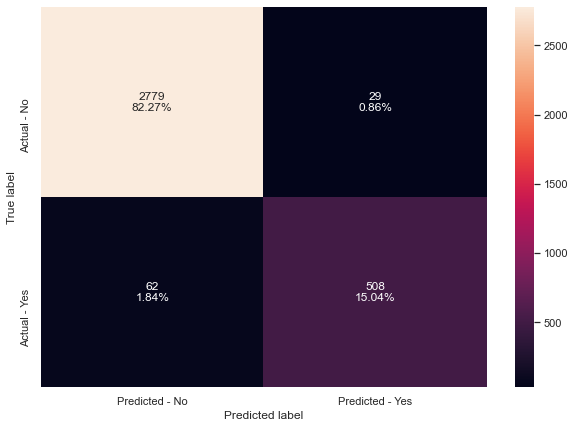

In [241]:
make_confusion_matrix(knn_tuned,y_test)

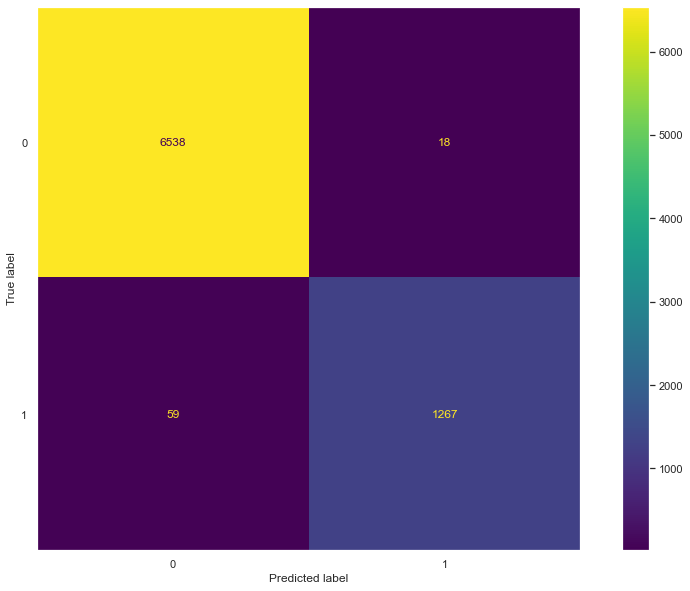

In [242]:
## Confusion matrix on the training data
plot_confusion_matrix(knn_tuned,X_train,y_train)
plt.grid(False)

### AUC and ROC for the training data

AUC: 0.999


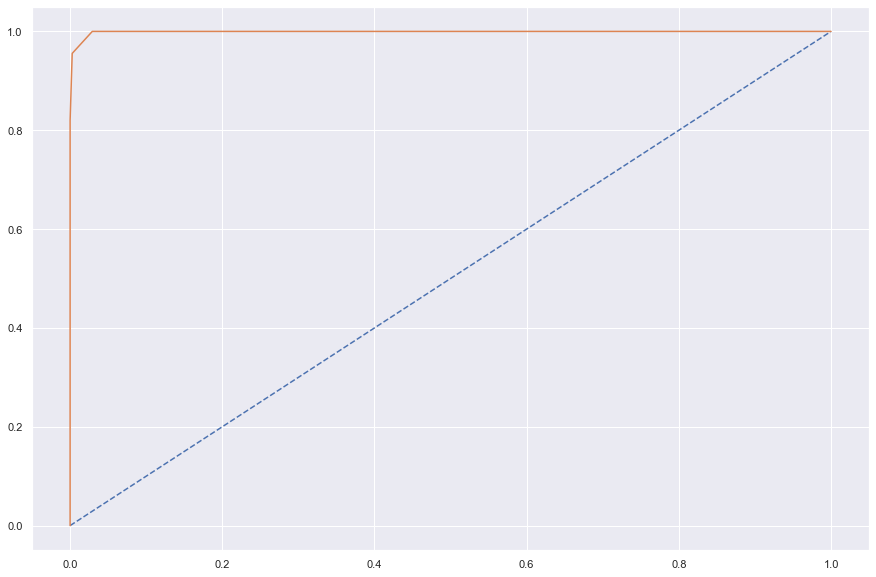

In [243]:
# predict probabilities
probs = knn_tuned.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.984


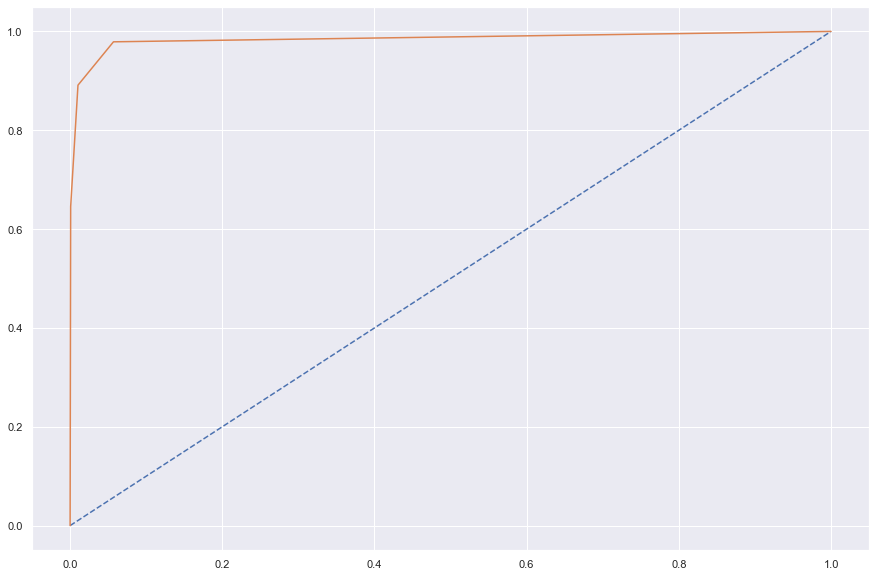

In [244]:
# predict probabilities
probs = knn_tuned.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

## Comparing all models

In [286]:
# defining list of models
models = [lr_sm, lr_model, best_model_lr, lda_model, best_lda, abc, abc_tuned, gbc, xgb, xgb_tuned, gbc_init, gbc_tuned,rf, rf_tuned, ann, ann_tuned, knn, knn_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [287]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression with Smote','Logistic Regression','Logistic Regression-Tuned','LDA','LDA-Tuned','AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','XGBoost','XGBoost-Tuned','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','Random Forest', 'Random Forest - Tuned','ANN','ANN-Tuned','KNN','KNN-Tuned'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                          'Train_f1':f1_train,'Test_f1':f1_test}) 
comparison_frame

Model  Train_Accuracy  Test_Accuracy  \
0              Logistic Regression with Smote            0.81           0.81   
1                         Logistic Regression            0.89           0.89   
2                   Logistic Regression-Tuned            0.89           0.89   
3                                         LDA            0.89           0.88   
4                                   LDA-Tuned            0.89           0.88   
5             AdaBoost with default paramters            0.90           0.90   
6                              AdaBoost Tuned            1.00           0.98   
7   Gradient Boosting with default parameters            0.92           0.91   
8                                     XGBoost            1.00           0.97   
9                               XGBoost-Tuned            1.00           0.97   
10       Gradient Boosting with init=AdaBoost            0.92           0.91   
11                    Gradient Boosting Tuned            1.00           0.98   
12                              Random Forest            1.00           0.97   
13                      Random Forest - Tuned            0.95           0.94   
14                                        ANN            0.98           0.95   
15                                  ANN-Tuned            0.88           0.88   
16                                        KNN            0.98           0.96   
17                                  KNN-Tuned            0.99           0.97   

    Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_f1  \
0           0.79         0.76             0.47            0.46      0.59   
1           0.51         0.48             0.78            0.76      0.62   
2           0.51         0.49             0.78            0.76      0.62   
3           0.47         0.46             0.76            0.75      0.58   
4           0.47         0.46             0.76            0.75      0.58   
5           0.59         0.58             0.73            0.75      0.65   
6           1.00         0.88             1.00            0.99      1.00   
7           0.65         0.61             0.85            0.83      0.74   
8           1.00         0.83             1.00            0.96      1.00   
9           1.00         0.88             1.00            0.96      1.00   
10          0.63         0.59             0.85            0.84      0.72   
11          1.00         0.92             1.00            0.99      1.00   
12          1.00         0.86             1.00            0.99      1.00   
13          0.74         0.64             0.99            0.97      0.85   
14          0.89         0.78             0.97            0.93      0.93   
15          0.45         0.47             0.71            0.74      0.55   
16          0.90         0.81             0.97            0.93      0.94   
17          0.96         0.89             0.99            0.95      0.97   

    Test_f1  
0      0.57  
1      0.59  
2      0.59  
3      0.57  
4      0.57  
5      0.66  
6      0.93  
7      0.71  
8      0.89  
9      0.92  
10     0.70  
11     0.95  
12     0.92  
13     0.77  
14     0.85  
15     0.57  
16     0.87  
17     0.92

## Business recommendations

<AxesSubplot:xlabel='Tenure'>

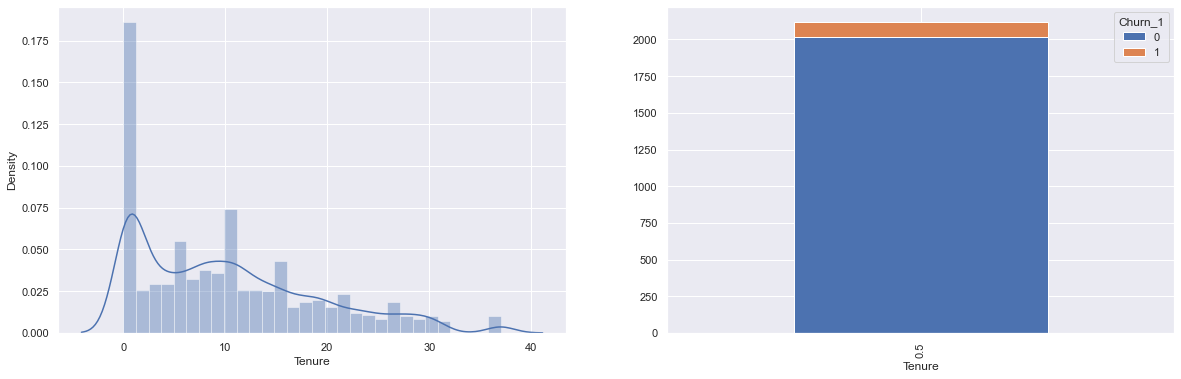

In [248]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(data['Tenure'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#sns.countplot(pd.cut(round(((data['aon']/30)/12),1), bins = bins, labels = labels ), ax =ax1)
pd.crosstab(pd.cut(round(((data['Tenure']/30)/12),1), bins = bins, labels = labels ), data['Churn_1']).plot(kind='bar', stacked=True, ax = ax2)

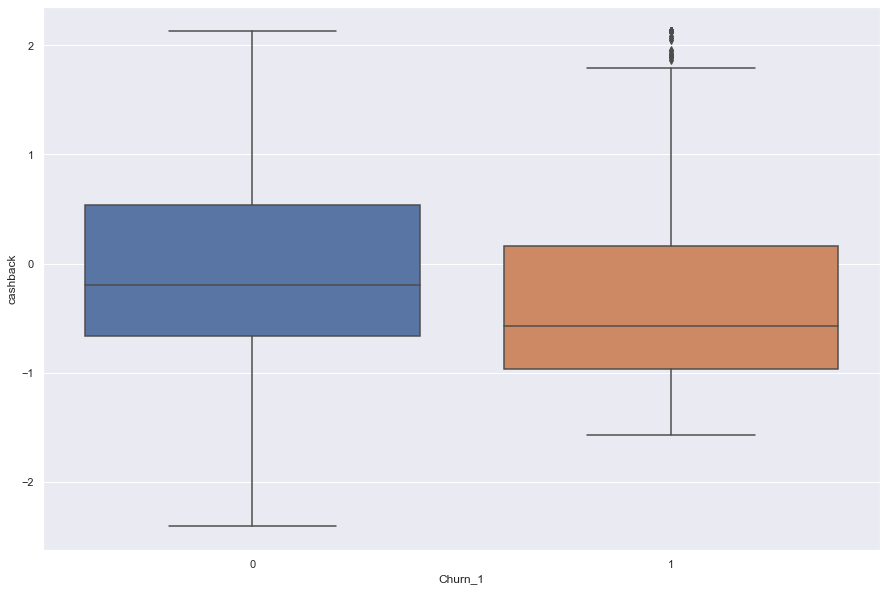

In [254]:
sns.boxplot(x=data["Churn_1"], y=data["cashback"]) 
plt.show()

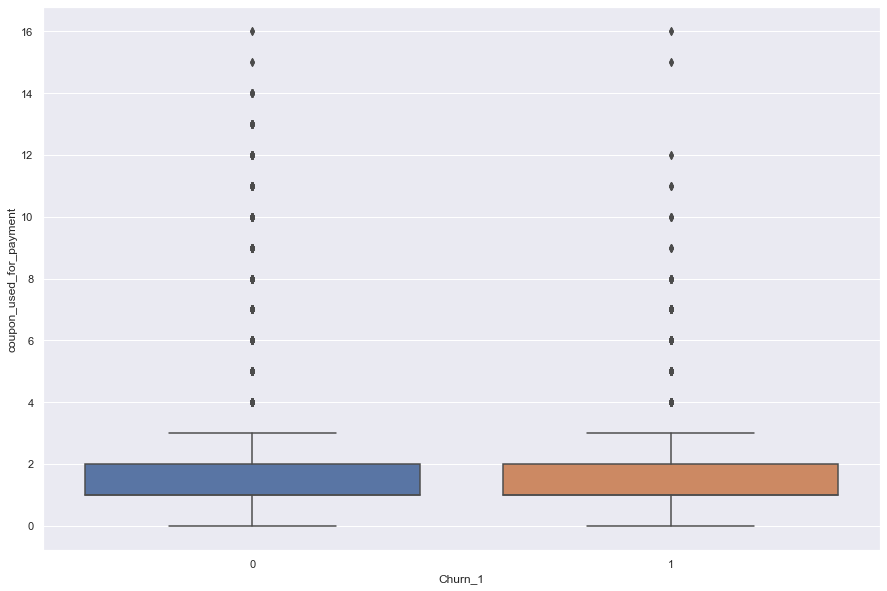

In [255]:
sns.boxplot(x=data["Churn_1"], y=data["coupon_used_for_payment"]) 
plt.show()

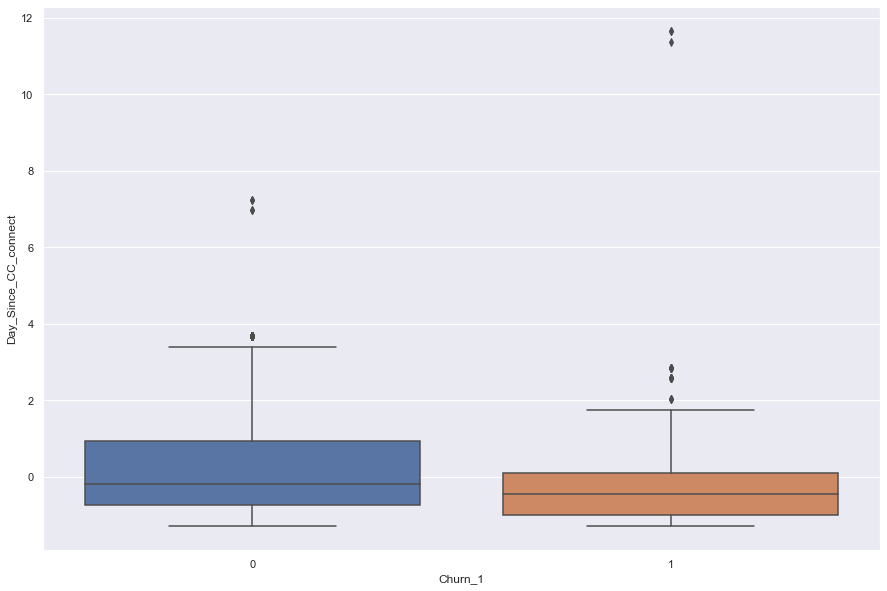

In [256]:
sns.boxplot(x=data["Churn_1"], y=data["Day_Since_CC_connect"]) 
plt.show()

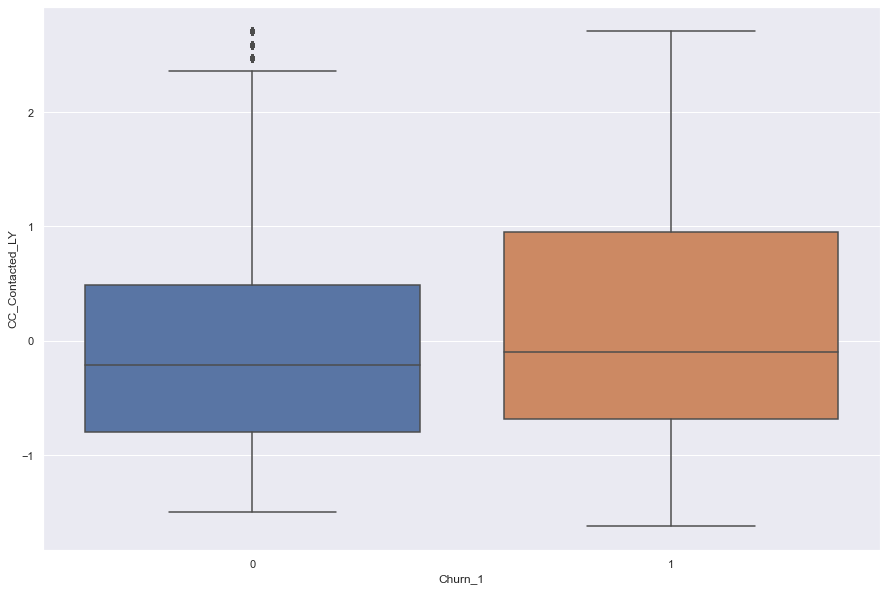

In [257]:
sns.boxplot(x=data["Churn_1"], y=data["CC_Contacted_LY"]) 
plt.show()

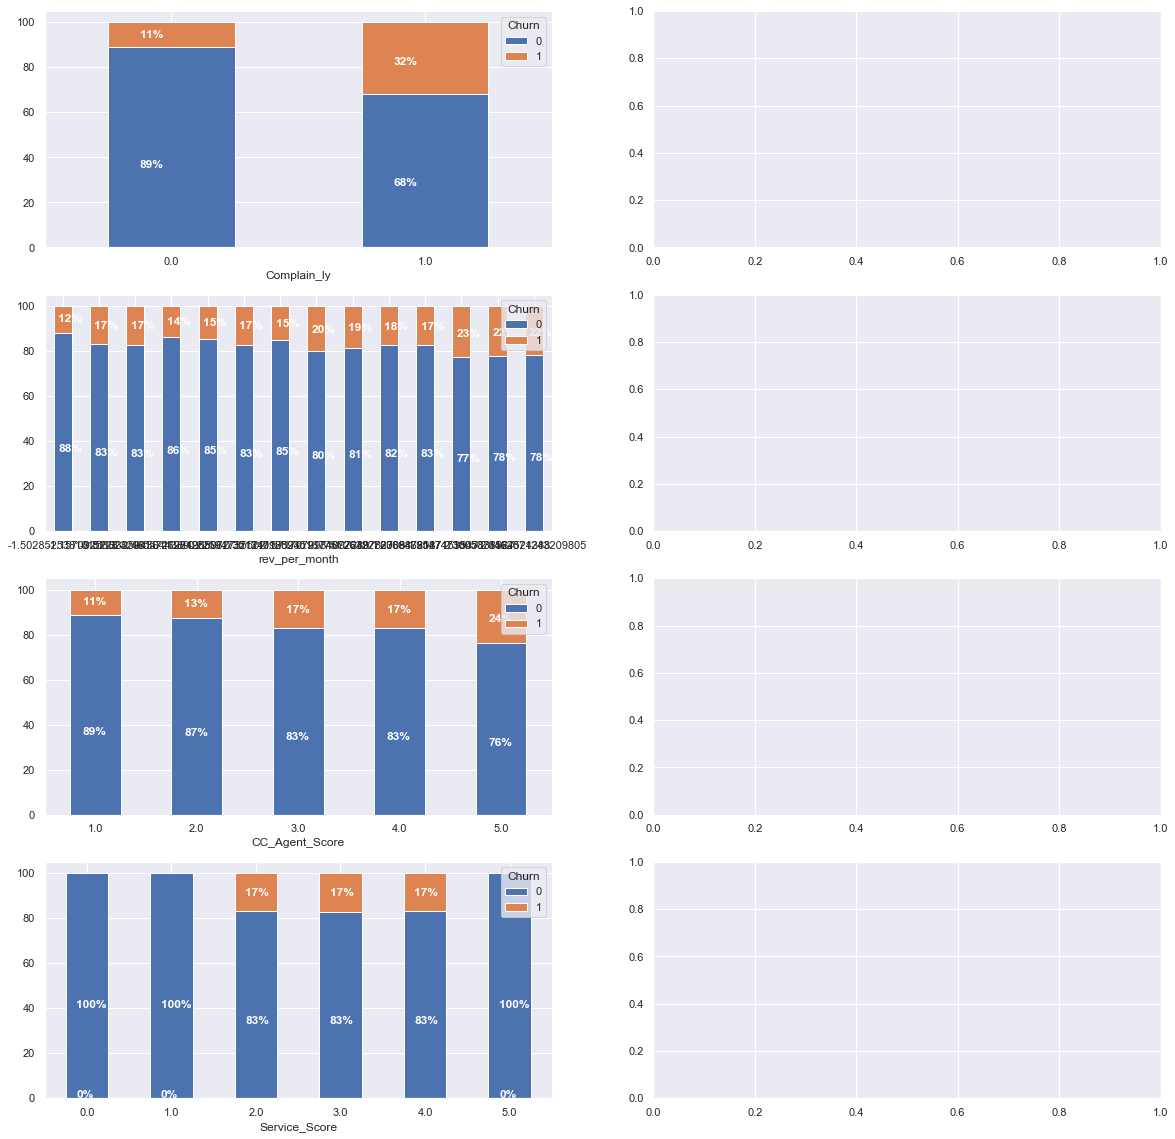

In [269]:
# Display bar plots for different columns stacked with respective churn data
variables = ['Complain_ly','rev_per_month','CC_Agent_Score','Service_Score']
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,20))

for i, val in enumerate(variables):
  x = df.groupby([val,'Churn']).size().unstack()
  if i < 4:
    ax = (x.T*100.0 / x.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, ax=axes[i,0], rot=0)
      
  elif i >=4 and i < 8:
    ax = (x.T*100.0 / x.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, ax=axes[i-4,1], rot=0)
      
  elif i >=8 and i < 12:
    ax = (x.T*100.0 / x.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, ax=axes[i-8,2], rot=0)

  elif i < 16:
    r=25 if i==15 else 0
    ax = (x.T*100.0 / x.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, ax=axes[i-12,3], rot=r)
  
  # Add percentage values to the charts
  for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold')